In [2]:
import os, re

#data specific stuff
from  scipy import stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# we'll take stuff line by line 
# because I'm too lazy to rip the json
pp = r'{"achievement_description":.*?}'
pp = re.compile(pp, re.DOTALL)

#os.chdir('Desktop')
os.chdir('MONTAUD')


In [88]:
pp = re.compile(r'<tr class="">(.*?)</tr>',re.DOTALL)
pc = re.compile(r'<td.*?>(.*?)</td>',re.DOTALL)
pn = re.compile(r'">(.*?)</a>')
pid = re.compile(r'athletes/(\d+)')
pnum = re.compile(r'(\d+)')


In [192]:
class rider(object):
    
    def __init__(self,row):
        
        self.name, date, speed, tt, watts, vam, time = row[1:]
        
        self.has_powermeter = watts.find('Powermeter') > 0
        xx = re.search('\d+',watts)
        if xx:  self.watts = int(xx.group())
            
        #this is stupid group(1) fails
        self.id_num = int(pid.search(self.name).group().split('/')[1])
        self.vam = float(vam.replace(',',''))
        
        mins,secs = time.split(':')
        self.time = int(mins)*60 + int(secs)
        
        #reset name
        tt =  pn.search(self.name)
        if tt : self.name = tt.group(1)
            
    def __str__(self):
        return '%s %d'%(self.name,self.id_num)


In [193]:
fns = ['montaud1.htm','montaud2.htm']
data = {}
for fn in fns:
    mm = pp.findall(file(fn,'r').read())
    table = [pc.findall(row) for row in  mm]
    dd =  [rider(row) for row in table]
    data[fn] = dict((x.id_num, x) for x in dd)
    

In [163]:
[ str(x) for x in data['montaud1.htm'].values() ]

['Guillaume Rostalski 5808131',
 'Guillaume Vereecke 10620332',
 'Rodolphe Lourd (albator83) 104076',
 'Fredo B 4278031',
 'JP Dascoli 6230161',
 'Kieran McShane 4735258',
 'Philippe Meunier 869021',
 'Mikael Gallego\xf0\x9f\x87\xaa\xf0\x9f\x87\xb8 4356272',
 'Alex Laufray 1068710',
 'Simon Wood 5101356',
 'Laurent Derain 3218864',
 'christophe rostaing-troux 2608819',
 'Florian Giboin 19305786',
 'Vincent Kerdra 10164418',
 'Julien Dehaudt 5988035',
 'Romaric TYTGAT 15824331',
 'Fabrice Mazza 1776466',
 'Jules Vial 14287955',
 'Thibault Menu 7501657',
 'Alex C 8928605',
 'Jeremy Brunello 16691818',
 'Denivelator ! 4770799',
 'Valentin Genin 8626164',
 'Joris Ronflet 104053',
 'Arnaud Feodoroff 6295551']

In [166]:
seg = {}
for fn in fns:
    seg[fn] = dict( (x, y.time) 
                     for x,y in  data[fn].items() )

In [205]:
a,b = [set(data[fn].keys()) for fn in fns]
ids = a.intersection(b) 

In [209]:

xs,ys = [ [data[fn][idx].time for idx in idps] 
                              for fn in fns ]

xs2,ys2 = [ [data[fn][idx].time for idx in ids] 
                              for fn in fns ]


slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(xs),
                                                               np.array(ys))


So we have filtered out only riders with power meters in idps

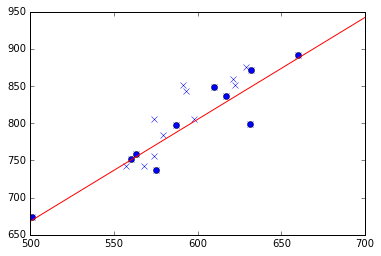

In [211]:
plt.plot(xs2,ys2,'bx' )
plt.plot(xs,ys,'bo' )
pts = 500,700
plt.plot(pts,[slope*x + intercept for x in pts ],'r-' )

In [212]:
idps = [x for x in ids if data['montaud2.htm'][x].has_powermeter]

slopes = [(float(data['montaud2.htm'][id_].watts)/data['montaud1.htm'][id_].watts,
                           data['montaud2.htm'][id_].name)
          for id_ in idps ]

slopes.sort(key = lambda x : x[0])

for x,y in slopes:
    print '%.2f %s' % (x,y)
  



0.90 Jeremy Brunello
0.91 Guillaume Vereecke
0.93 Alex C
0.93 Kieran McShane
0.94 Fredo B
0.95 Fabrice Mazza
0.95 Mikael Gallego🇪🇸
1.02 Arnaud Feodoroff
1.03 Rodolphe Lourd (albator83)
1.03 Romaric TYTGAT


In [201]:
idps
  
    
    

[3218864,
 10164418,
 5808131,
 1068710,
 5101356,
 10620332,
 16691818,
 15824331,
 104076,
 4278031,
 4356272,
 14287955,
 1776466,
 2608819,
 104053,
 8928605,
 7501657,
 4735258,
 19305786,
 869021,
 6295551]

In [158]:
segs_pm

{}

'Mikael Gallego\xf0\x9f\x87\xaa\xf0\x9f\x87\xb8'

'\n<strong><a href="https://www.strava.com/athletes/4356272">Mikael Gallego\xf0\x9f\x87\xaa\xf0\x9f\x87\xb8</a></strong>\n'

In [138]:
import lxml.html as lh
#http://docs.python-guide.org/en/latest/scenarios/scrape/

In [139]:
<td class='athlete'>

'<!DOCTYPE html>\n<!-- saved from url=(0066)https://www.strava.com/segments/6903988?filter=overall&gen'

In [168]:
tree = lh.parse(data)

IOError: IOError(u'Error reading file \'<!DOCTYPE html>\n<!-- saved from url=(0066)https://www.strava.com/segments/6903988?filter=overall&gender=both -->\n<html class="logged-in  old-login strava-orion js no-touch history draganddrop localstorage svg fullscreen" dir="ltr" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/TR/html5"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\n<meta content="i-0d3550eb95c88ae49" name="instance_id">\n<meta content="yes" name="apple-mobile-web-app-capable">\n<meta content="black" name="apple-mobile-web-app-status-bar-style">\n<meta content="width = device-width, initial-scale = 1, maximum-scale = 1, user-scalable = no" name="viewport">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-180x180.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="180x180">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-152x152.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="152x152">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-144x144.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="144x144">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-120x120.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="120x120">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-114x114.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="114x114">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-76x76.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="76x76">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-72x72.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="72x72">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-60x60.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="60x60">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/apple-touch-icon-57x57.png?v=dLlWydWlG8" rel="apple-touch-icon" sizes="57x57">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/favicon-32x32.png?v=dLlWydWlG8" rel="icon" sizes="32x32" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/icon-strava-chrome-192.png?v=dLlWydWlG8" rel="icon" sizes="192x192" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/favicon-96x96.png?v=dLlWydWlG8" rel="icon" sizes="96x96" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/favicon-16x16.png?v=dLlWydWlG8" rel="icon" sizes="16x16" type="image/png">\n<link href="https://www.strava.com/manifest.json?v=dLlWydWlG8" rel="manifest">\n<meta content="#fc4c02" name="msapplication-TileColor">\n<meta content="https://d3nn82uaxijpm6.cloudfront.net/mstile-144x144.png?v=dLlWydWlG8" name="msapplication-TileImage">\n<meta content="#fc4c02" name="theme-color">\n<meta content="Strava" name="apple-mobile-web-app-title">\n<meta content="Strava" name="application-name">\n\n<style type="text/css">\n<style>\n  .spinner, .spinner .status {\n    position: relative; }\n  \n  .spinner {\n    margin-top: 1em;\n    margin-bottom: 1em; }\n    .spinner .status {\n      top: 2px;\n      margin-left: 0.5em; }\n      .spinner .status:empty {\n        display: none; }\n    .spinner.lg .graphic {\n      border-width: 3px;\n      height: 32px;\n      width: 32px; }\n    .spinner.tiny {\n      height: 10px;\n      width: 10px; }\n    .spinner.centered, .spinner.vcentered {\n      box-sizing: border-box;\n      width: 100%; }\n    .spinner.vcentered {\n      left: 0;\n      margin-top: -12px;\n      position: absolute;\n      right: 0;\n      text-align: center;\n      top: 50%; }\n  \n  .spinner .graphic, .ajax-loading-image {\n    animation: spin 1.2s infinite linear;\n    box-sizing: border-box;\n    border-color: #eee;\n    border-radius: 50%;\n    border-style: solid;\n    border-top-color: #666;\n    border-top-style: solid;\n    border-width: 2px;\n    content: "";\n    display: inline-block;\n    height: 20px;\n    position: relative;\n    vertical-align: middle;\n    width: 20px; }\n  \n  @keyframes spin {\n    from {\n      transform: rotate(0deg); }\n    to {\n      transform: rotate(359deg); } }\n</style>\n\n\n<link href="./montaud_files/strava-app-icons-ea07ef9dc5e9c10253bd85239187af1f.css" media="screen" rel="stylesheet" type="text/css">\n<link href="./montaud_files/strava-orion-8198830bc4dacf5791e6556e9df95002.css" media="screen" rel="stylesheet" type="text/css">\n\n<meta content="authenticity_token" name="csrf-param">\n<meta content="CxJRGQZWQ4+qlPBYRLR7TCVpLYPgG4azxkxFKeDtcdY=" name="csrf-token">\n<script type="text/javascript" async="" src="./montaud_files/ec.js"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script type="text/javascript" async="" src="./montaud_files/analytics.js"></script><script type="text/javascript" async="" src="./montaud_files/0879.js"></script><script src="./montaud_files/cb=gapi.loaded_0" async=""></script><script id="facebook-jssdk" async="" src="./montaud_files/sdk.js"></script><script id="twitter-wjs" src="./montaud_files/widgets.js"></script><script async="" src="./montaud_files/gtm.js"></script><script async="" src="./montaud_files/branch-latest.min.js"></script><script src="./montaud_files/strava-head-15339e240509303c862126a43a613a02.js" type="text/javascript"></script><link href="chrome-extension://lnkdbjbjpnpjeciipoaflmpcddinpjjp/mytube.css" rel="stylesheet" type="text/css"><script src="chrome-extension://lnkdbjbjpnpjeciipoaflmpcddinpjjp/mutationObserver.js"></script>\n\n<link href="./montaud_files/show-57a8afff21b81ac1ec7f8fc2f3276794.css" media="screen" rel="stylesheet" type="text/css">\n<title>6.2 km Ride Segment in Saint Quentin Sur Is\xe8re, RA, France on Strava</title>\n<meta content="View bike ride segment, 6.2 kilometers long, starting in Saint Quentin Sur Is\xe8re, RA, with 0 meters in elevation gain." type="description">\n<meta content="noindex" name="robots">\n<link href="https://www.strava.com/segments/6903988" rel="canonical">\n\n\n\n<script>\n  (function(b,r,a,n,c,h,_,s,d,k){if(!b[n]||!b[n]._q){for(;s<_.length;)c(h,_[s++]);d=r.createElement(a);d.async=1;d.src="https://cdn.branch.io/branch-latest.min.js";k=r.getElementsByTagName(a)[0];k.parentNode.insertBefore(d,k);b[n]=h}})(window,document,"script","branch",function(b,r){b[r]=function(){b._q.push([r,arguments])}},{_q:[],_v:1},"addListener applyCode banner closeBanner creditHistory credits data deepview deepviewCta first getCode init link logout redeem referrals removeListener sendSMS setBranchViewData setIdentity track validateCode".split(" "), 0);\n  branch.init(\'key_live_lmpPsfj2DP8CflI4rmzfiemerte7sgwm\');\n</script>\n\n<script>\n  !function(options){\n    window.Strava = window.Strava || {};\n    var _enabled = false;\n    var _options = options;\n  \n    window.Strava.SegmentIO = window.Strava.SegmentIO || (\n      {\n        isEnabled: function() {\n          return _enabled;\n        },\n        isDebug: function() {\n          return _options.debug;\n        },\n        track: function() {\n          if(this.isEnabled()) {\n            analytics.track.apply(analytics, arguments)\n            this.log(\'%ctrack %O\', arguments)\n          }\n        },\n        page: function(category, name, properties, options) {\n          if(this.isEnabled()) {\n            var _category = category;\n            var _name = name;\n            if(!_name) {\n              _name = category;\n              _category = null;\n            }\n            var _properties = properties || {};\n            _properties.is_mobile = _options.is_mobile;\n            _properties.mobile_os = _options.os;\n            analytics.page(_category, _name, _properties, options)\n            this.log(\'%canalytics %O\', [_category, _name, _properties, options])\n          }\n        },\n        trackLink: function() {\n          if(this.isEnabled()) {\n            analytics.trackLink.apply(analytics, arguments)\n            this.log(\'%cattaching to track link %O\', arguments)\n          }\n        },\n        trackSubmit: function() {\n          if(this.isEnabled()) {\n            analytics.trackSubmit.apply(analytics, arguments);\n            this.log(\'%cattaching to track submit %O\', arguments);\n          }\n        },\n        identify: function() {\n          if(this.isEnabled()) {\n            analytics.identify.apply(analytics, arguments);\n            this.log(\'%cidentify(%O)\', arguments);\n          }\n        },\n        log: function(message, values) {\n          if(this.isDebug()) {\n            console.log(message, \'background-color: yellow; color: blue; font-size: medium;\', values);\n          }\n        },\n        debug: function(value) {\n          _options.debug = value;\n        }\n      }\n    )\n  }({is_mobile: false, os: "", debug: false});\n</script>\n\n\n<script src="chrome-extension://lnkdbjbjpnpjeciipoaflmpcddinpjjp/mytube.js"></script><style type="text/css">.fb_hidden{position:absolute;top:-10000px;z-index:10001}.fb_reposition{overflow:hidden;position:relative}.fb_invisible{display:none}.fb_reset{background:none;border:0;border-spacing:0;color:#000;cursor:auto;direction:ltr;font-family:"lucida grande", tahoma, verdana, arial, sans-serif;font-size:11px;font-style:normal;font-variant:normal;font-weight:normal;letter-spacing:normal;line-height:1;margin:0;overflow:visible;padding:0;text-align:left;text-decoration:none;text-indent:0;text-shadow:none;text-transform:none;visibility:visible;white-space:normal;word-spacing:normal}.fb_reset>div{overflow:hidden}.fb_link img{border:none}@keyframes fb_transform{from{opacity:0;transform:scale(.95)}to{opacity:1;transform:scale(1)}}.fb_animate{animation:fb_transform .3s forwards}\n.fb_dialog{background:rgba(82, 82, 82, .7);position:absolute;top:-10000px;z-index:10001}.fb_reset .fb_dialog_legacy{overflow:visible}.fb_dialog_advanced{padding:10px;-moz-border-radius:8px;-webkit-border-radius:8px;border-radius:8px}.fb_dialog_content{background:#fff;color:#333}.fb_dialog_close_icon{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/yq/r/IE9JII6Z1Ys.png) no-repeat scroll 0 0 transparent;cursor:pointer;display:block;height:15px;position:absolute;right:18px;top:17px;width:15px}.fb_dialog_mobile .fb_dialog_close_icon{top:5px;left:5px;right:auto}.fb_dialog_padding{background-color:transparent;position:absolute;width:1px;z-index:-1}.fb_dialog_close_icon:hover{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/yq/r/IE9JII6Z1Ys.png) no-repeat scroll 0 -15px transparent}.fb_dialog_close_icon:active{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/yq/r/IE9JII6Z1Ys.png) no-repeat scroll 0 -30px transparent}.fb_dialog_loader{background-color:#f6f7f9;border:1px solid #606060;font-size:24px;padding:20px}.fb_dialog_top_left,.fb_dialog_top_right,.fb_dialog_bottom_left,.fb_dialog_bottom_right{height:10px;width:10px;overflow:hidden;position:absolute}.fb_dialog_top_left{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/ye/r/8YeTNIlTZjm.png) no-repeat 0 0;left:-10px;top:-10px}.fb_dialog_top_right{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/ye/r/8YeTNIlTZjm.png) no-repeat 0 -10px;right:-10px;top:-10px}.fb_dialog_bottom_left{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/ye/r/8YeTNIlTZjm.png) no-repeat 0 -20px;bottom:-10px;left:-10px}.fb_dialog_bottom_right{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/ye/r/8YeTNIlTZjm.png) no-repeat 0 -30px;right:-10px;bottom:-10px}.fb_dialog_vert_left,.fb_dialog_vert_right,.fb_dialog_horiz_top,.fb_dialog_horiz_bottom{position:absolute;background:#525252;filter:alpha(opacity=70);opacity:.7}.fb_dialog_vert_left,.fb_dialog_vert_right{width:10px;height:100%}.fb_dialog_vert_left{margin-left:-10px}.fb_dialog_vert_right{right:0;margin-right:-10px}.fb_dialog_horiz_top,.fb_dialog_horiz_bottom{width:100%;height:10px}.fb_dialog_horiz_top{margin-top:-10px}.fb_dialog_horiz_bottom{bottom:0;margin-bottom:-10px}.fb_dialog_iframe{line-height:0}.fb_dialog_content .dialog_title{background:#6d84b4;border:1px solid #365899;color:#fff;font-size:14px;font-weight:bold;margin:0}.fb_dialog_content .dialog_title>span{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/yd/r/Cou7n-nqK52.gif) no-repeat 5px 50%;float:left;padding:5px 0 7px 26px}body.fb_hidden{-webkit-transform:none;height:100%;margin:0;overflow:visible;position:absolute;top:-10000px;left:0;width:100%}.fb_dialog.fb_dialog_mobile.loading{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/ya/r/3rhSv5V8j3o.gif) white no-repeat 50% 50%;min-height:100%;min-width:100%;overflow:hidden;position:absolute;top:0;z-index:10001}.fb_dialog.fb_dialog_mobile.loading.centered{width:auto;height:auto;min-height:initial;min-width:initial;background:none}.fb_dialog.fb_dialog_mobile.loading.centered #fb_dialog_loader_spinner{width:100%}.fb_dialog.fb_dialog_mobile.loading.centered .fb_dialog_content{background:none}.loading.centered #fb_dialog_loader_close{color:#fff;display:block;padding-top:20px;clear:both;font-size:18px}#fb-root #fb_dialog_ipad_overlay{background:rgba(0, 0, 0, .45);position:absolute;bottom:0;left:0;right:0;top:0;width:100%;min-height:100%;z-index:10000}#fb-root #fb_dialog_ipad_overlay.hidden{display:none}.fb_dialog.fb_dialog_mobile.loading iframe{visibility:hidden}.fb_dialog_content .dialog_header{-webkit-box-shadow:white 0 1px 1px -1px inset;background:-webkit-gradient(linear, 0% 0%, 0% 100%, from(#738ABA), to(#2C4987));border-bottom:1px solid;border-color:#1d4088;color:#fff;font:14px Helvetica, sans-serif;font-weight:bold;text-overflow:ellipsis;text-shadow:rgba(0, 30, 84, .296875) 0 -1px 0;vertical-align:middle;white-space:nowrap}.fb_dialog_content .dialog_header table{-webkit-font-smoothing:subpixel-antialiased;height:43px;width:100%}.fb_dialog_content .dialog_header td.header_left{font-size:12px;padding-left:5px;vertical-align:middle;width:60px}.fb_dialog_content .dialog_header td.header_right{font-size:12px;padding-right:5px;vertical-align:middle;width:60px}.fb_dialog_content .touchable_button{background:-webkit-gradient(linear, 0% 0%, 0% 100%, from(#4966A6), color-stop(.5, #355492), to(#2A4887));border:1px solid #29487d;-webkit-background-clip:padding-box;-webkit-border-radius:3px;-webkit-box-shadow:rgba(0, 0, 0, .117188) 0 1px 1px inset, rgba(255, 255, 255, .167969) 0 1px 0;display:inline-block;margin-top:3px;max-width:85px;line-height:18px;padding:4px 12px;position:relative}.fb_dialog_content .dialog_header .touchable_button input{border:none;background:none;color:#fff;font:12px Helvetica, sans-serif;font-weight:bold;margin:2px -12px;padding:2px 6px 3px 6px;text-shadow:rgba(0, 30, 84, .296875) 0 -1px 0}.fb_dialog_content .dialog_header .header_center{color:#fff;font-size:16px;font-weight:bold;line-height:18px;text-align:center;vertical-align:middle}.fb_dialog_content .dialog_content{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/y9/r/jKEcVPZFk-2.gif) no-repeat 50% 50%;border:1px solid #555;border-bottom:0;border-top:0;height:150px}.fb_dialog_content .dialog_footer{background:#f6f7f9;border:1px solid #555;border-top-color:#ccc;height:40px}#fb_dialog_loader_close{float:left}.fb_dialog.fb_dialog_mobile .fb_dialog_close_button{text-shadow:rgba(0, 30, 84, .296875) 0 -1px 0}.fb_dialog.fb_dialog_mobile .fb_dialog_close_icon{visibility:hidden}#fb_dialog_loader_spinner{animation:rotateSpinner 1.2s linear infinite;background-color:transparent;background-image:url(https://static.xx.fbcdn.net/rsrc.php/v3/yD/r/t-wz8gw1xG1.png);background-repeat:no-repeat;background-position:50% 50%;height:24px;width:24px}@keyframes rotateSpinner{0%{transform:rotate(0deg)}100%{transform:rotate(360deg)}}\n.fb_iframe_widget{display:inline-block;position:relative}.fb_iframe_widget span{display:inline-block;position:relative;text-align:justify}.fb_iframe_widget iframe{position:absolute}.fb_iframe_widget_fluid_desktop,.fb_iframe_widget_fluid_desktop span,.fb_iframe_widget_fluid_desktop iframe{max-width:100%}.fb_iframe_widget_fluid_desktop iframe{min-width:220px;position:relative}.fb_iframe_widget_lift{z-index:1}.fb_hide_iframes iframe{position:relative;left:-10000px}.fb_iframe_widget_loader{position:relative;display:inline-block}.fb_iframe_widget_fluid{display:inline}.fb_iframe_widget_fluid span{width:100%}.fb_iframe_widget_loader iframe{min-height:32px;z-index:2;zoom:1}.fb_iframe_widget_loader .FB_Loader{background:url(https://static.xx.fbcdn.net/rsrc.php/v3/y9/r/jKEcVPZFk-2.gif) no-repeat;height:32px;width:32px;margin-left:-16px;position:absolute;left:50%;z-index:4}</style></head>\n<body>\n<script>\n  (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push(\n    {\'gtm.start\': new Date().getTime(),event:\'gtm.js\'}\n    );var f=d.getElementsByTagName(s)[0],\n    j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n    \'//www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n    })(window,document,\'script\',\'googleTagManagerDataLayer\', "GTM-TP845S");\n</script>\n<noscript>\n&lt;iframe height=\'0\' src=\'//www.googletagmanager.com/ns.html?id=GTM-TP845S\' style=\'display:none;visibility:hidden\' width=\'0\'&gt;&lt;/iframe&gt;\n</noscript>\n\n<link href="./montaud_files/smartbanner_orion-4a07d6bd2a9abf026ae4decaa967b383.css" media="screen" rel="stylesheet" type="text/css">\n<div class="container smartbanner-content pt-md pb-md" id="smartbanner-orion">\n<div class="row">\n<div class="col-xs-12">\n<img alt="Icon-ios-app" class="app-icon" src="./montaud_files/icon-ios-app-58d3dfebadaf8fd03fa8080b1f4bfd1d.svg">\n<div class="app-info mt-xs">\n<div class="app-name">Strava</div>\n<div class="app-subtitle">Free app for Android and iPhone</div>\n</div>\n<div class="text-right mt-xs">\n<a class="btn btn-primary btn-outline btn-cta text-uppercase" href="https://www.strava.com/mobile" role="button">Download</a>\n</div>\n</div>\n</div>\n</div>\n\n<header id="global-header"><!--\ndeploy: eff91ae8c7c9923423454088d167c2dd2f1bbb88\ninstance: i-0d3550eb95c88ae49\nenv: \'ec2\'\n-->\n<nav class="nav-bar container" role="navigation">\n<div class="row">\n<div class="col-md-12 clearfix">\n<h1 class="branding" title="Return to the Strava home page"><a href="https://www.strava.com/" class="branding-content"><span class="sr-only">Strava</span></a></h1>\n<a aria-controls="container-nav" aria-expanded="false" class="btn btn-default btn-mobile-menu visible-xs-inline-block visible-sm-inline-block" data-toggle="collapse" href="https://www.strava.com/segments/6903988?filter=overall&amp;gender=both#container-nav" role="button">Menu</a>\n<div class="collapse" id="container-nav">\n<div class="container-nav-inner">\n<form class="form-inline" id="global-search-bar">\n<div class="form-group bottomless">\n<div class="dropdown" id="global-search-filter">\n<button aria-expanded="false" aria-haspopup="true" class="btn btn-default btn-icon btn-icon-right" data-toggle="dropdown" data-value="athletes">\n<span class="btn-label">Athletes</span>\n<span class="app-icon-wrapper "><span class="app-icon icon-strong-caret-down icon-dark icon-xs"></span></span>\n</button>\n<ul aria-labeledby="global-search-filter" class="dropdown-menu" role="menu">\n<li>\n<div class="clickable" data-value="activities">Activities</div>\n</li>\n<li>\n<div class="clickable" data-value="athletes">Athletes</div>\n</li>\n<li>\n<div class="clickable" data-value="clubs">Clubs</div>\n</li>\n<li>\n<div class="clickable" data-value="segments">Segments</div>\n</li>\n</ul>\n</div>\n<div class="input-group">\n<label for="global-search-field" id="global-search-button">\n<div class="icon-search app-icon icon-lg icon-dark" title="Search"></div>\n</label>\n<input class="form-control" data-search-filter="athletes" id="global-search-field" placeholder="Search" type="text">\n<button class="btn btn-white btn-icon btn-icon-only" id="global-search-cancel" title="Cancel"><span class="app-icon-wrapper "><span class="app-icon icon-remove icon-dark"></span></span></button>\n</div>\n<div id="global-search-autocomplete-anchor">\n<div id="global-search-autocomplete-container"></div>\n</div>\n</div>\n</form>\n<ul class="global-nav nav-group list-unstyled">\n<li class="drop-down-menu enabled">\n<a href="https://www.strava.com/dashboard" class="selection">Dashboard\n</a><ul class="options">\n<li class="">\n<a href="https://www.strava.com/dashboard">Activity Feed</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/athlete/segments/starred">My Segments</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/athlete/routes">My Routes</a>\n</li>\n<li class="premium opt-group">\n<h4>\n<img alt="Strava Premium" src="./montaud_files/premium-logo-white-39374854b6bfe28e11c67b672eece94d.svg">\n</h4>\n<ul>\n<li class="">\n<a href="https://www.strava.com/athlete/goals">My Goals\n</a></li>\n<li class="">\n<a href="https://www.strava.com/athlete/heatmaps">Heatmaps\n</a></li>\n</ul>\n</li>\n</ul>\n</li>\n<li class="drop-down-menu enabled">\n<a href="https://www.strava.com/athlete/training/log" class="selection">Training\n</a><ul class="options">\n<li class="">\n<a href="https://www.strava.com/athlete/training/log">Training Log</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/athlete/calendar">Training Calendar</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/athlete/training">My Activities</a>\n</li>\n<li class="premium opt-group">\n<h4>\n<img alt="Strava Premium" src="./montaud_files/premium-logo-white-39374854b6bfe28e11c67b672eece94d.svg">\n</h4>\n<ul>\n<li class="">\n<a href="https://www.strava.com/videos">Training Videos\n</a></li>\n<li class="">\n<a href="https://www.strava.com/athlete/training-plans">Training Plans\n</a></li>\n<li class="">\n<a href="https://www.strava.com/athlete/analysis">Power Curve\n</a></li>\n<li class="">\n<a href="https://www.strava.com/athlete/fitness">Fitness &amp; Freshness\n</a></li>\n</ul>\n</li>\n</ul>\n</li>\n<li class="drop-down-menu selected enabled">\n<a href="https://www.strava.com/segments/explore" class="selection">Explore\n</a><ul class="options">\n<li class="">\n<a href="https://www.strava.com/segments/explore">Segment Explore</a>\n</li>\n<li class="selected">\n<a href="https://www.strava.com/segments/search">Segment Search</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/activities/search">Activity Search</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/athletes/search">Athlete Search</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/clubs/search">Clubs</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/apps">Apps</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/featured-running-races">Running Races</a>\n</li>\n<li class="">\n<a href="https://www.strava.com/local">Local</a>\n</li>\n<li class="premium opt-group">\n<h4>\n<img alt="Strava Premium" src="./montaud_files/premium-logo-white-39374854b6bfe28e11c67b672eece94d.svg">\n</h4>\n<ul>\n<li class="">\n<a href="https://www.strava.com/premium/perks">Premium Perks\n</a></li>\n</ul>\n</li>\n</ul>\n</li>\n<li class="">\n<a href="https://www.strava.com/challenges" class="nav-link">Challenges\n</a></li>\n</ul>\n<ul class="user-nav nav-group list-unstyled">\n<li class="upgrade">\n<a href="https://www.strava.com/premium?cta=premium&amp;element=link&amp;source=global-header" class="experiment"><button class="btn btn-sm btn-primary">\nGo Premium\n</button>\n</a></li>\n<li class="notifications">\n<button class="btn btn-icon btn-icon-only btn-unstyled empty" id="notifications-button" title="0 new notifications">\n<div class="notifications-icon">Notifications</div>\n<div id="notifications-count">0</div>\n</button>\n<div id="notifications-drop-down">\n<ul>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1207403837#kudos">\n<img alt="Large" class="avatar-img no-avatar" data-src="https://dgalywyr863hv.cloudfront.net/pictures/athletes/246443/6969085/1/large.jpg">\n<strong>seda buchot</strong> and 2 others gave you kudos on <strong>Friday sun before l\'Ecosse</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1207403758#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> and 1 other gave you kudos on <strong>Spin</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1207403768#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> and 1 other gave you kudos on <strong>Evening Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1202701349#kudos">\n<img alt="Large" class="avatar-img no-avatar" data-src="https://dgalywyr863hv.cloudfront.net/pictures/athletes/9236508/2791012/5/large.jpg">\n<strong>Gregory Gaude</strong> and 3 others gave you kudos on <strong>Tuesday solo</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1202701278#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1199594600#kudos">\n<img alt="Large" class="avatar-img no-avatar" data-src="https://dgalywyr863hv.cloudfront.net/pictures/athletes/9236508/2791012/5/large.jpg">\n<strong>Gregory Gaude</strong> and 3 others gave you kudos on <strong>sunday solo</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/athletes/1722732">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/1487492200/picture?height=256&amp;width=256">\nNice! <strong>john  campbell</strong> is following you on Strava.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1199594458#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1196964511#kudos">\n<img alt="Large" class="avatar-img no-avatar" data-src="https://dgalywyr863hv.cloudfront.net/pictures/athletes/6172648/2756093/1/large.jpg">\n<strong>Paul Sanders</strong> and 1 other gave you kudos on <strong>Friday solo</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1194815937#comments">\n<img alt="Large" class="avatar-img no-avatar" data-src="https://dgalywyr863hv.cloudfront.net/pictures/athletes/188280/3004256/2/large.jpg">\n<strong>graham mcgarrity</strong> commented on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1194815978#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1194815948#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1194815937#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n<li class="read">\n<a class="avatar-athlete clearfix" href="https://www.strava.com/activities/1194815992#kudos">\n<img alt="Picture?height=256&amp;width=256" class="avatar-img no-avatar" data-src="https://graph.facebook.com/717914534917853/picture?height=256&amp;width=256">\n<strong>Jocky Johnstone</strong> gave you kudos on <strong>Afternoon Ride</strong>.\n</a>\n</li>\n</ul>\n</div>\n</li>\n<li class="drop-down-menu user-menu enabled">\n<a href="https://www.strava.com/athletes/7031826" class="selection"><div class="avatar avatar-athlete"><img alt="Greg" class="avatar-img" src="./montaud_files/picture"></div>\n<span class="visible-xs-inline-block visible-sm-inline-block">Greg Mcshane</span>\n</a><ul class="options">\n<li class="featured">\n<span class="clickable find-and-invite" data-source="header menu">\nInvite Friends\n</span>\n</li>\n<li><a href="https://www.strava.com/athletes/7031826">My Profile</a></li>\n<li><a href="https://www.strava.com/settings/profile">Settings</a></li>\n<li><a href="https://www.strava.com/session" data-method="delete" rel="nofollow">Log Out</a></li>\n</ul>\n<div class="tooltip dark bottom" id="tooltip-user-menu">\nEdit your profile from the Settings page of this menu.\n</div>\n</li>\n<li class="upload-menu">\n<div class="drop-down-menu enabled">\n<div class="new-upload-button-wrapper selection">\n<a href="https://www.strava.com/upload" class="new-upload-button icon-upload app-icon icon-sm">Upload</a>\n</div>\n<ul class="options">\n<li>\n<a href="https://www.strava.com/upload">\n<span class="upload-activity app-icon icon-upload-activity"></span>\nUpload activity\n</a>\n</li>\n<li>\n<a href="https://www.strava.com/upload/manual">\n<span class="upload-activity-manual app-icon icon-upload-activity-manual"></span>\nAdd manual entry\n</a>\n</li>\n<li>\n<a href="https://www.strava.com/routes/new">\n<span class="upload-route app-icon icon-upload-route"></span>\nCreate a route\n</a>\n</li>\n</ul>\n</div>\n</li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n</nav>\n</header>\n\n\n<div class="messages" id="system-messages-js">\n<div class="flash-messages">\n</div>\n<div class="container"></div>\n</div>\n\n\n<script id="custom-map-controls-show-privacy-fullscreen-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n<li>\n<label>\n<input id=\'privacy_toggle\' type=\'checkbox\'>Show Privacy Zone</input>\n</label>\n</li>\n</ul>\n</div>\n\n<a class=\'button\' id=\'toggle-fullscreen\'></a>\n</div>\n</div>\n</div>\n</script>\n<script id="custom-map-controls-suggest-privacy-fullscreen-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n<li>\n<a href=\'/settings/privacy\'>Add Privacy Zone</a>\n</li>\n</ul>\n</div>\n\n<a class=\'button\' id=\'toggle-fullscreen\'></a>\n</div>\n</div>\n</div>\n</script>\n<script id="custom-map-controls-show-privacy-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n<li>\n<label>\n<input id=\'privacy_toggle\' type=\'checkbox\'>Show Privacy Zone</input>\n</label>\n</li>\n</ul>\n</div>\n\n</div>\n</div>\n</div>\n</script>\n<script id="custom-map-controls-suggest-privacy-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n<li>\n<a href=\'/settings/privacy\'>Add Privacy Zone</a>\n</li>\n</ul>\n</div>\n\n</div>\n</div>\n</div>\n</script>\n<script id="custom-map-controls-fullscreen-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n</ul>\n</div>\n\n<a class=\'button\' id=\'toggle-fullscreen\'></a>\n</div>\n</div>\n</div>\n</script>\n<script id="custom-map-controls-template" type="text/template">\n<div id=\'map-control-container\' style=\'padding: 5px\'>\n<div class=\'js-map-control\' id=\'map-control-container\' index=\'1\'>\n<div class=\'inline-inputs\' id=\'strava-map-controls\'>\n\n<div class=\'drop-down-menu\' id=\'map-type-control\'>\n<a class=\'selection\' data-map-type-id=\'terrain\' id=\'selected-map\'>Terrain Map</a>\n<ul class=\'options\'>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'standard\'>Standard Map</a>\n</li>\n<li>\n<a class=\'map-type-selector\' data-map-type-id=\'satellite\'>Satellite Map</a>\n</li>\n<li>\n<a id=\'start-street-view\'>Street View (Start)</a>\n</li>\n<li>\n<a id=\'end-street-view\'>Street View (End)</a>\n</li>\n</ul>\n</div>\n\n</div>\n</div>\n</div>\n</script>\n\n<div class="container">\n<div class="section row" id="segment">\n<div class="segment-heading col-md-8">\n<div class="segment-name">\n<div class="name">\n<h2 class="bottomless">\n<button class="btn btn-icon btn-icon-only btn-unstyled btn-xs starred" data-segment-id="6903988" title="Star segment">\n<span class="app-icon-wrapper "><span class="app-icon icon-star icon-lg icon-dark"></span></span>\n</button>\n<span data-full-name="Mont\xe9e de Montaud">Mont\xe9e de Montaud</span>\n</h2>\n</div>\n</div>\n<div class="location">\n<strong>Ride Segment</strong>\nSaint Quentin Sur Is\xe8re, RA, France\n</div>\n<ul class="inline-stats list-stats stats-lg">\n<li><div class="stat"><span class="stat-subtext">Distance</span> <b class="stat-text">6.2<abbr class="unit" title="kilometers">km</abbr></b></div></li>\n<li><div class="stat"><span class="stat-subtext">Avg Grade</span> <b class="stat-text">8<abbr class="unit" title="percent">%</abbr></b></div></li>\n<li><div class="stat"><span class="stat-subtext">Lowest Elev</span> <b class="stat-text">193<abbr class="unit" title="meters">m</abbr></b></div></li>\n<li><div class="stat"><span class="stat-subtext">Highest Elev</span> <b class="stat-text">696<abbr class="unit" title="meters">m</abbr></b></div></li>\n<li><div class="stat"><span class="stat-subtext">Elev Difference</span> <b class="stat-text">503<abbr class="unit" title="meters">m</abbr></b></div></li>\n<li><div class="stat climb-category"><span class="stat-subtext">Climb Category</span> <b class="stat-text">2</b></div></li>\n<li><div class="stat attempts"><span class="stat-subtext">4,138 Attempts By 1,120 People</span> <b class="stat-text"></b></div></li>\n</ul>\n\n</div>\n</div>\n<div class="row">\n<div class="col-md-8">\n<div class="map-container map-large leaflet-container leaflet-retina leaflet-fade-anim" id="map_canvas" tabindex="0" style="position: relative;"><div class="leaflet-map-pane" style="transform: translate3d(0px, 0px, 0px);"><div class="leaflet-tile-pane"><div class="leaflet-layer"><div class="leaflet-tile-container"></div><div class="leaflet-tile-container"></div></div><div class="leaflet-layer"><div class="leaflet-tile-container"></div><div class="leaflet-tile-container leaflet-zoom-animated"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5875@2x.png" style="height: 256px; width: 256px; left: 216px; top: -139px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5875@2x(1).png" style="height: 256px; width: 256px; left: 472px; top: -139px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5876@2x.png" style="height: 256px; width: 256px; left: 216px; top: 117px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5876@2x(1).png" style="height: 256px; width: 256px; left: 472px; top: 117px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5875@2x(2).png" style="height: 256px; width: 256px; left: -40px; top: -139px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5875@2x(3).png" style="height: 256px; width: 256px; left: 728px; top: -139px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5876@2x(2).png" style="height: 256px; width: 256px; left: -40px; top: 117px;"><img class="leaflet-tile leaflet-tile-loaded" src="./montaud_files/5876@2x(3).png" style="height: 256px; width: 256px; left: 728px; top: 117px;"></div></div></div><div class="leaflet-objects-pane"><div class="leaflet-shadow-pane"></div><div class="leaflet-overlay-pane"><svg class="leaflet-zoom-animated" width="5600" height="2100" viewBox="-2400 -900 5600 2100" style="transform: translate3d(-2400px, -900px, 0px);"><g><path stroke-linejoin="round" stroke-linecap="round" stroke="#FF0000" stroke-opacity="1" stroke-width="3" fill="none" class="leaflet-clickable" d="M246 37L254 37L261 33L266 28L291 16L315 16L325 14L329 18L322 27L312 47L311 68L306 84L307 86L317 92L321 92L348 82L359 84L369 95L371 106L377 111L381 109L383 104L393 106L411 94L420 92L428 84L430 84L444 73L451 63L454 60L456 60L457 61L449 67L440 86L431 94L418 110L401 126L393 140L390 143L382 145L382 148L402 148L420 133L442 111L455 92L464 89L476 81L480 76L489 74L492 71L498 69L502 69L503 72L492 81L488 87L486 96L468 121L465 134L461 139L458 147L459 161L455 177L451 182L447 192L440 200L438 212L444 219L453 224L464 227L468 230L481 235L484 238L496 237L501 243L508 246L514 251L518 253L524 253L530 264L538 268L546 278L554 284L554 287"></path></g></svg></div><div class="leaflet-marker-pane"><div class="leaflet-marker-icon map-marker-sprite start-icon leaflet-zoom-animated leaflet-clickable shown" style="margin-left: -12px; margin-top: -12px; width: 24px; height: 24px; transform: translate3d(246px, 37px, 0px); z-index: 37;"><div class="blip"></div></div><div class="leaflet-marker-icon map-marker-sprite end-icon leaflet-zoom-animated leaflet-clickable shown" style="margin-left: -12px; margin-top: -12px; width: 24px; height: 24px; transform: translate3d(554px, 287px, 0px); z-index: 287;"><div class="blip"></div></div></div><div class="leaflet-popup-pane"></div></div></div><div class="leaflet-control-container"><div class="leaflet-top leaflet-left"><div class="leaflet-control-zoom leaflet-bar leaflet-control"><a class="leaflet-control-zoom-in" href="https://www.strava.com/segments/6903988?filter=overall&amp;gender=both#" title="Zoom In">+</a><a class="leaflet-control-zoom-out" href="https://www.strava.com/segments/6903988?filter=overall&amp;gender=both#" title="Zoom Out">-</a></div></div><div class="leaflet-top leaflet-right"><div class="leaflet-control-grid map-tooltip leaflet-control" style="display: none;"><a class="close" href="https://www.strava.com/segments/6903988?filter=overall&amp;gender=both#" title="close">close</a><div class="map-tooltip-content"></div></div></div><div class="leaflet-bottom leaflet-left"><div class="mapbox-logo leaflet-control"></div></div><div class="leaflet-bottom leaflet-right"><div class="map-legends wax-legends leaflet-control" style="display: none;"></div><div class="leaflet-control-attribution leaflet-control"><a href="https://www.mapbox.com/about/maps/" target="_blank">\xa9 Mapbox \xa9 OpenStreetMap</a> <a class="mapbox-improve-map" href="https://www.mapbox.com/map-feedback/#strava.blprdx6r/5.553/45.273/14" target="_blank">Improve this map</a></div></div></div><div class="mapbox-container">\n<div id="map-control-container" style="padding: 5px">\n<div class="js-map-control" id="map-control-container" index="1">\n<div class="inline-inputs" id="strava-map-controls">\n\n<div class="drop-down-menu" id="map-type-control">\n<a class="selection" data-map-type-id="terrain" id="selected-map">Terrain Map</a>\n<ul class="options">\n<li>\n<a class="map-type-selector" data-map-type-id="standard">Standard Map</a>\n</li>\n<li>\n<a class="map-type-selector" data-map-type-id="satellite">Satellite Map</a>\n</li>\n<li>\n<a id="start-street-view">Street View (Start)</a>\n</li>\n<li>\n<a id="end-street-view">Street View (End)</a>\n</li>\n</ul>\n</div>\n\n<a class="button" id="toggle-fullscreen" style="display: none;"></a>\n</div>\n</div>\n</div>\n</div></div>\n<div class="elevation-chart chart-container mb-sm mt-sm" id="chart-container">\n<div id="elev-chart"><svg width="800" height="250"><g transform="translate(50, 20)"><g class="x axis" transform="translate(0, 200)"><g class="tick" transform="translate(0,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">0.0 km</text></g><g class="tick" transform="translate(59.78572795102352,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">0.5 km</text></g><g class="tick" transform="translate(119.57145590204703,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">1.0 km</text></g><g class="tick" transform="translate(179.35718385307055,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">1.5 km</text></g><g class="tick" transform="translate(239.14291180409407,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">2.0 km</text></g><g class="tick" transform="translate(298.9286397551176,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">2.5 km</text></g><g class="tick" transform="translate(358.7143677061411,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">3.0 km</text></g><g class="tick" transform="translate(418.50009565716465,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">3.5 km</text></g><g class="tick" transform="translate(478.28582360818814,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">4.0 km</text></g><g class="tick" transform="translate(538.0715515592117,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">4.5 km</text></g><g class="tick" transform="translate(597.8572795102352,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">5.0 km</text></g><g class="tick" transform="translate(657.6430074612588,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">5.5 km</text></g><g class="tick" transform="translate(717.4287354122822,0)" style="opacity: 1;"><line y2="6" x2="0" class="grid"></line><text y="9" x="0" dy=".71em" class="axis-tick-text" style="text-anchor: middle;">6.0 km</text></g><path class="domain" d="M0,6V0H750V6"></path></g><g class="y axis"><g class="tick" transform="translate(0,177.64799364322607)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">200 m</text></g><g class="tick" transform="translate(0,145.86412395709178)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">300 m</text></g><g class="tick" transform="translate(0,114.0802542709575)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">400 m</text></g><g class="tick" transform="translate(0,82.2963845848232)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">500 m</text></g><g class="tick" transform="translate(0,50.51251489868892)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">600 m</text></g><g class="tick" transform="translate(0,18.728645212554625)" style="opacity: 1;"><line x2="750" y2="0" class="grid"></line><text x="-3" y="0" dy=".32em" class="axis-tick-text" style="text-anchor: end;">700 m</text></g><path class="domain" d="M-6,0H0V200H-6"></path></g><path class="fill" d="M0,180Q1.9498118742425279,179.90676731558733,2.343600535679948,179.87286452125545C2.9342835278360777,179.82201032975763,2.714272048976555,179.8092967818832,2.9534149607806492,179.74572904251093S3.309737899368523,179.6185935637664,3.5393150947004184,179.55502582439414S3.869332312990138,179.4787445371474,4.101300937440127,179.4278903456496S4.318920987181817,179.32618196265395,4.699158216950361,179.30075486690504S5.3783240864741115,179.30075486690504,6.00248708628285,179.30075486690504S7.324947388559559,179.32618196265395,7.819973215994051,179.30075486690504S8.221733307825,179.22447357965834,8.47761622345531,179.17361938816052S8.865027740577611,179.0973381009138,9.099387794145606,179.04648390941597S9.422230725081395,178.97020262216927,9.649416491295284,178.91934843067145S9.998565142529051,178.85578069129917,10.235316625215052,178.7922129519269S10.586856705567,178.63965037743347,10.833173904725287,178.6015097338101S11.124928257126562,178.626936829559,11.466902621006486,178.6015097338101S12.215419934953367,178.52522844656337,12.543045724124907,178.47437425506556S12.875454371532287,178.39809296781883,13.105031566864183,178.347238776321S13.4541802180983,178.2709574890743,13.690931700784388,178.2201032975765S14.049646068490528,178.14382201032976,14.28878898029462,178.09296781883194S14.640329060646655,177.99125943583633,14.886646259804856,177.96583234008742S14.774249091256829,177.99125943583633,15.52037497608562,177.96583234008742S17.86636694088392,177.8895510528407,18.61727568394881,177.83869686134287S19.01425291754366,177.76241557409617,19.274918691410072,177.71156138259835S19.664721637650466,177.63528009535162,19.920604553280864,177.5844259038538S20.305624641285767,177.50814461660707,20.55433326956206,177.45729042510925S20.79347618136598,177.38100913786255,21.164147694662326,177.33015494636473S22.041802180983545,177.253873659118,22.40769083604379,177.20301946762018S22.742490912569263,177.12673818037348,22.99359096996356,177.07588398887566S23.40969963650289,176.99960270162893,23.66319112301528,176.9487485101311S24.021905490721426,176.87246722288438,24.26104840252552,176.82161303138656S24.622154199349755,176.71990464839095,24.858905682035754,176.69447755264204S24.564759900516474,176.71990464839095,25.444805815955522,176.69447755264204S28.371915056437757,176.6181962653953,29.259135259230998,176.5673420738975S29.63458963076353,176.4910607866508,29.880906829921727,176.44020659515297S30.249186914099898,176.36392530790624,30.490721255022,176.31307111640842S30.849435622728137,176.2367898291617,31.088578534532232,176.18593563766387S31.196192844844077,176.10965435041717,31.68643581404247,176.05880015891935S33.044767553089706,175.98251887167262,33.539793380524195,175.9316646801748S33.91285632293864,175.8553833929281,34.16156495121493,175.80452920143028S34.52984503539335,175.72824791418356,34.78333652190565,175.67739372268574S35.168356609910035,175.6138259833135,35.42902238377645,175.55025824394122S35.32140807346462,175.42312276519667,36.086665391237716,175.3595550258244S38.38482877367502,175.3087008343266,39.255308972641956,175.23241954707987S40.080352018366256,175.0544298768375,40.4390663860724,174.97814858959077S40.80256361201447,174.91458085021853,41.048880811172666,174.85101311084625S41.30954658503916,174.72387763210173,41.67065238186339,174.66030989272946S42.48852114023359,174.58402860548273,42.85440979529383,174.5331744139849S43.25377845800643,174.45689312673818,43.50009565716463,174.40603893524036S43.849244308398745,174.34247119586811,44.085995791084834,174.27890345649584S44.45427587526318,174.15176797775132,44.68385307059507,174.08820023837905S45.00669600153042,173.9864918553834,45.23388176774431,173.9610647596345S45.2721446336331,173.9864918553834,45.819781901664506,173.9610647596345S47.431605127224145,173.88478347238777,47.972068107901364,173.83392928088995S48.30925961354501,173.75764799364325,48.5220968050506,173.70679380214543S48.82341687392364,173.6305125148987,49.03625406542932,173.57965832340088S49.35670556724701,173.50337703615418,49.586282762578996,173.45252284465636S49.5982399081692,173.37624155740963,50.184140042089226,173.3253873659118S51.929883298259114,173.26181962653953,52.51578343217914,173.19825188716726S52.87928065812138,173.07111640842274,53.11364071168938,173.00754866905046S53.46039793380523,172.93126738180374,53.687583700019125,172.88041319030592S54.01520948919083,172.80413190305921,54.24956954275883,172.7532777115614S54.05825521331538,172.67699642431467,54.859383967859095,172.62614223281685S57.4612588482878,172.54986094557015,58.255213315477405,172.49900675407233S58.59479625023914,172.4227254668256,58.82915630380714,172.37187127532778S59.18787067151328,172.3083035359555,59.427013583317375,172.24473579658323S59.78094509278743,172.1176003178387,60.02487086282762,172.05403257846643S60.05356801224421,171.9523241954708,60.646642433518345,171.92689709972188S62.404342835278264,171.9523241954708,62.99024296919829,171.92689709972188S63.35134876602261,171.85061581247518,63.5761431031185,171.79976162097736S63.88942031758191,171.72348033373063,64.11421465467771,171.67262614223282S64.45858044767539,171.5963448549861,64.70011478859749,171.5454906634883S65.08035201836601,171.46920937624157,65.3218863592882,171.41835518474375S65.67820929787642,171.3166468017481,65.9077864932084,171.2912197059992S66.02018366175645,171.2912197059992,66.46977233594814,171.2912197059992S67.6057011670174,171.3166468017481,68.15572986416682,171.2912197059992S68.89707289075967,171.2149384187525,69.2199158216952,171.16408422725468S69.54515018174865,171.08780294000795,69.76994451884445,171.03694874851013S70.1190931700783,170.97338100913788,70.34388750717419,170.9098132697656S70.68107901281817,170.78267779102106,70.89391620432386,170.71911005164878S71.08523053376706,170.61740166865317,71.40807346470258,170.59197457290426S71.97245073656038,170.61740166865317,72.5081308590015,170.59197457290426S73.6727568394871,170.528406833532,74.08647407690817,170.46483909415971S74.38061985842745,170.3377036154152,74.57671704610682,170.27413587604292S74.86607996938966,170.1978545887962,75.06696001530504,170.14700039729837S75.36588865506006,170.0834326579261,75.58111727568375,170.01986491855382S75.81308590013374,169.8927294398093,76.14310311842347,169.82916170043703S76.90836043619683,169.75288041319033,77.23120336713235,169.7020262216925S77.55643772718572,169.62574493444578,77.75731777310111,169.57489074294796S78.02994069255772,169.49860945570123,78.2356035967093,169.4477552642034S78.57279510235331,169.3714739769567,78.78563229385898,169.3206197854589S78.97216376506614,169.21891140246325,79.29978955423768,169.19348430671434S79.97656399464297,169.2316249503377,80.42376123971665,169.19348430671434S81.20814999043442,169.06634882796982,81.53577577960606,169.00278108859754S81.8514444231872,168.92649980135081,82.0618901855748,168.875645609853S82.3727759709203,168.81207787048075,82.58800459154399,168.74851013110847S82.92280466806955,168.62137465236395,83.13803328869322,168.55780691299168S83.44891907403871,168.4942391736194,83.6641476946624,168.43067143424713S83.98938205471585,168.30353595550258,84.21417639181165,168.2399682161303S84.5728907595177,168.17640047675806,84.78811938014138,168.1128327373858S85.08465659077848,167.98569725864127,85.29031949493006,167.922129519269S85.61077099674769,167.85856177989672,85.81643390089926,167.79499404052444S85.88100248708645,167.6678585617799,86.31863401568792,167.60429082240762S87.55500286971494,167.52800953516092,88.00459154390663,167.4771553436631S88.34656590778654,167.40087405641637,88.56657738664633,167.35001986491855S88.89181174669996,167.27373857767185,89.10464893820554,167.22288438617403S89.4203175817867,167.1466030989273,89.63076334417428,167.09574890742948S89.83403481920794,167.01946762018275,90.15687775014347,166.96861342868493S90.9269179261525,166.89233214143823,91.24497799885192,166.8414779499404S91.53912378037104,166.76519666269368,91.74717811364062,166.71434247119586S92.07719533193024,166.63806118394916,92.28524966519981,166.58720699245134S92.57700401760093,166.5109257052046,92.7874497799885,166.4600715137068S93.12464128563205,166.3837902264601,93.33747847713774,166.33293603496227S93.64597283336532,166.25665474771554,93.8516357375169,166.20580055621772S94.15773866462612,166.12951926897102,94.36579299789561,166.0786650774732S94.68146164147676,166.00238379022647,94.89190740386435,165.95152959872865S95.21953319303607,165.87524831148193,95.41802180983355,165.8243941199841S95.68825330017233,165.7226857369885,95.8843504878517,165.69725864123959S96.01827051846196,165.7226857369885,96.39850774823041,165.69725864123959S97.41247369427964,165.62097735399286,97.78553663669399,165.57012316249504S98.05815955615061,165.4938418752483,98.26382246030218,165.4429876837505S98.60818825330028,165.3667063965038,98.81385115745185,165.31585220500597S99.08408264779055,165.23957091775924,99.29213698106004,165.18871672626142S99.52410560550969,165.11243543901472,99.85412282379932,165.0615812475169S100.61938014157268,164.98529996027017,100.9422230725082,164.93444576877235S101.25789171608936,164.85816448152565,101.46833747847695,164.80731029002783S101.77922326382244,164.7310290027811,101.99445188444614,164.68017481128328S102.3268605318537,164.616607071911,102.54448058159538,164.55303933253873S102.77884063516336,164.4259038537942,103.08255213315458,164.36233611442194S103.77128371915043,164.28605482717524,104.06303807155145,164.23520063567742S104.34761813659827,164.1589193484307,104.54132389515964,164.10806515693287S104.83786110579692,164.03178386968614,105.03156686435828,163.98092967818832S105.31375550028719,163.9046483909416,105.50985268796647,163.85379419944377S105.40223837765429,163.77751291219707,106.01205280275472,163.72665872069925S107.93715324277805,163.65037743345255,108.55892481346869,163.59952324195473S108.90568203558426,163.523241954708,109.12091065620794,163.47238776321018S109.42701358331752,163.39610647596345,109.6350679165871,163.34525228446563S109.94834513105025,163.2689709972189,110.16118232255585,163.21811680572108S110.14683374784757,163.14183551847438,110.69925387411507,163.09098132697656S112.35412282379968,163.01470003972986,112.9232829538934,162.96384584823204S113.29873732542549,162.8875645609853,113.54505452458369,162.8367103694875S113.9157260378803,162.76042908224076,114.1548689496844,162.70957489074294S114.50880045915419,162.6460071513707,114.74076908360418,162.58243941199842S114.97512913717252,162.45530393325387,115.31471207193434,162.3917361938816S116.10149225176957,162.3154549066349,116.43868375741332,162.26460071513708S116.77826669217524,162.18831942789035,117.00066960015303,162.13746523639253S117.34025253491468,162.06118394914583,117.55069829730228,162.010329757648S117.8400612205853,161.94676201827573,118.05289841209097,161.88319427890346S118.22747273770801,161.75605880015894,118.61488425483066,161.69249106078667S119.60971876793568,161.61620977353994,119.98995599770421,161.56535558204212S120.31040749952189,161.4890742947954,120.51607040367337,161.43822010329757S120.81021618519212,161.36193881605087,121.01827051846162,161.31108462455305S121.34828773675127,161.23480333730632,121.55634207002086,161.1839491458085S121.52525349148632,161.1076678585618,122.05854218480953,161.05681366706398S123.69906255978584,160.98053237981725,124.22278553663685,160.92967818831943S124.48584273962125,160.8533969010727,124.67715706906452,160.80254270957488S124.97369427970176,160.72626142232818,125.17935718385324,160.67540723083036S125.48306868184417,160.59912594358363,125.70547158982195,160.5482717520858S125.8346087621963,160.4719904648391,126.29137172374217,160.4211362733413S127.55404629806786,160.34485498609456,127.98928639755133,160.29400079459674S128.27386646259822,160.21771950735,128.46757222115951,160.1668653158522S128.75454371532425,160.0905840286055,128.95781519035773,160.03972983710767S129.28065812129344,159.96344854986094,129.48392959632693,159.91259435836312S129.54610675339586,159.8108859753675,129.97417256552512,159.7854588796186S131.198584273962,159.82359952324197,131.6242586569733,159.7854588796186S131.9112301511382,159.65832340087405,132.10254448058149,159.59475566150178S132.27951023531645,159.51847437425508,132.58083030418967,159.46762018275726S133.29825903960221,159.40405244338498,133.60914482494755,159.3404847040127S133.9272048976468,159.2133492252682,134.1352592309163,159.14978148589591S134.24287354122805,159.08621374652364,134.649416491295,159.02264600715137S135.76143103118415,158.89551052840685,136.1679739812511,158.83194278903457S136.48603405395042,158.75566150178784,136.6821312416298,158.70480731029002S136.95236273196858,158.64123957091778,137.14845991964796,158.5776718315455S137.45695427587518,158.45053635280095,137.66261718002667,158.38696861342868S137.77979720681057,158.28526023043307,138.1767744404054,158.25983313468416S139.18356609910094,158.29797377830752,139.64750334800092,158.25983313468416S140.24057776927498,158.1326976559396,140.4964606849053,158.06912991656733S140.73799502582722,157.99284862932063,140.92691792615247,157.9419944378228S141.23541228238003,157.87842669845054,141.4410751865316,157.81485895907826S141.73761239716865,157.68772348033374,141.95523244691034,157.62415574096147S142.02458389133346,157.54787445371477,142.52917543524006,157.49702026221695S143.95446718959235,157.43345252284468,144.47819016644337,157.3698847834724S144.8608188253302,157.24274930472785,145.1477903194951,157.17918156535558S145.6165104266309,157.10290027810888,145.9130476372679,157.05204608661106S146.34111344939717,156.98847834723878,146.6304763726802,156.9249106078665S146.9150564377273,156.77234803337308,147.35986225368296,156.7342073897497S147.9672852496654,156.75963448549862,148.85450545245854,156.7342073897497S151.05701167017415,156.65792610250298,151.79596326764874,156.60707191100516S152.25990051654864,156.5435041716329,152.54926343983155,156.47993643226062S152.95819781901642,156.3528009535161,153.24277788406332,156.28923321414382S153.68280084178306,156.2129519268971,153.97216376506606,156.16209773539927S154.41218672278563,156.06038935240366,154.68959250047834,156.03496225665475S154.3213124162999,156.07310290027812,155.35919265352962,156.03496225665475S158.86024488234142,155.9078267779102,159.87899368662693,155.84425903853793S160.22335947962512,155.76797775129123,160.4529366749571,155.7171235597934S160.79730246795492,155.6408422725467,161.02687966328682,155.5899880810489S161.37124545628467,155.51370679380216,161.60082265161657,155.46285260230434S161.71082839104633,155.39928486293206,162.17476563994632,155.3357171235598S163.45896307633458,155.20858164481527,163.92050889611647,155.145013905443S164.26248325999603,155.0687326181963,164.48249473885573,155.01787842669847S164.80772909890925,154.9543106873262,165.02056629041493,154.89074294795392S165.33862636311454,154.76360746920938,165.54668069638413,154.7000397298371S165.63755500286956,154.59833134684146,166.06083795676284,154.57290425109255S167.11067533958294,154.59833134684146,167.66309546585046,154.57290425109255S168.46661564951236,154.49662296384585,168.8229385881004,154.44576877234803S169.20317581786858,154.36948748510133,169.44471015879068,154.3186332936035S169.7938588100248,154.24235200635678,170.0306102927109,154.19149781485896S170.40606466424333,154.11521652761223,170.62846757222113,154.0643623361144S170.7384733116509,154.00079459674214,171.14262483259984,153.93722685736986S172.25463937248915,153.81009137862537,172.6492251769659,153.7465236392531S172.92184809642234,153.68295589988082,173.11555385498363,153.61938816050855S173.41687392385683,153.50496622963846,173.6177539697723,153.42868494239173S173.9118997512914,153.3015494636472,174.119954084561,153.23798172427493S174.4499713028506,153.16170043702823,174.6580256361202,153.1108462455304S174.95695427587538,153.03456495828368,175.16022575090886,152.98371076678586S175.4711115362541,152.90742947953913,175.6743830112876,152.8565752880413S175.9733116510428,152.7802940007946,176.17658312607628,152.7294398092968S176.4898603405396,152.65315852205006,176.690740386455,152.60230433055224S176.8964032906064,152.53873659118,177.1809833556532,152.47516885180772S177.82666921752417,152.34803337306317,178.1136407116891,152.2844656336909S178.41735220968033,152.2081843464442,178.6158408264778,152.15733015494638S178.9099866079971,152.0937624155741,179.10608379567645,152.03019467620183S179.39783814807728,151.9030591974573,179.59632676487465,151.83949145808504S179.7972068107902,151.7377830750894,180.09852687966332,151.7123559793405S180.6055098526878,151.7377830750894,181.10292710924028,151.7123559793405S182.1934187870671,151.6487882399682,182.58561316242583,151.58522050059594S182.86780179835463,151.45808502185142,183.06389898603402,151.39451728247914S183.37000191314334,151.31823599523244,183.56609910082273,151.26738180373462S183.86263631145982,151.1911005164879,184.0443849244309,151.14024632499007S184.1998278171034,151.03853794199443,184.4748421656781,151.01311084624552S185.03682800841787,151.0512514898689,185.41945666730442,151.01311084624552S186.10101396594592,150.885975367501,186.38798546011083,150.82240762812873S186.6653912378037,150.746126340882,186.85431413812898,150.69527214938418S187.1532427778841,150.61899086213748,187.33259996173717,150.56813667063966S187.5837000191315,150.50456893126739,187.75110005739435,150.4410011918951S187.99263439831654,150.3138657131506,188.1696001530515,150.25029797377832S188.45657164721615,150.1740166865316,188.63592883106924,150.12316249503377S188.88463745934573,150.04688120778707,189.0663860723169,149.99602701628925S189.35814042471793,149.91974572904252,189.5446718959251,149.8688915375447S189.81490338626358,149.79261025029797,189.99904342835273,149.74175605880015S190.2788406351637,149.64004767580454,190.4653721063709,149.61462058005563S190.76430074612577,149.652761223679,190.93170078438865,149.61462058005563S191.1397551176585,149.4874851013111,191.30237229768525,149.42391736193883S191.5726037880236,149.3476360746921,191.74478668452247,149.29678188319429S192.00545245838887,149.22050059594756,192.16328678017962,149.16964640444974S192.37851540080356,149.1060786650775,192.53395829347622,149.04251092570522S192.77788406351613,148.91537544696067,192.9405012435429,148.8518077075884S193.18681844270134,148.7755264203417,193.3470441936101,148.72467222884387S193.58140424717797,148.64839094159714,193.74162999808672,148.59753675009932S193.98316433900902,148.53396901072705,194.14817294815387,148.47040127135477S194.39688157643016,148.34326579261028,194.56667304381102,148.279698053238S194.6766787832408,148.17798967024234,194.99713028505823,148.15256257449343S195.6858618710539,148.1907032181168,196.1689305528982,148.15256257449343S197.08484790510803,148.0254270957489,197.41247369427967,147.96185935637664S197.64205088961145,147.89829161700436,197.8070594987563,147.8347238776321S198.06294241438695,147.7075883988876,198.23751674000394,147.64402065951532S198.51253108857833,147.58045292014305,198.6799311268412,147.51688518077077S198.91429118040955,147.36432260627734,199.0745169313183,147.32618196265398S199.31844270135824,147.3516090584029,199.481059881385,147.32618196265398S199.72020279318926,147.24990067540722,199.8876028314521,147.1990464839094S200.14348574708237,147.12276519666273,200.31806007269932,147.0719110051649S200.5954658503921,146.99562971791815,200.76047445953697,146.94477552642033S200.96852879280667,146.86849423917363,201.14310311842365,146.8176400476758S201.44681461641468,146.75407230830356,201.63334608762185,146.6905045689313S201.90357757796056,146.56336909018674,202.0757604744595,146.49980135081447S202.3244691027358,146.43623361144222,202.49426057011667,146.37266587206994S202.757317773101,146.2455303933254,202.92471781136385,146.18196265395312S203.0801607040367,146.1056813667064,203.331260761431,146.05482717520857S203.93150947005904,145.97854588796187,204.18021809833533,145.92769169646405S204.4121867227856,145.85141040921732,204.57480390281248,145.8005562177195S204.81633824373466,145.7242749304728,204.99330399846963,145.67342073897498S205.27549263439826,145.6098529996027,205.45963267648736,145.54628526023043S205.734647025062,145.4191497814859,205.91400420891506,145.35558204211364S206.17945284101765,145.2793007548669,206.3564185957527,145.2284465633691S206.62186722785532,145.1521652761224,206.79883298259037,145.10131108462457S207.06428161469296,145.02502979737784,207.241247369428,144.97417560588002S207.5043045724126,144.8978943186333,207.68366175626568,144.84704012713547S207.87258465659087,144.7834723877632,208.13803328869338,144.71990464839092S208.74784771379376,144.59276916964643,209.01090491677826,144.52920143027416S209.2667878324087,144.46563369090188,209.45331930361587,144.4020659515296S209.76181365984303,144.27493047278506,209.9435622728141,144.21136273341278S210.19466233020836,144.13508144616605,210.36206236847124,144.08422725466824S210.51989669026196,144.00794596742153,210.78056246412845,143.95709177592371S211.41907403864556,143.89352403655147,211.66539123780376,143.8299562971792S211.86627128371896,143.70282081843465,212.01214845991942,143.63925307906237S212.22976850966126,143.56297179181567,212.3947771188061,143.51211760031785S212.67457432561696,143.43583631307112,212.83719150564372,143.3849821215733S213.05720298450336,143.32141438220106,213.20786301893992,143.25784664282878S213.4374402142719,143.1434247119587,213.59049167782655,143.06714342471196S213.81767744404053,142.9527214938419,213.97312033671318,142.87644020659516S214.19791467380898,142.74930472785064,214.36770614118987,142.68573698847837S214.31987755882898,142.6221692491061,214.82207767361757,142.55860150973382S216.38846374593444,142.43146603098927,216.87870671513284,142.367898291617S217.12024105605488,142.2916170043703,217.27329251960953,142.24076281287248S217.48852114023347,142.1771950735002,217.64396403290613,142.11362733412793S217.89506409030017,141.9864918553834,218.05050698297282,141.92292411601113S218.28725846565908,141.8466428287644,218.42117849626942,141.79578863726658S218.59336139276837,141.73222089789434,218.72010713602452,141.66865315852206S218.90424717811365,141.5415176797775,219.0549072125502,141.47794994040524S219.30839869906248,141.414382201033,219.47340730820733,141.35081446166072S219.72689879471983,141.22367898291617,219.87995025827448,141.1601112435439S220.09757030801626,141.05840286054828,220.23866462598062,141.03297576479937S220.43476181365975,141.05840286054828,220.5854218480963,141.03297576479937S220.80543332695626,140.95669447755265,220.99196479816342,140.90584028605483S221.32198201645278,140.84227254668258,221.51807920413214,140.7787048073103S221.8026592691793,140.65156932856576,221.97245073656026,140.58800158919348S222.19485364453809,140.51172030194678,222.36703654103698,140.46086611044896S222.45551941840424,140.38458482320226,222.83336521905468,140.33373063170444S223.8903768892289,140.27016289233217,224.25626554428922,140.2065951529599S224.50497417256568,140.07945967421534,224.66280849435634,140.01589193484307S224.8995599770421,139.93961064759634,225.04543715324255,139.88875645609852S225.26544863210245,139.82518871672627,225.39219437535868,139.761620977354S225.47111153625417,139.63448549860948,225.67916586952376,139.5709177592372S226.20049741725668,139.49463647199048,226.4324660417066,139.44378228049266S226.6859575282187,139.36750099324593,226.83900899177326,139.3166468017481S227.03510617945255,139.25307906237586,227.1977233594794,139.1895113230036S227.46556342070025,139.06237584425904,227.65209489190752,138.99880810488676S227.75492634398336,138.92252681764006,228.1303807155157,138.87167262614224S229.15869523627302,138.7953913388955,229.52936674956936,138.7445371473977S229.7995982399083,138.66825586015096,229.98373828199746,138.61740166865314S230.26114405969,138.54112038140644,230.45006696001516,138.49026618990862S230.72986416682596,138.4139849026619,230.92835278362335,138.36313071116408S231.1483642624831,138.28684942391737,231.44251004400212,138.23599523241955S232.10493590969935,138.17242749304728,232.39908169121844,138.108859753675S232.71475033480013,137.98172427493049,232.9132389515976,137.9181565355582S233.1930361584084,137.8418752483115,233.3915247752058,137.7910210568137S233.7095848479052,137.71473976956696,233.9056820355845,137.66388557806914S233.85785345322347,137.5876042908224,234.37201071360226,137.5367500993246S235.96470250621772,137.47318235995232,236.4764683374785,137.40961462058004S236.75148268605312,137.28247914183555,236.9308398699062,137.21891140246328S237.19867993112692,137.14263011521652,237.37325425674388,137.0917759237187S237.6291371723741,137.015494636472,237.80371149799106,136.96464044497418S238.07394298832978,136.90107270560193,238.24612588482873,136.83750496622966S238.51157451693123,136.7103694874851,238.66462598048588,136.64680174811284S238.86789745551957,136.5832340087406,239.01138320260202,136.51966626936832S239.2122632485173,136.39253079062377,239.38205471589816,136.3289630512515S239.67141763918107,136.26539531187925,239.86034053950635,136.20182757250697S239.99665199923487,136.07469209376242,240.3266692175245,136.01112435439015S241.19475798737315,135.93484306714345,241.5104266309545,135.88398887564563S241.74956954275854,135.82042113627335,241.9050124354312,135.75685339690108S242.13937248899927,135.62971791815653,242.28764109431782,135.56615017878426S242.5076525731776,135.48986889153755,242.64635546202396,135.43901470003973S242.7778840635161,135.3754469606675,242.9811555385496,135.31187922129521S243.4403099292135,135.18474374255067,243.66271283719138,135.1211760031784S243.9257700401762,135.04489471593166,244.09317007843904,134.99404052443384S244.3275301320068,134.93047278506157,244.49971302850568,134.8669050456893S244.77233594796223,134.7397695669448,244.9540845609334,134.67620182757253S245.15018174861305,134.5999205403258,245.40845609336154,134.54906634882798S245.98239908169137,134.47278506158125,246.24545628467587,134.42193087008343S246.53481920795886,134.34564958283673,246.72374210828406,134.2947953913389S247.01310503156682,134.21851410409218,247.1900707863018,134.16765991259436S247.43399655634198,134.1040921732221,247.60857088195894,134.04052443384984S247.85488808111702,133.9133889551053,248.0629424143866,133.84982121573302S248.40969963650272,133.78625347636077,248.64884254830682,133.7226857369885S249.02190549072102,133.59555025824395,249.2586569734071,133.53198251887167S249.62693705758565,133.46841477949943,249.83259996173723,133.40484704012715S249.91869140998674,133.2777115613826,250.286971494165,133.21414382201033S251.30093744021417,133.1378625347636,251.67400038262852,133.08700834326578S251.96575473502952,133.01072705601908,252.1522862062367,132.95987286452126S252.42969198392936,132.896305125149,252.6066577386644,132.83273738577674S252.86732351253107,132.7056019070322,253.03711497991202,132.64203416765992S253.28104074995224,132.54032578466428,253.4556150755692,132.51489868891537S253.63975511765827,132.54032578466428,253.90998660799687,132.51489868891537S254.55088961163182,132.43861740166867,254.8067725272622,132.38776321017085S255.0363497225942,132.31148192292414,255.18940118614887,132.26062773142633S255.41658695236288,132.1843464441796,255.57202984503553,132.13349225268178S255.80638989860353,132.0699245133095,255.9666156495122,132.00635677393723S256.1172756839485,131.8792212951927,256.3731585995789,131.81565355582043S256.98536445379773,131.7393722685737,257.2460302276642,131.68851807707588S257.5114788597666,131.62495033770364,257.6764874689114,131.56138259833136S257.8964989477711,131.43424711958681,258.07107327338804,131.37067938021454S258.3652190549071,131.2943980929678,258.5493590969962,131.24354390147S258.72871628084937,131.16726261422332,258.99177348383387,131.1164084227255S259.6039793380522,131.0528406833532,259.8646451119187,130.98927294398092S260.1324851731396,130.8621374652364,260.2951023531664,130.79856972586413S260.52228811937994,130.7222884386174,260.6777310120526,130.67143424711958S260.9096996365028,130.60786650774733,261.0723168165297,130.54429876837506S261.22775970920236,130.4171632896305,261.49081691218686,130.35359555025823S262.1293284867038,130.27731426301153,262.38760283145217,130.2264600715137S262.61478859766595,130.15017878426698,262.78218863592883,130.09932459276916S263.03568012244136,130.02304330552246,263.22460302276653,129.97218911402464S263.5354888081115,129.89590782677794,263.7268031375548,129.84505363528012S263.98746891142156,129.7687723480334,264.1811746699829,129.71791815653557S264.5016261718003,129.64163686928885,264.6953319303616,129.59078267779103S264.9751291371723,129.5145013905443,265.14970346278926,129.46364719904648S265.40797780753775,129.38736591179978,265.5682035584465,129.33651172030196S265.7882150373064,129.26023043305526,265.95083221733313,129.20937624155744S266.1373636885402,129.1330949543107,266.38128945858034,129.0822407628129S266.9480581595563,129.00595947556616,267.17046106753406,128.95510528406834S267.36416682609513,128.89153754469606,267.4933039984693,128.8279698053238S267.68461832791263,128.70083432657927,267.8161469294049,128.637266587207S268.0146355462022,128.5609852999603,268.15094700593056,128.51013110846247S268.1652955806389,128.43384982121574,268.4977042280466,128.38299562971793S269.4375358714367,128.31942789034565,269.81299024296914,128.25586015097338S270.14061603214077,128.12872467222886,270.3749760857088,128.06515693285658S270.7504304572411,127.98887564560987,270.98479051080915,127.93802145411205S271.31719915821685,127.86174016686533,271.5467763535488,127.81088597536751S271.7907021235892,127.7346046881208,272.13267648746904,127.68375049662298S272.9338052420125,127.60746920937625,273.256648172948,127.55661501787843S273.55318538358534,127.48033373063171,273.7468911421467,127.4294795391339S274.0219054907214,127.35319825188718,274.2251769657549,127.30234406038936S274.5551941840446,127.23877632101708,274.7632485173141,127.17520858164481S275.06935144442303,127.04807310290028,275.26544863210233,126.98450536352802S275.55242012626724,126.92093762415574,275.7437344557105,126.85736988478348S275.97809450927855,126.73023440603896,276.2220202793187,126.66666666666669S276.70748039028103,126.6030989272944,276.96336330591146,126.53953118792212S277.2072890759517,126.41239570917759,277.5014348574707,126.34882796980533S278.15429500669575,126.27254668255861,278.4340922135066,126.2216924910608S278.71149799119945,126.14541120381408,278.90042089152473,126.09455701231626S279.18978381480764,126.01827572506953,279.3787067151329,125.96742153357171S279.6561124928258,125.891140246325,279.8450353931511,125.84028605482717S279.9622154199351,125.76400476758046,280.32332121675927,125.71315057608264S281.2870671513297,125.63686928883592,281.65056437727185,125.5860150973381S281.9351444423185,125.50973381009139,282.14080734647,125.45887961859357S282.4612588482875,125.38259833134684,282.67887889802927,125.33174413984902S282.99933039984694,125.25546285260229,283.2289075951789,125.20460866110449S283.50153051463565,125.10290027810888,283.82676487468916,125.07747318235997S284.5441936101013,125.10290027810888,284.8550793954466,125.07747318235997S285.158790893438,125.00119189511324,285.38119380141575,124.95033770361542S285.74229959823975,124.88676996424316,285.9670939353355,124.82320222487088S286.28276257891685,124.69606674612635,286.5051654868947,124.63249900675407S286.82322555959445,124.55621771950736,287.07910847522487,124.50536352800954S287.5119571455901,124.4036551450139,287.7845800650467,124.37822804926499S288.1719915821693,124.37822804926499,288.44222307250794,124.37822804926499S288.509183087813,124.4036551450139,289.13573751673977,124.37822804926499S290.97235507939536,124.30194676201826,291.5749952171417,124.25109257052046S291.9265352974937,124.1875248311482,292.14893820547144,124.12395709177594S292.4669982781708,123.9968216130314,292.68700975703064,123.93325387365913S293.0170269753204,123.85697258641241,293.2489955997704,123.80611839491459S293.5335756648173,123.72983710766786,293.8468528792806,123.67898291617004S294.52601874880406,123.60270162892333,294.81538167208697,123.55184743742551S295.11670174096014,123.47556615017879,295.2936674956952,123.42471195868097S295.5328104074994,123.34843067143426,295.7002104457623,123.29757647993644S295.95848479051057,123.22129519268972,296.1306676870095,123.1704410011919S296.3937248899943,123.10687326181963,296.5611249282572,123.04330552244735S296.8026592691791,122.91617004370283,296.9676678783239,122.85260230433056S297.2092022192459,122.77632101708383,297.386167973981,122.72546682558601S297.6731394681461,122.6491855383393,297.85249665199916,122.59833134684148S298.1131624258655,122.52205005959476,298.2829538932464,122.47119586809694S298.35708819590565,122.39491458085021,298.70145398890355,122.3440603893524S299.6628084943561,122.28049264998016,300.004782858236,122.21692491060789S300.2487086282764,122.08978943186334,300.41132580830316,122.02622169249106S300.66003443657917,121.94994040524435,300.81786875836985,121.89908621374653S301.03548880811167,121.82280492649981,301.20049741725654,121.771950735002S301.38463745934575,121.69566944775528,301.6429118040941,121.64481525625746S302.2335947962501,121.56853396901073,302.4918691409985,121.51767977751291S302.76927491869134,121.45411203814065,302.9342835278362,121.39054429876838S303.1614692940501,121.26340882002384,303.3169121867228,121.19984108065157S303.55127224029076,121.12355979340484,303.7114979911995,121.07270560190703S303.9530323321217,120.99642431466033,304.1180409412666,120.94557012316251S304.3691409986609,120.86928883591578,304.5365410369238,120.81843464441796S304.780466806964,120.74215335717125,304.95504113258096,120.69129916567343S305.2348383393917,120.6150178784267,305.40941266500863,120.56416368692888S305.66290415152105,120.48788239968216,305.8279127606658,120.43702820818434S305.9953127989284,120.37346046881207,306.2344557107325,120.30989272943981S306.77970154964606,120.18275725069527,307.0236273196863,120.11918951132301S307.2842930935526,120.08104886769965,307.4540845609335,119.99205403257848S307.69801033097366,119.77592371871276,307.8725846565906,119.67421533571714S308.0567246986797,119.5470798569726,308.32695618901835,119.48351211760033S308.9559020470631,119.40723083035361,309.2237421082837,119.35637663885579S309.49875645685853,119.28009535160906,309.66615649512136,119.22924116011124S309.9029079778072,119.15295987286453,310.06074229959796,119.10210568136671S310.2903194949302,119.02582439411998,310.4553281040751,118.97497020262216S310.5796824182131,118.9114024632499,310.88578534532235,118.84783472387764S311.6653912378037,118.7206992451331,311.9858427396212,118.65713150576083S312.2656399464321,118.58085021851412,312.4880428544099,118.5299960270163S312.88502008800464,118.45371473976958,313.0978572795102,118.40286054827176S313.3680887698487,118.32657926102503,313.5522288119379,118.27572506952721S313.6526688348958,118.21215733015494,314.01855748995604,118.14858959078268S314.99186914099846,118.02145411203814,315.3816720872391,117.95788637266588S315.75951788788973,117.88160508541917,315.9675722211593,117.83075089392135S316.23780371149786,117.76718315454907,316.421943753587,117.7036154151768S316.6945666730438,117.57647993643228,316.8882724316052,117.51291219706S317.1895925004785,117.41120381406436,317.3904725463939,117.38577671831546S317.4909125693512,117.42391736193882,317.8926726611821,117.38577671831546S319.00707863018937,117.25864123957093,319.39927300554814,117.19507350019866S319.68146164147686,117.13150576082639,319.8536445379758,117.06793802145411S320.00669600153066,116.97894318633294,320.26018748804296,116.87723480333732S320.85087048019875,116.64839094159716,321.1211019705374,116.55939610647597S321.4224220394107,116.48311481922924,321.611344939736,116.43226062773142S321.8839678591926,116.3559793404847,322.0657164721637,116.30512514898689S322.3311651042661,116.22884386174019,322.5200880045914,116.17798967024237S322.82619093170086,116.10170838299562,323.01033097379,116.0508541914978S323.2662138894203,115.9745729042511,323.4407882150373,115.92371871275328S323.70623684713985,115.84743742550656,323.8832026018749,115.79658323400874S324.1486512339776,115.73301549463649,324.32561698871257,115.66944775526422S324.5886741916967,115.54231227651967,324.7680313755498,115.47874453714739S325.0382628658888,115.40246324990066,325.22240290797794,115.35160905840286S325.16979146738083,115.27532777115616,325.68873158599564,115.22447357965834S327.30294624067324,115.16090584028606,327.81710350105203,115.09733810091379S328.0825521331546,114.97020262216927,328.2595178878897,114.906634882797S328.52018366175616,114.84306714342472,328.7019322747273,114.77949940405244S328.9793380524202,114.66507747318238,329.16826095274547,114.58879618593565S329.46479816338257,114.4616607071911,329.64654677635366,114.39809296781883S329.904821121102,114.32181168057213,330.07700401760087,114.2709574890743S330.3328869332311,114.19467620182758,330.5074612588481,114.14382201032976S330.77290989095064,114.06754072308306,330.9498756456857,114.01668653158524S331.2224985651425,113.94040524433849,331.3922900325234,113.88955105284067S331.55251578343234,113.78784266984506,331.7988329825905,113.76241557409615S332.37516740003815,113.80055621771952,332.6238760283144,113.76241557409615S332.8701932274726,113.63528009535162,333.04237612397156,113.57171235597934S333.31499904342826,113.49543106873261,333.4847905108092,113.44457687723481S333.72154199349546,113.36829558998811,333.89133346087635,113.31744139849029S334.16634780945066,113.253873659118,334.33374784771354,113.19030591974573S334.56810790128196,113.0631704410012,334.7283336521907,112.99960270162893S334.9770422804667,112.9233214143822,335.13487660225735,112.87246722288438S335.35967093935324,112.80889948351212,335.517505261144,112.74533174413986S335.75664817294825,112.61819626539533,335.92404821121113,112.55462852602305S336.1918882724316,112.47834723877634,336.35450545245834,112.42749304727852S336.47885976659654,112.36392530790624,336.737134111345,112.30035756853397S337.37325425674373,112.17322208978945,337.6458771762004,112.10965435041717S337.9137172374209,112.03337306317044,338.10024870862804,111.98251887167262S338.38004591543876,111.90623758442591,338.57853453223623,111.8553833929281S338.898986034054,111.77910210568139,339.09269179261537,111.72824791418357S339.2768318347044,111.6646801748113,339.54706332504304,111.60111243543902S340.17600918308784,111.47397695669449,340.44384924430847,111.41040921732221S340.704515018175,111.34684147794994,340.8862636311461,111.28327373857768S341.1732351253107,111.15613825983316,341.3525923091638,111.09257052046088S341.60130093744027,111.01628923321415,341.7830495504114,110.96543504171633S341.88348957336916,110.90186730234407,342.2613353740196,110.8382995629718S343.2920413238952,110.71116408422725,343.67227855366366,110.64759634485497S343.9640329060646,110.57131505760827,344.16252152286194,110.52046086611045S344.4662330208532,110.45689312673818,344.6647216376506,110.3933253873659S344.96843313564165,110.26618990862139,345.1549646068488,110.20262216924911S345.3223646451118,110.12634088200238,345.5973789936865,110.07548669050456S346.23828199732134,110.01191895113229,346.53003634972237,109.94835121176003S346.85527070977605,109.82121573301549,347.05615075569153,109.75764799364323S347.34551367897444,109.68136670639652,347.5344365792997,109.6305125148987S347.8046680696385,109.55423122765198,348.0007652573179,109.50337703615416S348.2207767361776,109.43980929678189,348.5149225176966,109.37624155740961S349.18691409986616,109.2491060786651,349.471494164913,109.18553833929282S349.74411708436946,109.10925705204609,349.93782284293076,109.05840286054827S350.2415343409219,108.98212157330155,350.44002295771935,108.93126738180374S350.74134302659274,108.85498609455702,350.930265926918,108.8041319030592S351.0115745169313,108.74056416368694,351.3846374593457,108.67699642431467S352.42012626745736,108.54986094557012,352.7955806389898,108.48629320619784S353.06820355844667,108.41001191895113,353.26190931700796,108.35915772745332S353.56801224411686,108.2828764402066,353.76410943179616,108.23202224870879S354.05347235507907,108.15574096146207,354.24239525540435,108.10488676996425S354.32848670365394,108.02860548271754,354.7087239334225,107.97775129121972S355.7585613162425,107.91418355184744,356.1435814042471,107.85061581247517S356.43533575664793,107.72348033373065,356.6338243734453,107.65991259435837S356.93992730055464,107.58363130711165,357.136024488234,107.53277711561383S357.41821312416283,107.46920937624157,357.6143103118422,107.40564163686929S357.82236464511186,107.27850615812476,358.1165104266309,107.21493841875248S358.7932848670363,107.13865713150577,359.0850392194373,107.08780294000795S359.37679357183845,107.01152165276123,359.5752821886359,106.96066746126341S359.88855940309946,106.88438617401668,360.07748230342463,106.83353198251886S360.3309737899367,106.75725069527216,360.5198966902619,106.70639650377434S360.74229959823975,106.63011521652761,361.0220968050506,106.5792610250298S361.65104266309527,106.50297973778306,361.9188827243159,106.45212554628526S362.1819399273005,106.37584425903856,362.3612971111536,106.32499006754074S362.63631145972823,106.26142232816845,362.81566864358126,106.19785458879618S363.0859001339199,106.07071911005164,363.25808303041885,106.00715137067938S363.499617371341,105.93087008343267,363.6765831260761,105.88001589193485S363.9587717620051,105.80373460468813,364.14291180409424,105.75288041319031S364.4131432944328,105.68931267381804,364.5972833365219,105.62574493444576S364.87947197245046,105.49860945570124,365.0636120145396,105.43504171632897S365.3410177922327,105.35876042908224,365.5179835469678,105.30790623758442S365.50363497225936,105.2316249503377,365.94844078821495,105.1807707588399S367.28046680696383,105.10448947159318,367.7420126267457,105.05363528009536S368.0552898412089,104.97735399284863,368.2561698871244,104.92649980135081S368.56944710158797,104.86293206197855,368.74641285632305,104.79936432260628S368.980772909891,104.68494239173619,369.1409986607997,104.60866110448947S369.38253300172164,104.49423917361939,369.5475416108664,104.41795788637268S369.78668452267055,104.3035359555026,369.96604170652364,104.22725466825587S370.2601874880427,104.10011918951132,370.44432753013183,104.03655145013904S370.71455902047046,103.97298371076678,370.8867419169694,103.90941597139452S371.1402334034817,103.78228049264999,371.3052420126266,103.71871275327771S371.55395064090294,103.64243146603098,371.7117849626937,103.59157727453318S371.9509278744979,103.52800953516093,372.0944136215804,103.46444179578866S372.28572795102355,103.33730631704411,372.429213698106,103.27373857767184S372.5798737325427,103.19745729042512,372.81184235699266,103.1466030989273S373.34513105031584,103.07032181168057,373.58905682035595,103.01946762018275S373.8592883106943,102.94318633293605,374.0314712071932,102.89233214143823S374.28017983546937,102.8160508541915,374.4499713028503,102.76519666269368S374.7034627893629,102.70162892332142,374.880428544098,102.63806118394915S375.0550028697148,102.51092570520461,375.33480007652565,102.44735796583234S375.9900516548691,102.37107667858562,376.279414578152,102.3202224870878S376.5711689305527,102.24394119984109,376.78161469294025,102.19308700834327S377.09489190740385,102.11680572109655,377.33164339008994,102.06595152959873S377.7334034819208,101.98967024235202,377.96537210637075,101.9388160508542S378.2786493208342,101.83710766785856,378.49148651233986,101.81168057210965S378.7162808494358,101.83710766785856,379.0295580638991,101.81168057210965S379.75894394490143,101.74811283273739,380.05787258465654,101.68454509336512S380.3472355079396,101.55740961462057,380.5242012626747,101.49384187524831S380.7633441744788,101.41756058800159,380.9427013583319,101.36670639650379S381.239238568969,101.30313865713153,381.42098718194006,101.23957091775925S381.5740386454945,101.0870083432658,381.8514444231872,101.04886769964243S382.3153816720872,101.07429479539134,382.8080160704036,101.04886769964243S383.9224220394105,100.98529996027018,384.31461641476926,100.92173222089791S384.5872393342262,100.79459674215336,384.76898794719733,100.73102900278109S385.04878515400804,100.66746126340882,385.223359479625,100.60389352403656S385.4792423952554,100.47675804529203,385.6418595752822,100.41319030591976S385.7901281806007,100.31148192292413,386.0364453797589,100.28605482717522S386.53386263631137,100.31148192292413,386.8734455710732,100.28605482717522S387.46891142146546,100.20977353992849,387.73436005356797,100.15891934843067S388.00937440214244,100.0953516090584,388.2006887315857,100.03178386968614S388.497225942223,99.90464839094162,388.69093170078435,99.84108065156934S388.99703462789364,99.76479936432261,389.1692175243926,99.7139451728248S389.37488042854426,99.63766388557806,389.5518461832792,99.58680969408024S389.85555768127006,99.51052840683354,390.0540462980674,99.45967421533572S390.362540654295,99.383392928089,390.54428926726615,99.33253873659118S390.7929978955424,99.2689709972189,390.9627893629233,99.20540325784664S391.2067151329634,99.07826777910212,391.39324660417054,99.01470003972986S391.6156495121484,98.91299165673422,391.8954467189592,98.88756456098531S392.5172182896498,98.91299165673422,392.7922326382245,98.88756456098531S393.0744212741534,98.81128327373858,393.27051846183275,98.76042908224076S393.57422995982404,98.68414779499403,393.7727185766214,98.63329360349621S394.06447292902226,98.5570123162495,394.2629615458196,98.50615812475169S394.56667304381097,98.44259038537943,394.7651616606083,98.37902264600716S394.9636502774055,98.22646007151371,395.25540462980655,98.18831942789035S395.95131050315666,98.21374652363926,396.22393342261336,98.18831942789035S396.44155347235505,98.11203814064365,396.61851922709,98.06118394914583S396.9341878706713,97.99761620977355,397.10876219628824,97.93404847040128S397.3335565333842,97.80691299165674,397.4913908551749,97.74334525228447S397.73292519609714,97.67977751291221,397.897933805242,97.61620977353994S398.1490338626363,97.46364719904649,398.3164339008992,97.42550655542313S398.56514252917543,97.45093365117204,398.7349339965563,97.42550655542313S398.9884254830686,97.3492252681764,399.1653912378036,97.29837107667858S399.4332312990241,97.22208978943188,399.61976277023126,97.17123559793406S399.91390855175024,97.09495431068733,400.0980485938394,97.04410011918951S400.36588865506,96.96781883194278,400.5404629806771,96.91696464044497S400.8011287545438,96.81525625744936,400.97092022192476,96.78982916170045S401.1359288310696,96.81525625744936,401.3894203175819,96.78982916170045S401.98249473885596,96.72626142232818,402.23837765448627,96.6626936829559S402.49904342835254,96.53555820421137,402.6688348957334,96.4719904648391S402.90319494930145,96.39570917759237,403.0873349913906,96.34485498609455S403.39822077673597,96.26857369884783,403.58953510617926,96.21771950735003S403.8573751673998,96.14143822010331,404.043906638607,96.09058402860549S404.338052420126,96.01430274135876,404.5221924622152,95.96344854986094S404.78764109431773,95.88716726261424,404.9646068490528,95.83631307111642S405.22288119380136,95.76003178386969,405.4070212358905,95.70917759237187S405.69160130093735,95.63289630512517,405.88530705949864,95.58204211362735S406.1029271092403,95.51847437425506,406.375550028697,95.45490663488279S406.9805815955616,95.32777115613827,407.24842165678217,95.26420341676601S407.5282188635927,95.18792212951928,407.7147503347999,95.13706793802146S407.99215611249275,95.07350019864919,408.18107901281803,95.00993245927691S408.4728333652191,94.88279698053236,408.6593648364263,94.8192292411601S408.93198775588286,94.71752085816449,409.11373636885395,94.69209376241558S409.2189592500477,94.71752085816449,409.5681079012816,94.69209376241558S410.5175052611438,94.62852602304332,410.85947962502365,94.56495828367105S411.1034053950638,94.4378228049265,411.2779797206809,94.37425506555424S411.5529940692559,94.29797377830754,411.73235125310896,94.24711958680972S411.99779988521124,94.18355184743743,412.1747656399462,94.11998410806515S412.3469485364451,93.99284862932062,412.6171800267838,93.92928088994836S413.25330017218295,93.8657131505761,413.52592309163964,93.80214541120382S413.7913717237422,93.67500993245929,413.98029462406737,93.61144219308702S414.28639755117644,93.54787445371473,414.4705375932656,93.48430671434247S414.73120336713225,93.35717123559796,414.9009948345132,93.29360349622569S414.96795484981845,93.2300357568534,415.3194949301704,93.16646801748112S416.2999808685668,93.0393325387366,416.65869523627293,92.97576479936434S416.9265352974938,92.91219705999207,417.11306676870106,92.84862932061979S417.40003826286596,92.72149384187526,417.59135259230925,92.65792610250298S417.868758370002,92.5943583631307,418.06963841591744,92.53079062375843S418.40204706332497,92.40365514501393,418.59575282188626,92.34008740564165S418.870767170461,92.26380611839491,419.0381672087239,92.21295192689709S419.27970154964595,92.14938418752483,419.43275301320057,92.08581644815257S419.65754735029657,91.95868096940804,419.8034245264971,91.89511323003576S419.9779988521142,91.81883194278903,420.1621388942033,91.76797775129121S420.5304189783812,91.66626936829559,420.7241247369425,91.64084227254668S420.96326764874675,91.66626936829559,421.13066768700963,91.64084227254668S421.38894203175795,91.56456098529996,421.5611249282569,91.51370679380216S421.83853070594984,91.43742550655546,421.9915821695045,91.38657131505764S422.19246221541994,91.32300357568533,422.32638224603016,91.25943583631306S422.5057394298831,91.13230035756854,422.66118232255576,91.06873261819628S422.89315094700584,90.96702423520064,423.10359670939346,90.94159713945173S423.3307824756072,90.96702423520064,423.71341113449375,90.94159713945173S424.6723742108283,90.86531585220501,425.0167400038262,90.8144616607072S425.26066577386644,90.73818037346047,425.4352400994834,90.68732618196265S425.7222115936482,90.62375844259039,425.88961163191107,90.56019070321813S426.11201453988895,90.43305522447359,426.2722402907977,90.36948748510132S426.2148459919647,90.30591974572904,426.6907403864549,90.24235200635677S428.1614692940502,90.11521652761225,428.6517122632486,90.05164878823997S428.94107518653146,89.97536750099324,429.14195523244683,89.92451330949542S429.45523244691003,89.86094557012316,429.6561124928255,89.7973778307509S429.95264970346284,89.67024235200637,430.1463554620242,89.6066746126341S430.37114979912,89.53039332538737,430.6246412856323,89.47953913388955S431.1651042663095,89.41597139451727,431.41381289458576,89.35240365514501S431.6840443849243,89.22526817640049,431.86818442701343,89.16170043702823S432.1551559211785,89.0854191497815,432.3345131050316,89.03456495828368S432.5784388750716,88.95828367103695,432.76497034627874,88.90742947953913S432.9754161086664,88.8311481922924,433.26717046106745,88.78029400079458S433.9535106179452,88.71672626142234,434.22374210828383,88.65315852205006S434.46766787832394,88.52602304330551,434.6183279127605,88.46245530393324S434.82638224603005,88.39888756456098,434.9770422804666,88.33531982518872S435.2305337669788,88.20818434644418,435.37162808494327,88.14461660707191S435.43858810024864,88.0683353198252,435.68251387028886,88.01748112832738S436.33537401951384,87.94119984108066,436.59125693514426,87.89034564958284S436.80648555576823,87.81406436233611,436.9619284484409,87.7632101708383S437.2297685096612,87.6869288835916,437.36847139850755,87.63607469209379S437.52869714941653,87.57250695272148,437.6554428926727,87.50893921334921S437.6052228811935,87.38180373460469,438.0022001147883,87.31823599523243S439.2218289649893,87.2419547079857,439.6403290606465,87.19110051648788S439.92490912569326,87.12753277711562,440.0947005930742,87.06396503774334S440.33862636311466,86.9368295589988,440.48928639755127,86.87326181962653S440.6782092978765,86.80969408025429,440.8480007652574,86.74612634088201S441.0608379567629,86.61899086213747,441.3382437344556,86.55542312276519S441.98153816720867,86.47914183551846,442.23502965372097,86.42828764402066S442.4167782666919,86.35200635677394,442.6057011670172,86.30115216527614S442.930935527071,86.22487087802942,443.17964415534726,86.1740166865316S443.6029271092404,86.09773539928487,443.8492443083986,86.04688120778705S443.8157643007462,85.98331346841476,444.4112301511384,85.9197457290425S446.259804859384,85.792610250298,446.82657356035975,85.72904251092572S447.0633250430459,85.65276122367898,447.245073656017,85.60190703218116S447.53921943753596,85.5383392928089,447.7353166252152,85.47477155343664S448.02467954849783,85.3476360746921,448.2255595944133,85.28406833531983S448.536445379759,85.2077870480731,448.7397168547925,85.15693285657528S449.05060264013747,85.09336511720302,449.24191696958076,85.02979737783076S449.528888463746,84.90266189908623,449.6962885020089,84.83909415971395S449.89238568968796,84.76281287246724,450.0789171608951,84.71195868096942S450.4256743830113,84.63567739372269,450.6289458580448,84.58482320222487S450.7078630189398,84.50854191497817,451.09527453606245,84.45768772348035S452.1929405012435,84.39411998410807,452.56600344365796,84.3305522447358S452.7716663478095,84.20341676599126,452.9605892481347,84.13984902661899S453.31212932848655,84.07628128724673,453.5106179452839,84.01271354787445S453.78324086474066,83.88557806912992,453.9530323321216,83.82201032975765S454.0199923474269,83.75844259038536,454.35957528218876,83.6948748510131S455.30179835469676,83.56773937226858,455.6509470059307,83.50417163289632S455.91161277979717,83.44060389352404,456.10531853835846,83.37703615415177S456.41620432370365,83.24990067540725,456.61947579873714,83.18633293603497S456.93036158408256,83.1227651966627,457.12167591352585,83.05919745729042S457.2053759326572,82.93206197854589,457.5760474459535,82.86849423917361S458.62349339965544,82.7922129519269,458.9750334800075,82.74135876042908S459.1902621006312,82.66507747318235,459.33374784771365,82.61422328168454S459.54897646833734,82.53794199443784,459.6924622154198,82.48708780294002S459.91486512339765,82.41080651569328,460.051176583126,82.35995232419546S460.14205088961154,82.28367103694876,460.37401951406156,82.23281684545094S460.92883106944714,82.16924910607867,461.211019705376,82.10568136670639S461.4214654677635,81.97854588796187,461.7849626937057,81.9149781485896S462.6937057585614,81.83869686134287,463.0285058350871,81.78784266984505S463.28199732159936,81.71156138259833,463.4589630763343,81.66070719110053S463.62875454371516,81.58442590385383,463.91333460876206,81.53357171235601S464.59967476564003,81.4700039729837,464.88186340156886,81.40643623361143S465.14970346278915,81.27930075486691,465.3242777884061,81.21573301549465S465.59929213698115,81.13945172824792,465.7547350296538,81.0885975367501S465.9556150755689,81.02502979737784,466.10149225176934,80.96146205800557S466.32628658886523,80.84704012713549,466.484120910656,80.77075883988876S466.7280466806964,80.64362336114422,466.8906638607232,80.58005562177195S467.13219820164505,80.51648788239967,467.2972068107898,80.45292014302741S467.5483068681841,80.32578466428288,467.715706906447,80.26221692491062S467.7109240482109,80.19864918553836,468.1342070021042,80.13508144616608S469.3992730055479,80.00794596742155,469.83212167591336,79.94437822804927S470.11909317007843,79.86809694080254,470.2984503539315,79.81724274930473S470.55194184044376,79.74096146205802,470.7289075951787,79.6901072705602S471.0063133728713,79.62653953118792,471.1832791276064,79.56297179181564S471.25980485938396,79.43583631307112,471.61373636885406,79.37226857369886S472.58465659077876,79.29598728645213,472.952936674957,79.24513309495431S473.2542567438299,79.16885180770758,473.45513678974527,79.11799761620976S473.7636311459725,79.04171632896305,473.9573369045339,78.99086213746524S474.25148268605324,78.91458085021853,474.4236655825522,78.86372665872071S474.64367706141184,78.80015891934845,474.8182513870288,78.73659117997617S475.10283145207575,78.60945570123162,475.29653721063704,78.54588796185935S475.59307442127385,78.48232022248706,475.78678017983515,78.4187524831148S476.068968815764,78.2916170043703,476.2650660034434,78.22804926499802S476.3846374593455,78.15176797775128,476.7672661182321,78.10091378625346S477.8003634972257,78.02463249900674,478.17820929787615,77.97377830750894S478.4603979338049,77.89749702026224,478.6564951214843,77.84664282876442S478.96259804859363,77.78307508939214,479.15869523627305,77.71950735001987S479.4432753013199,77.59237187127532,479.63698105988124,77.52880413190306S479.74937822842946,77.45252284465636,480.1272240290799,77.40166865315854S481.15314712071915,77.32538736591181,481.5262100631335,77.27453317441399S481.8083986990625,77.19825188716725,481.99253874115163,77.14739769566943S482.2723359479623,77.07111640842271,482.44691027357925,77.0202622169249S482.6908360436195,76.95669447755266,482.86541036923654,76.89312673818038S482.9897646833746,76.76599125943584,483.3197819016642,76.70242352006356S484.1974363879852,76.62614223281683,484.5154964606847,76.57528804131903S484.7474650851348,76.51172030194678,484.9100822651617,76.4481525625745S485.16118232255604,76.32101708382996,485.3285823608189,76.25744934445768S485.5748995599771,76.19388160508542,485.747082456476,76.13031386571316S485.93361392768304,76.00317838696863,486.18949684331335,75.93961064759635S486.78257126458743,75.86332936034964,487.0264970346276,75.81247516885182S487.24411708436935,75.74890742947954,487.4091256935142,75.68533969010728S487.6745743256169,75.55820421136276,487.851540080352,75.49463647199049S488.1217715706906,75.41835518474376,488.29395446718956,75.36750099324594S488.375263057203,75.30393325387364,488.71245456284674,75.24036551450138S489.6427204897646,75.11323003575687,489.9799119954083,75.04966229638461S490.23340348192056,74.98609455701232,490.39841209106544,74.92252681764005S490.6423378611059,74.79539133889554,490.80495504113264,74.73182359952327S491.0440979529364,74.65554231227651,491.2114979911993,74.60468812077869S491.38368088769846,74.54112038140644,491.64195523244695,74.47755264203417S492.23502965372126,74.35041716328962,492.5028697149418,74.28684942391735S492.7970154964608,74.21056813667063,492.9811555385499,74.15971394517283S493.24899559977024,74.08343265792612,493.4235699253872,74.0325784664283S493.67945284101773,73.95629717918158,493.85402716663475,73.90544298768376S494.12425865697344,73.82916170043706,494.2964415534724,73.77830750893924S494.55232446910287,73.71473976956695,494.7149416491296,73.65117203019467S494.9564759900517,73.52403655145015,495.10952745360623,73.46046881207788S495.3271475033479,73.38418752483113,495.48019896690244,73.33333333333331S495.71695044958835,73.2570520460866,495.8747847713791,73.2061978545888S495.9967476563995,73.10448947159318,496.2693705758562,73.07906237584427S496.94614501626177,73.10448947159318,497.2378993686627,73.07906237584427S497.53204515018143,73.00278108859754,497.7281423378608,72.95192689709972S498.0222881193801,72.88835915772746,498.21838530705946,72.8247914183552S498.5197053759325,72.69765593961067,498.7086282762577,72.6340882002384S498.9812511957142,72.55780691299168,499.1629998086854,72.50695272149386S499.4308398699063,72.40524433849819,499.6173713411136,72.37981724274928S499.9139085517506,72.40524433849819,500.0956571647217,72.37981724274928S500.34436579299785,72.30353595550257,500.52611440596894,72.25268176400476S500.81786875836997,72.17640047675806,501.00440022957713,72.12554628526024S501.2818060072697,72.04926499801351,501.4587717620048,71.9984108065157S501.71704610675357,71.92212951926899,501.8892290032525,71.87127532777117S501.9442318729673,71.76956694477553,502.3196862444996,71.74413984902662S503.3743064855555,71.76956694477553,503.7665008609143,71.74413984902662S504.07738664625987,71.6678585617799,504.28065812129336,71.61700437028207S504.5891524775203,71.55343663090983,504.7828582360816,71.48986889153755S505.0650468720106,71.362733412793,505.24918691409977,71.29916567342073S505.5194184044383,71.22288438617403,505.70355844652744,71.17203019467621S505.8590013392003,71.09574890742948,506.1698871245456,71.04489471593166S506.93753587143664,70.96861342868496,507.2579873732541,70.91775923718714S507.5784388750714,70.84147794994041,507.77214463363276,70.79062375844259S508.04715898220786,70.71434247119589,508.22651616606095,70.66348827969807S508.50153051463525,70.58720699245134,508.66893055289813,70.53635280095352S508.79806772527263,70.47278506158128,509.06351635737525,70.409217322209S509.7187679357184,70.28208184346445,509.9961737134111,70.21851410409218S510.2640137746316,70.14223281684548,510.4505452458388,70.09137862534766S510.7327338817676,70.01509733810093,510.92883106944697,69.96424314660311S511.12492825712644,69.88796185935638,511.4310311842357,69.83710766785856S512.0647599005164,69.76082638061183,512.4593457049931,69.70997218911401S513.1169887124544,69.6336909018673,513.4039602066193,69.58283671036949S513.7004974172563,69.50655542312279,513.8942031758177,69.45570123162497S514.1931318155728,69.37941994437824,514.3724889994259,69.32856575288042S514.618806198584,69.25228446563366,514.790989095083,69.20143027413584S514.8794719724507,69.12514898688913,515.2334034819207,69.07429479539132S516.1134493973595,68.99801350814462,516.5606466424332,68.9471593166468S517.1919839295963,68.88359157727453,517.4693897072891,68.82002383790226S517.763535488808,68.69288835915772,517.9476755308972,68.62932061978546S518.2011670174097,68.55303933253876,518.3900899177349,68.50218514104094S518.6938014157257,68.4004767580453,518.8922900325231,68.37504966229639S518.923378611058,68.4004767580453,519.3825330017219,68.37504966229639S520.7432561698871,68.29876837504963,521.1880619858426,68.24791418355181S521.4439449014731,68.18434644417955,521.6065620814998,68.1207787048073S521.8265735603594,67.99364322606277,522.0011478859764,67.9300754866905S522.2881193801413,67.85379419944377,522.4794337095846,67.80294000794595S522.7664052037495,67.73937226857369,522.9577195331927,67.67580452920143S523.2566481729478,67.54866905045691,523.4360053568009,67.48510131108463S523.6847139850771,67.42153357171236,523.854505452458,67.35796583234008S524.1103883680887,67.23083035359555,524.2849626937058,67.16726261422329S524.3854027166636,67.09098132697659,524.7273770805434,67.04012713547877S525.652860149225,66.96384584823204,525.9948345131049,66.91299165673422S526.2602831452076,66.83671036948752,526.4372488999427,66.7858561779897S526.7050889611633,66.7222884386174,526.8796632867802,66.65872069924512S527.1331547732925,66.5315852205006,527.3101205280275,66.46801748112833S527.5947005930743,66.36630909813269,527.7644920604552,66.34088200238378S527.824277788406,66.36630909813269,528.1590778649318,66.34088200238378S529.096518079204,66.26460071513706,529.4384924430839,66.21374652363926S529.6991582169505,66.13746523639256,529.8689496843315,66.08661104489474S530.1200497417258,66.02304330552246,530.2874497799886,65.95947556615019S530.5242012626746,65.83234008740564,530.7059498756457,65.76877234803337S530.9307442127414,65.69249106078667,531.196192844844,65.64163686928885S531.7773101205279,65.56535558204212,532.0331930361583,65.5145013905443S532.301033097379,65.43822010329757,532.475607422996,65.38736591179975S532.7338817677442,65.31108462455303,532.9060646642431,65.26023043305523S533.1643390089919,65.19666269368298,533.3365219054908,65.1330949543107S533.5087048019896,65.00595947556616,533.766979146738,64.94239173619388S534.3648364262483,64.86611044894718,534.6278936292327,64.81525625744936S534.9005165486893,64.73897497020263,535.0822651616604,64.68812077870481S535.352496651999,64.61183949145811,535.5366366940882,64.5609852999603S535.8259996173712,64.49741756058799,536.0029653721062,64.43384982121572S536.0699253874116,64.30671434247121,536.4214654677636,64.24314660309895S537.4043428352785,64.16686531585222,537.7606657738665,64.1160111243544S538.0261144059688,64.03972983710767,538.2030801607037,63.98887564560985S538.4685287928063,63.91259435836314,538.6454945475414,63.86174016686533S538.9085517505259,63.78545887961862,539.087908934379,63.73460468812081S539.2863975511763,63.63289630512517,539.5422804668067,63.60746920937626S540.1066577386646,63.63289630512518,540.3673235125311,63.60746920937626S540.6566864358141,63.531187922129504,540.8456093361393,63.480333730631685S541.1230151138318,63.416765991259425,541.311938014157,63.353198251887164S541.6132580830301,63.22606277314264,541.7902238377652,63.16249503377037S542.0317581786875,63.08621374652363,542.1967667878323,63.03535955502582S542.347426822269,62.9336511720302,542.6152668834895,62.9082240762813S543.2633441744787,62.9336511720302,543.5359670939354,62.9082240762813S543.8038071551559,62.83194278903459,543.9783814807729,62.78108859753678S544.2342643964032,62.717520858164505,544.4088387220202,62.65395311879223S544.6718959250048,62.526817640047675,544.8512531088579,62.46324990067541S545.1334417447866,62.399682161303154,545.3056246412856,62.33611442193089S545.4897646833749,62.20897894318633,545.7121675913527,62.145411203814064S546.1904534149605,62.069129916567356,546.4176391811744,62.01827572506954S546.6830878132772,61.94199443782281,546.848096422422,61.891140246324994S547.0752821886358,61.814858959078286,547.2426822268988,61.764004767580474S547.5153051463557,61.68772348033374,547.6850966137365,61.636869288835925S547.9194566673043,61.56058800158922,548.0916395638031,61.509733810091404S548.3714367706139,61.433452522844675,548.5460110962308,61.382598331346856S548.7995025827431,61.306317044100126,548.9645111918879,61.25546285260231S549.2012626745742,61.17918156535557,549.3710541419551,61.12832737385776S549.6412856322938,61.05204608661105,549.8134685287928,61.00119189511324S549.7871628084944,60.9249106078665,550.23196862445,60.87405641636869S551.583126076143,60.81048867699643,552.0374976085708,60.74692093762417S552.3125119571457,60.61978545887964,552.503826286589,60.55621771950737S552.7979720681078,60.47993643226065,552.9940692557872,60.429082240762824S553.2906064664244,60.365514501390514,553.4843122249857,60.30194676201825S553.5967093935336,60.17481128327374,553.9625980485938,60.11124354390148S554.9502582743447,60.03496225665475,555.3137555002869,59.98410806515693S555.5935527070975,59.907826777910195,555.7800841783047,59.85697258641238S556.0646642433518,59.78069129916567,556.2464128563229,59.72983710766786S556.5190357757796,59.653555820421154,556.6888272431604,59.60270162892334S556.7581786875835,59.53913388955106,557.0953701932273,59.47556615017879S558.0352018366174,59.34843067143426,558.3747847713792,59.284862932062S558.6306676870096,59.2085816448153,558.7932848670364,59.15772745331748S559.018079204132,59.094159713945174,559.187870671513,59.0305919745729S559.4748421656784,58.90345649582837,559.6422422039412,58.839888756456105S559.8670365410367,58.77632101708382,560.0248708628274,58.712753277711556S560.2664052037497,58.58561779896703,560.4314138128946,58.52205005959476S560.6825138702889,58.45848232022247,560.8499139085517,58.39491458085021S561.0938396785918,58.26777910210571,561.2684140042088,58.204211362733446S561.5458197819014,58.102502979737785,561.7227855366365,58.07707588398887S561.801702697532,58.10250297973778,562.1532427778841,58.07707588398887S563.1289458580447,58.00079459674213,563.4804859383967,57.94994040524432S563.741151712263,57.88637266587206,563.9109431796438,57.8228049264998S564.1596518079201,57.69566944775527,564.3294432753011,57.632101708383004S564.5853261909315,57.55582042113627,564.7599005165486,57.504966229638455S565.0301320068874,57.40325784664284,565.2023149033863,57.377830750893935S565.2597092022193,57.40325784664284,565.6208149990434,57.377830750893935S566.5654295006694,57.326976559396144,567.0078438875071,57.250695272149414S567.5817868758371,57.07270560190702,567.8328869332314,56.99642431466029S568.0959441362157,56.92014302741357,568.2633441744786,56.86928883591577S568.504878515401,56.805721096543515,568.6698871245458,56.74215335717125S568.92098718194,56.61501787842669,569.0883872202028,56.551450139054424S569.339487277597,56.47516885180771,569.5068873158599,56.4243146603099S569.7508130859003,56.36074692093765,569.9253874115172,56.29717918156538S570.2004017600918,56.17004370282083,570.3797589439449,56.10647596344856S570.4586761048402,56.03019467620186,570.8221733307824,55.97934048470404S571.833747847714,55.90305919745728,572.1972450736562,55.85220500595946S572.4579108475222,55.775923718712754,572.6396594604932,55.72506952721494S572.9266309546583,55.648788239968205,573.1059881385114,55.59793404847039S573.3642624832597,55.52165276122368,573.5364453797587,55.47079856972587S573.5292710924048,55.40723083035362,573.9669026210063,55.34366309098135S575.289362923283,55.216527612236796,575.7246030227665,55.15295987286453S575.9685287928066,55.07667858561783,576.1431031184236,55.02582439412001S576.4205088961163,54.94954310687325,576.5974746508513,54.89868891537543S576.8700975703078,54.82240762812872,577.0279318920985,54.77155343663091S577.1451119188825,54.695272149384174,577.3866462598047,54.64441795788636S577.974937822843,54.568136670639646,578.2356035967094,54.51728247914184S578.508226516166,54.45371473976959,578.6899751291371,54.39014700039732S578.9673809068298,54.263011521652764,579.1443466615648,54.1994437822805S579.4002295771951,54.123162495033796,579.574803902812,54.072308303535976S579.6704610675338,54.008740564163666,580.0172182896497,53.9451728247914S580.9594413621577,53.8180373460469,581.3085900133917,53.75446960667463S581.5070786301893,53.678188319427875,581.7629615458197,53.627334127930055S582.3369045341494,53.55105284068334,582.5880045915437,53.500198649185535S582.8462789362924,53.43663090981328,583.0184618327913,53.373063170441014S583.2743447484215,53.24592769169646,583.4489190740385,53.18235995232419S583.7215419934953,53.106078665077476,583.8913334608761,53.05522447357967S584.1304763726799,52.97894318633296,584.2978764109429,52.92808899483515S584.5585421848097,52.87723480333733,584.7283336521906,52.8009535160906S584.981825138703,52.59753675009932,585.1468337478477,52.5466825586015S585.3859766596515,52.572109654350406,585.5533766979144,52.5466825586015S585.8092596135449,52.470401271354795,585.983833939162,52.41954707985698S586.1703654103693,52.34326579261025,586.4262483259997,52.292411601112434S587.0073656016837,52.216130313865726,587.263248517314,52.165276122367914S587.5430457241245,52.08899483512118,587.7056629041513,52.038140643623365S587.7582743447483,51.96185935637666,588.0763344174478,51.911005164878844S588.9779031949495,51.83472387763211,589.2959632676489,51.783869686134295S589.5135833173904,51.74572904251095,589.666634780945,51.656734207389775S589.8220776736175,51.42789034564958,590.0612205854217,51.3388955105284S590.6232064281614,51.262614223281695,590.8623493399655,51.21176003178388S591.0967093935333,51.13547874453715,591.2569351444421,51.08462455303933S591.4960780562463,51.0083432657926,591.6634780945093,50.957489074294784S591.9337095848479,50.90663488279698,592.0939353357566,50.830353595550264S592.0748039028124,50.652363925307924,592.464606849053,50.576082638061195S593.6364071168928,50.512514898688885,594.0429500669597,50.44894715931662S594.3155729864167,50.32181168057211,594.4973215993879,50.25824394119985S594.7579873732543,50.18196265395312,594.9516931318155,50.1311084624553S595.272144633633,50.054827175208565,595.4658503921943,50.00397298371075S595.6810790128179,49.92769169646404,595.920221924622,49.87683750496623S596.4200306102925,49.800556217719524,596.6615649512147,49.74970202622171S596.9413621580256,49.68613428684943,597.1278936292329,49.62256654747716S597.3957336904532,49.49543106873263,597.5942223072506,49.43186332936037S597.9266309546585,49.35558204211367,598.1203367132199,49.30472785061585S598.1968624449972,49.2284465633691,598.5627511000574,49.17759237187127S599.5838913334607,49.101311084624534,599.949779988521,49.05045689312672S600.2032714750335,48.98688915375446,600.3921943753587,48.9233214143822S600.7006887315861,48.79618593563767,600.8943944901473,48.732618196265406S601.1813659843119,48.65633690901867,601.360723168165,48.60548271752086S601.336808876985,48.52920143027414,601.7911804094127,48.47834723877634S603.1758178687581,48.414779499404084,603.6325808303039,48.351211760031816S603.8884637459345,48.22407628128726,604.0749952171417,48.16050854191499S604.3643581404244,48.09694080254274,604.5652381863399,48.03337306317047S604.8832982590396,47.91895113230038,605.079395446719,47.84266984505365S605.3615840826476,47.72824791418355,605.5457241247367,47.651966626936826S605.8135641859571,47.5502582439412,606.0000956571644,47.46126340882003S606.2846757222113,47.29598728645214,606.4783814807727,47.20699245133096S606.6840443849244,47.079856972586406,606.9686244499712,47.01628923321414S607.6214845991963,46.94000794596743,607.9012818060071,46.88915375446962S608.1762961545821,46.81287246722289,608.3676104840254,46.76201827572507S608.649799119954,46.68573698847833,608.8578534532235,46.63488279698052S609.2022192462213,46.558601509733805,609.4078821503728,46.507747318236S609.4867993112681,46.43146603098929,609.886167973981,46.38061183949148S611.0053568012241,46.30433055224474,611.404725463937,46.25347636074693S611.6988712454561,46.17719507350023,611.8830112875453,46.12634088200241S612.153242777884,46.05005959475565,612.3254256743829,45.99920540325783S612.559785727951,45.93563766388558,612.7439257700402,45.87206992451331S612.8419743638799,45.744934445768756,613.2461258848289,45.68136670639649S614.3700975703082,45.60508541914977,614.7646833747849,45.55423122765197S615.0229577195333,45.47794994040526,615.2190549072126,45.42709574890745S615.5418978381477,45.35081446166071,615.7451693131812,45.2999602701629S616.0417065238186,45.2236789829162,616.2354122823799,45.17282479141838S616.5223837765449,45.07111640842272,616.7136981059881,45.0456893126738S616.8069638415917,45.071116408422704,617.1919839295963,45.0456893126738S618.2466041706522,44.98212157330155,618.6387985460109,44.91855383392928S618.9496843313561,44.791418355184724,619.1529558063896,44.72785061581246S619.4566673043809,44.65156932856574,619.6551559211783,44.60071513706794S619.9516931318157,44.52443384982123,620.145398890377,44.473579658323416S620.4371532427779,44.37187127532778,620.6236847139851,44.34644417957887S620.6882533001722,44.37187127532777,621.0780562464129,44.34644417957887S622.1709393533575,44.270162892332166,622.5726994451884,44.21930870083435S622.8883680887698,44.15574096146204,623.0868567055671,44.09217322208977S623.3762196288501,43.96503774334527,623.5651425291753,43.901470003973S623.8353740195141,43.825188716726245,624.0314712071935,43.774334525228426S624.3351827051845,43.69805323798171,624.5456284675721,43.647199046483905S624.8804285440979,43.5709177592372,625.0837000191314,43.520063567739385S625.3634972259423,43.4564958283671,625.5619858427397,43.392928088994836S625.8728716280848,43.2657926102503,626.0761431031183,43.20222487087804S626.3774631719915,43.12594358363133,626.578343217907,43.07508939213352S626.6644346661566,42.9988081048868,627.0805433326957,42.94795391338897S628.2499521714174,42.871672626142214,628.6588865506023,42.820818434644394S628.9458580447674,42.74453714739768,629.1252152286205,42.693682955899874S629.3810981442507,42.617401668653166,629.5556724698677,42.56654747715535S629.8139468146162,42.49026618990862,629.9980868567054,42.439411998410804S630.1846183279126,42.37584425903855,630.4763726803136,42.312276519666284S631.1651042663094,42.18514104092173,631.4568586187104,42.12157330154946S631.7438301128753,42.0580055621772,631.9351444423186,41.99443782280494S632.2173330782474,41.86730234406041,632.4134302659268,41.803734604688145S632.712358905682,41.74016686531587,632.9156303807155,41.676599125943596S633.0088961163191,41.54946364719904,633.4297876410942,41.48589590782677S634.592022192462,41.409614620580065,635.0200880045913,41.35876042908225S635.3596709393534,41.28247914183552,635.570116701741,41.231624950337704S635.8714367706139,41.16805721096542,636.0723168165292,41.104489471593155S636.3736368854024,40.97735399284863,636.5745169313179,40.91378625347636S636.6869140998659,40.83750496622962,637.0767170461066,40.78665077473181S638.1361201453985,40.72308303535956,638.5235316625212,40.65951529598729S638.8152860149224,40.532379817242735,639.0137746317199,40.46881207787047S639.3174861297113,40.405244338498214,639.5159747465086,40.34167659912595S639.7981633824372,40.21454112038139,640.0062177157067,40.15097338100912S640.0420891524772,40.07469209376241,640.556246412856,40.0238379022646S642.0676296154579,39.96027016289235,642.5770040176008,39.89670242352008S642.8878898029463,39.76956694477553,643.1031184235701,39.70599920540326S643.4403099292138,39.629717918156544,643.6531471207193,39.57886372665874S643.9592500478283,39.50258243941204,644.1673043810979,39.45172824791422S644.4853644537975,39.37544696066747,644.6934187870671,39.32459276916964S645.0043045724124,39.26102502979736,645.2075760474459,39.19745729042509S645.4993303998468,39.07032181168056,645.7097761622344,39.0067540723083S646.0493590969961,38.93047278506159,646.2598048593837,38.87961859356378S646.5539506409027,38.80333730631704,646.7620049741723,38.75248311481923S646.8887507174286,38.65077473182361,647.3000765257317,38.62534763607471S648.4096996365028,38.65077473182361,648.8186340156877,38.62534763607471S649.1271283719149,38.549066348828006,649.3447484216565,38.49821215733019S649.6915056437725,38.43464441795788,649.9067342643962,38.37107667858561S650.2152286206233,38.24394119984111,650.4208915247749,38.18037346046884S650.7246030227664,38.104092173222085,650.935048785154,38.053237981724266S651.0378802372298,37.97695669447756,651.4731203367132,37.926102502979745S652.6784006122056,37.84982121573301,653.111249282571,37.798967024235196S653.4317007843886,37.72268573698848,653.6373636885402,37.671831545490676S653.9386837574134,37.595550258243975,654.1395638033289,37.544696066746155S654.436101013966,37.468414779499405,654.6417639181175,37.41756058800158S654.8498182513868,37.34127930075484,655.1678783240862,37.29042510925703S655.9140042089153,37.214143822010314,656.2320642816147,37.16328963051251S656.5477329251958,37.0870083432658,656.7581786875834,37.03615415176799S657.078630189401,36.95987286452126,657.2842930935526,36.90901867302344S657.5856131624258,36.832737385776696,657.7864932083413,36.78188319427889S657.6477903194951,36.718315454906666,658.28869332313,36.6547477155344S660.342930935527,36.52761223678982,660.991008226516,36.46404449741755S661.3162425865696,36.38776321017084,661.5290797780752,36.336909018673026S661.8471398507747,36.26062773142629,662.0551941840444,36.20977353992848S662.3589056820356,36.13349225268177,662.5693514444232,36.08263806118396S662.6913143294433,36.006356773937235,663.1074229959823,35.95550258243941S664.2409603979335,35.8919348430671,664.6498947771184,35.82836710369483S664.9464319877557,35.701231624950324,665.1520948919073,35.637663885578064S665.479720681079,35.57409614620578,665.6782092978764,35.510528406833515S665.9484407882147,35.38339292808899,666.1445379758941,35.31982518871672S666.1708436961927,35.243543901469984,666.6586952362732,35.19268970997217S668.0194184044384,35.15454906634882,668.5837956762961,35.06555423122765S669.2127415343408,34.83671036948751,669.4805815955614,34.747715534366336S669.7460302276639,34.67143424711957,669.922995982399,34.62058005562176S670.1788788980296,34.51887167262616,670.3654103692368,34.493444576877266S670.3749760857088,34.53158522050064,670.855653338435,34.493444576877266S672.2881193801416,34.36630909813268,672.7687966328677,34.302741358760414S673.0581595561505,34.23917361938819,673.259039602066,34.17560588001592S673.5723168165296,34.04847040127134,673.773196862445,33.98490266189907S674.076908360436,33.921334922526846,674.2634398316433,33.85776718315458S674.3519227090109,33.730631704409994,674.7058542184809,33.66706396503773S675.657643007461,33.61620977353996,676.0330973789935,33.539928486293235S676.3655060264014,33.36193881605083,676.5831260761431,33.28565752880411S676.9035775779606,33.18394914580851,677.1211976277024,33.15852205005962S677.4440405586378,33.18394914580853,677.6712263248517,33.15852205005962S677.800363497226,33.09495431068731,678.2571264587718,33.03138657131504S679.510235316625,32.90425109257054,679.9550411325805,32.84068335319827S680.263535488808,32.76440206595151,680.4811555385497,32.713547874453695S680.8183470441935,32.662693682955926,681.0431413812894,32.5864123957092S681.0598813851158,32.44656336909017,681.605127224029,32.33214143822008S683.2241247369427,32.1032975764799,683.769370575856,32.01430274135873S684.1065620814998,31.91259435836314,684.3313564185956,31.88716726261424S684.6709393533577,31.91259435836315,684.8933422613354,31.88716726261424S685.2257509087428,31.810885975367505,685.4433709584846,31.760031783869692S685.6681652955806,31.7091775923719,685.981442510044,31.632896305125172S686.6964798163381,31.454906634882768,687.0097570308013,31.378625347636046S687.3325999617368,31.302344060389366,687.5478285823605,31.251489868891554S687.875454371532,31.175208581644785,688.0859001339197,31.124354390146976S688.2054715898222,31.022646007151405,688.6000573942989,30.997218911402513S689.669026210063,31.060786650774787,690.0588291563035,30.997218911402513S690.3529749378228,30.768375049662325,690.5490721255021,30.67938021454114S690.7595178878895,30.60309892729442,691.0393150947003,30.55224473579659S691.6634780945092,30.475963448549827,691.9480581595561,30.425109257052014S692.1680696384159,30.348827969805335,692.4622154199349,30.297973778307522S693.0409412665008,30.247119586809667,693.4187870671512,30.170838299562945S693.9951214845992,30.018275725069525,694.3514444231872,29.916567342073904S694.7842930935525,29.713150576082647,695.2004017600916,29.662296384584835S696.082839104649,29.687723480333744,696.431987755883,29.662296384584835S696.7596135450544,29.586015097338098,696.9461450162617,29.535160905840286S697.1111536254066,29.49702026221693,697.3646451119189,29.408025427095765S697.8716280849435,29.204608661104537,698.2136024488233,29.09018673023445S698.8281997321598,28.924910607866508,699.0745169313179,28.835915772745324S699.2945284101777,28.708780294000803,699.4451884446142,28.64521255462853S699.6723742108281,28.58164481525622,699.8278171035008,28.51807707588395S700.076525731777,28.36551450139054,700.2224029079775,28.327373857767185S700.1530514635546,28.352800953516102,700.5572029845035,28.327373857767185S701.8079204132389,28.27651966626933,702.2431605127223,28.200238379022608S702.5181748612969,28.022248708780275,702.7334034819205,27.945967421533567S703.106466424335,27.882399682161342,703.3193036158407,27.818831942789075S702.9438492443082,27.69169646404449,703.7975894394489,27.628128724672223S706.7318729672852,27.551847437425543,707.5880045915438,27.50099324592773S707.8821503730627,27.437425506555428,708.078247560742,27.373857767183154S708.3747847713794,27.246722288438626,708.5684905299407,27.18315454906636S708.8554620241058,27.10687326181963,709.046776353549,27.05601907032181S709.2476563994643,26.97973778307507,709.525062177157,26.92888359157726S710.0750908743063,26.865315852205036,710.4338052420125,26.80174811283277S711.0603596709394,26.67461263408819,711.3186340156878,26.611044894715917S711.5625597857277,26.53476360746921,711.7251769657545,26.483909415971397S711.9619284484407,26.40762812872466,712.1317199158217,26.356773937226848S712.3947771188062,26.305919745729057,712.5741343026593,26.229638458482327S712.7774057776927,26.064362336114378,713.028505835087,25.9753675009932S713.5881002487087,25.8482320222487,713.8296345896308,25.784664282876435S714.0735603596708,25.708382995629698,714.2361775396976,25.657528804131886S714.2672661182322,25.581247516885178,714.6427204897647,25.530393325387365S715.7451693131813,25.454112038140625,716.1134493973597,25.403257846642816S716.3143294432751,25.326976559396137,716.484120910656,25.276122367898324S716.7782666921748,25.199841080651577,716.962406734264,25.148986889153747S717.246986799311,25.085419149781433,717.4048211211018,25.02185141040917S717.3474268222689,24.894715931664695,717.7515783432178,24.83114819229243S719.0238186340157,24.754866905045667,719.4255787258465,24.704012713547854S719.6216759135258,24.627731426301175,719.7603788023721,24.576877234803362S719.987564568586,24.51330949543106,720.1190931700783,24.449741756058785S720.2984503539315,24.322606277314257,720.4180218098335,24.25903853794199S720.3127989286395,24.18275725069525,720.7169504495885,24.13190305919744S722.0083221733308,24.055621771950758,722.4387794145782,24.00476758045295S722.7042280466806,23.928486293206227,722.8692366558254,23.8776321017084S723.1035967093933,23.801350814461635,723.2638224603021,23.750496622963823S723.4981825138703,23.674215335717143,723.6703654103693,23.62336114421933S723.7421082839104,23.547079856972566,724.124736942797,23.496225665474753S725.1960971876794,23.43265792610253,725.583508704802,23.36909018673026S725.8680887698489,23.241954707985677,726.0617945284101,23.17838696861341S726.3607231681651,23.102105681366726,726.5520374976084,23.051251489868918S726.8246604170652,22.974970202622195,727.0183661756265,22.92411601112437S726.9609718767937,22.847834723877604,727.5205662904152,22.79698053237979S729.2639181174668,22.720699245133112,729.8163382437342,22.6698450536353S730.0937440214271,22.593563766388534,730.2826669217524,22.542709574890722S730.5672469867993,22.466428287644042,730.7609527453606,22.41557409614623S731.0598813851155,22.352006356773916,731.2511957145588,22.288438617401653S731.3348957336904,22.13587604290826,731.7175243925769,22.097735399284915S732.370384541802,22.12316249503383,733.1643390089915,22.097735399284915S735.0846565907786,22.021454112038167,735.687296728525,21.970599920540337S735.98622536828,21.907032181168027,736.1775396977232,21.84346444179576S736.459728333652,21.71632896305126,736.6438683757412,21.652761223678993S736.918882724316,21.57647993643223,737.098239908169,21.525625744934416S737.3589056820356,21.423917361938823,737.5406542950067,21.398490266189924S737.5382628658884,21.436630909813296,738.0069829730244,21.398490266189924S739.4083604361964,21.27135478744534,739.8842548306866,21.207787048073072S740.1712263248515,21.13150576082639,740.3864549454753,21.08065156932858S740.7356035967092,21.004370282081844,740.9603979338051,20.95351609058403S741.2904151520949,20.877234803337323,741.5104266309546,20.82638061183951S741.5128180600726,20.724672228843872,742.060455328104,20.699245133094962S743.3829156303806,20.73738577671832,744.2486129711114,20.699245133094962S745.8508704801989,20.572109654350434,746.3889420317581,20.508541914978167S746.7213506791658,20.432260627731445,746.9389707289074,20.38140643623362S747.2594222307248,20.305125148986853,747.4770422804665,20.25427095748904S747.8166252152287,20.177989670242358,748.0270709776163,20.12713547874455S748.1346852879278,20.02542709574891,748.5292710924045,20Q748.792328295389,19.98304860283406,750,20L750,200Q748.792328295389,200,748.5292710924045,200C748.1346852879278,200,748.2375167400039,200,748.0270709776163,200S747.6946623302083,200,747.4770422804665,200S747.156590778649,200,746.9389707289074,200S746.9270135833174,200,746.3889420317581,200S745.1143103118421,200,744.2486129711114,200S742.6080925961354,200,742.060455328104,200S741.7304381098144,200,741.5104266309546,200S741.185192270901,200,740.9603979338051,200S740.601683566099,200,740.3864549454753,200S740.3601492251768,200,739.8842548306866,200S738.4757030801603,200,738.0069829730244,200S737.7224029079778,200,737.5406542950067,200S737.2775970920221,200,737.098239908169,200S736.8280084178305,200,736.6438683757412,200S736.3688540271664,200,736.1775396977232,200S736.2899368662713,200,735.687296728525,200S733.9582934761811,200,733.1643390089915,200S732.1001530514635,200,731.7175243925769,200S731.442510044002,200,731.2511957145588,200S730.9546585039218,200,730.7609527453606,200S730.4715898220776,200,730.2826669217524,200S730.3687583700016,200,729.8163382437342,200S728.0801607040368,200,727.5205662904152,200S727.2120719341879,200,727.0183661756265,200S726.7433518270516,200,726.5520374976084,200S726.2555002869714,200,726.0617945284101,200S725.9709202219245,200,725.583508704802,200S724.5073656016835,200,724.124736942797,200S723.8425483068683,200,723.6703654103693,200S723.4240482112109,200,723.2638224603021,200S723.0342452649702,200,722.8692366558254,200S722.8692366558256,200,722.4387794145782,200S721.1211019705374,200,720.7169504495885,200S720.5375932657355,200,720.4180218098335,200S720.2506217715705,200,720.1190931700783,200S719.8990816912184,200,719.7603788023721,200S719.8273388176774,200,719.4255787258465,200S718.1557298641668,200,717.7515783432178,200S717.5626554428926,200,717.4048211211018,200S717.1465467763533,200,716.962406734264,200S716.6539123780368,200,716.484120910656,200S716.481729481538,200,716.1134493973597,200S715.0181748612971,200,714.6427204897647,200S714.3987947197244,200,714.2361775396976,200S714.071168930553,200,713.8296345896308,200S713.2796058924813,200,713.028505835087,200S712.7534914865124,200,712.5741343026593,200S712.3015113832026,200,712.1317199158217,200S711.8877941457813,200,711.7251769657545,200S711.5769083604363,200,711.3186340156878,200S710.7925196097186,200,710.4338052420125,200S709.8024679548497,200,709.525062177157,200S709.2380906829923,200,709.046776353549,200S708.7621962885021,200,708.5684905299407,200S708.2743447484214,200,708.078247560742,200S708.4441362158025,200,707.5880045915438,200S704.6513296345895,200,703.7975894394489,200S703.5321408073463,200,703.3193036158407,200S702.9486321025441,200,702.7334034819205,200S702.6784006122057,200,702.2431605127223,200S700.9613545054525,200,700.5572029845035,200S700.3682800841781,200,700.2224029079775,200S699.9832599961735,200,699.8278171035008,200S699.5958484790508,200,699.4451884446142,200S699.3208341304761,200,699.0745169313179,200S698.5555768127031,200,698.2136024488233,200S697.6181365984312,200,697.3646451119189,200S697.1326764874689,200,696.9461450162617,200S696.7811364071171,200,696.431987755883,200S695.6165104266307,200,695.2004017600916,200S694.7077673617753,200,694.3514444231872,200S693.7966328678017,200,693.4187870671512,200S692.7563612014538,200,692.4622154199349,200S692.2326382246031,200,691.9480581595561,200S691.3191123015112,200,691.0393150947003,200S690.7451693131815,200,690.5490721255021,200S690.4486321025441,200,690.0588291563035,200S688.9946431987756,200,688.6000573942989,200S688.2963458963075,200,688.0859001339197,200S687.7630572029841,200,687.5478285823605,200S687.3230342452646,200,687.0097570308013,200S686.2947197245073,200,685.981442510044,200S685.6609910082263,200,685.4433709584846,200S685.1157451693132,200,684.8933422613354,200S684.5561507556915,200,684.3313564185956,200S684.3146164147693,200,683.769370575856,200S682.1503730629423,200,681.605127224029,200S681.2679357183853,200,681.0431413812894,200S680.6987755882915,200,680.4811555385497,200S680.399846948536,200,679.9550411325805,200S678.7138894203176,200,678.2571264587718,200S677.8984120910656,200,677.6712263248517,200S677.3388176774441,200,677.1211976277024,200S676.8007461258849,200,676.5831260761431,200S676.4085517505259,200,676.0330973789935,200S675.059785727951,200,674.7058542184809,200S674.4499713028505,200,674.2634398316433,200S673.9740769083605,200,673.773196862445,200S673.4599196479815,200,673.259039602066,200S673.2494738855939,200,672.7687966328677,200S671.3363305911612,200,670.855653338435,200S670.551941840444,200,670.3654103692368,200S670.0999617371341,200,669.922995982399,200S669.7484216567819,200,669.4805815955614,200S669.1481729481537,200,668.5837956762961,200S667.1465467763536,200,666.6586952362732,200S666.3406351635734,200,666.1445379758941,200S665.8766979146737,200,665.6782092978764,200S665.3577577960589,200,665.1520948919073,200S665.0588291563034,200,664.6498947771184,200S663.5235316625213,200,663.1074229959823,200S662.7797972068108,200,662.5693514444232,200S662.263248517314,200,662.0551941840444,200S661.7419169695809,200,661.5290797780752,200S661.639085517505,200,660.991008226516,200S658.9295963267649,200,658.28869332313,200S657.9873732542568,200,657.7864932083413,200S657.4899559977042,200,657.2842930935526,200S656.968624449971,200,656.7581786875834,200S656.5501243543141,200,656.2320642816147,200S655.4859383967857,200,655.1678783240862,200S654.847426822269,200,654.6417639181175,200S654.3404438492444,200,654.1395638033289,200S653.8430265926918,200,653.6373636885402,200S653.5440979529363,200,653.111249282571,200S651.9083604361966,200,651.4731203367132,200S651.1454945475416,200,650.935048785154,200S650.6265544289265,200,650.4208915247749,200S650.1219628850198,200,649.9067342643962,200S649.5623684713981,200,649.3447484216565,200S649.2275683948727,200,648.8186340156877,200S647.7114023340348,200,647.3000765257317,200S646.9700593074419,200,646.7620049741723,200S646.4702506217714,200,646.2598048593837,200S645.9202219246221,200,645.7097761622344,200S645.4108475224793,200,645.2075760474459,200S644.9014731203367,200,644.6934187870671,200S644.3753587143675,200,644.1673043810979,200S643.8659843122248,200,643.6531471207193,200S643.3183470441938,200,643.1031184235701,200S643.0863784197436,200,642.5770040176008,200S641.0704036732349,200,640.556246412856,200S640.2142720489762,200,640.0062177157067,200S639.714463363306,200,639.5159747465086,200S639.2122632485174,200,639.0137746317199,200S638.9109431796439,200,638.5235316625212,200S637.4665199923473,200,637.0767170461066,200S636.7753969772334,200,636.5745169313179,200S636.2731968624446,200,636.0723168165292,200S635.7805624641286,200,635.570116701741,200S635.4481538167207,200,635.0200880045913,200S633.8506791658693,200,633.4297876410942,200S633.118901855749,200,632.9156303807155,200S632.6095274536061,200,632.4134302659268,200S632.1264587717618,200,631.9351444423186,200S631.7486129711114,200,631.4568586187104,200S630.7681270327146,200,630.4763726803136,200S630.1822268987946,200,629.9980868567054,200S629.7302467954846,200,629.5556724698677,200S629.3045724124736,200,629.1252152286205,200S629.0678209297873,200,628.6588865506023,200S627.4966519992348,200,627.0805433326957,200S626.7792232638225,200,626.578343217907,200S626.2794145781518,200,626.0761431031183,200S625.760474459537,200,625.5619858427397,200S625.2869714941648,200,625.0837000191314,200S624.7560742299597,200,624.5456284675721,200S624.2275683948728,200,624.0314712071935,200S623.7540654295005,200,623.5651425291753,200S623.2853453223645,200,623.0868567055671,200S622.9744595370192,200,622.5726994451884,200S621.4678591926536,200,621.0780562464129,200S620.8102161851923,200,620.6236847139851,200S620.3391046489384,200,620.145398890377,200S619.8536445379758,200,619.6551559211783,200S619.3562272814231,200,619.1529558063896,200S619.0309929213696,200,618.6387985460109,200S617.5770040176009,200,617.1919839295963,200S616.9050124354313,200,616.7136981059881,200S616.4291180409413,200,616.2354122823799,200S615.9484407882147,200,615.7451693131812,200S615.4151520948918,200,615.2190549072126,200S615.1592691792616,200,614.7646833747849,200S613.6502774057778,200,613.2461258848289,200S612.9280658121294,200,612.7439257700402,200S612.4976085708819,200,612.3254256743829,200S612.0671513296345,200,611.8830112875453,200S611.8040941266498,200,611.404725463937,200S610.2855366366938,200,609.886167973981,200S609.6135450545243,200,609.4078821503728,200S609.065907786493,200,608.8578534532235,200S608.5589248134686,200,608.3676104840254,200S608.1810790128179,200,607.9012818060071,200S607.2532045150181,200,606.9686244499712,200S606.672087239334,200,606.4783814807727,200S606.1866271283716,200,606.0000956571644,200S605.7298641668258,200,605.5457241247367,200S605.2754926343983,200,605.079395446719,200S604.7661182322554,200,604.5652381863399,200S604.2615266883489,200,604.0749952171417,200S604.0893437918497,200,603.6325808303039,200S602.2455519418405,200,601.7911804094127,200S601.5400803520181,200,601.360723168165,200S601.0881002487085,200,600.8943944901473,200S600.5811172756839,200,600.3921943753587,200S600.3156686435813,200,599.949779988521,200S598.9286397551176,200,598.5627511000574,200S598.3140424717812,200,598.1203367132199,200S597.7927109240479,200,597.5942223072506,200S597.3144251004401,200,597.1278936292329,200S596.9030992921369,200,596.6615649512147,200S596.159364836426,200,595.920221924622,200S595.6595561507555,200,595.4658503921943,200S595.1453988903768,200,594.9516931318155,200S594.6790702123591,200,594.4973215993879,200S594.4494930170267,200,594.0429500669597,200S592.8544097952936,200,592.464606849053,200S592.2541610866652,200,592.0939353357566,200S591.8308781327722,200,591.6634780945093,200S591.4171608953509,200,591.2569351444421,200S591.1014922517695,200,590.8623493399655,200S590.3003634972258,200,590.0612205854217,200S589.8196862444995,200,589.666634780945,200S589.6140233403482,200,589.2959632676489,200S588.3943944901473,200,588.0763344174478,200S587.8682800841781,200,587.7056629041513,200S587.5191314329443,200,587.263248517314,200S586.6821312416301,200,586.4262483259997,200S586.158408264779,200,585.983833939162,200S585.7207767361772,200,585.5533766979144,200S585.3118423569924,200,585.1468337478477,200S584.8981251195715,200,584.7283336521906,200S584.4652764492058,200,584.2978764109429,200S584.061124928257,200,583.8913334608761,200S583.6234933996554,200,583.4489190740385,200S583.1906447292903,200,583.0184618327913,200S582.839104648938,200,582.5880045915437,200S582.0188444614502,200,581.7629615458197,200S581.6577386646258,200,581.3085900133917,200S580.3639755117656,200,580.0172182896497,200S579.749378228429,200,579.574803902812,200S579.3213124162997,200,579.1443466615648,200S578.8717237421082,200,578.6899751291371,200S578.4962693705759,200,578.2356035967094,200S577.6281806007269,200,577.3866462598047,200S577.1857662138892,200,577.0279318920985,200S576.7744404055862,200,576.5974746508513,200S576.3176774440406,200,576.1431031184236,200S576.15984312225,200,575.7246030227665,200S574.4045341496078,200,573.9669026210063,200S573.7086282762576,200,573.5364453797587,200S573.2853453223645,200,573.1059881385114,200S572.8214080734643,200,572.6396594604932,200S572.5607422995984,200,572.1972450736562,200S571.1856705567247,200,570.8221733307824,200S570.559116127798,200,570.3797589439449,200S570.0999617371342,200,569.9253874115172,200S569.6742873541228,200,569.5068873158599,200S569.2557872584656,200,569.0883872202028,200S568.8348957336906,200,568.6698871245458,200S568.4307442127414,200,568.2633441744786,200S568.0839869906257,200,567.8328869332314,200S567.4502582743447,200,567.0078438875071,200S565.9819207958676,200,565.6208149990434,200S565.3744977998853,200,565.2023149033863,200S564.9344748421656,200,564.7599005165486,200S564.499234742682,200,564.3294432753011,200S564.0807346470247,200,563.9109431796438,200S563.8320260187486,200,563.4804859383967,200S562.5047828582361,200,562.1532427778841,200S561.8997512913716,200,561.7227855366365,200S561.4429883298258,200,561.2684140042088,200S561.0173139468145,200,560.8499139085517,200S560.5964224220394,200,560.4314138128946,200S560.182705184618,200,560.0248708628274,200S559.8096422422041,200,559.6422422039412,200S559.3576621388939,200,559.187870671513,200S558.9559020470632,200,558.7932848670364,200S558.7143677061409,200,558.3747847713792,200S557.432561698871,200,557.0953701932273,200S556.8586187105412,200,556.6888272431604,200S556.428161469294,200,556.2464128563229,200S555.9666156495119,200,555.7800841783047,200S555.6772527262291,200,555.3137555002869,200S554.328486703654,200,553.9625980485938,200S553.6780179835471,200,553.4843122249857,200S553.1901664434665,200,552.9940692557872,200S552.6951406160322,200,552.503826286589,200S552.4918691409986,200,552.0374976085708,200S550.6767744404057,200,550.23196862445,200S549.9856514252917,200,549.8134685287928,200S549.5408456093361,200,549.3710541419551,200S549.1295198010328,200,548.9645111918879,200S548.7205854218478,200,548.5460110962308,200S548.263822460302,200,548.0916395638031,200S547.8548880811173,200,547.6850966137365,200S547.4100822651617,200,547.2426822268988,200S547.0131050315669,200,546.848096422422,200S546.6448249473883,200,546.4176391811744,200S545.9345704993304,200,545.7121675913527,200S545.4778075377845,200,545.3056246412856,200S545.030610292711,200,544.8512531088579,200S544.5834130476371,200,544.4088387220202,200S544.1529558063899,200,543.9783814807729,200S543.8085900133921,200,543.5359670939354,200S542.8831069447101,200,542.6152668834895,200S542.3617753969771,200,542.1967667878323,200S541.9671895925003,200,541.7902238377652,200S541.5008609144822,200,541.311938014157,200S541.0345322364645,200,540.8456093361393,200S540.6279892863977,200,540.3673235125311,200S539.7981633824371,200,539.5422804668067,200S539.2672661182321,200,539.087908934379,200S538.8224603022765,200,538.6454945475414,200S538.3800459154387,200,538.2030801607037,200S538.1169887124546,200,537.7606657738665,200S536.7730055481156,200,536.4214654677636,200S536.1799311268413,200,536.0029653721062,200S535.7207767361774,200,535.5366366940882,200S535.2640137746315,200,535.0822651616604,200S534.8909508322172,200,534.6278936292327,200S534.0252534914864,200,533.766979146738,200S533.5087048019898,200,533.3365219054908,200S533.078247560742,200,532.9060646642431,200S532.6501817486129,200,532.475607422996,200S532.2890759517887,200,532.0331930361583,200S531.4616414769465,200,531.196192844844,200S530.8876984886168,200,530.7059498756457,200S530.4548498182514,200,530.2874497799886,200S530.0387411517124,200,529.8689496843315,200S529.7804668069638,200,529.4384924430839,200S528.4938779414575,200,528.1590778649318,200S527.934283527836,200,527.7644920604552,200S527.4870862827624,200,527.3101205280275,200S527.0542376123972,200,526.8796632867802,200S526.6142146546778,200,526.4372488999427,200S526.3368088769848,200,525.9948345131049,200S525.0693514444232,200,524.7273770805434,200S524.4595370193229,200,524.2849626937058,200S524.024296919839,200,523.854505452458,200S523.615362540654,200,523.4360053568009,200S523.149033862636,200,522.9577195331927,200S522.6707480390278,200,522.4794337095846,200S522.1757222115933,200,522.0011478859764,200S521.7691792615265,200,521.6065620814998,200S521.6328678017982,200,521.1880619858426,200S519.8416873923858,200,519.3825330017219,200S519.0907786493204,200,518.8922900325231,200S518.5790128180602,200,518.3900899177349,200S518.1318155729864,200,517.9476755308972,200S517.7467954849819,200,517.4693897072891,200S517.0078438875069,200,516.5606466424332,200S515.5873349913908,200,515.2334034819207,200S514.9631719915819,200,514.790989095083,200S514.5518461832789,200,514.3724889994259,200S514.087908934379,200,513.8942031758177,200S513.6909317007843,200,513.4039602066193,200S512.8539315094698,200,512.4593457049931,200S511.7371341113449,200,511.4310311842357,200S511.1249282571263,200,510.92883106944697,200S510.63707671704594,200,510.4505452458388,200S510.2735794911038,200,509.9961737134111,200S509.32896498947787,200,509.06351635737525,200S508.836330591161,200,508.66893055289813,200S508.40587334991403,200,508.22651616606095,200S507.9658503921941,200,507.77214463363276,200S507.5784388750715,200,507.2579873732541,200S506.4807729098909,200,506.1698871245456,200S505.8876984886166,200,505.70355844652744,200S505.4333269561889,200,505.24918691409977,200S504.9765639946429,200,504.7828582360816,200S504.48392959632685,200,504.28065812129336,200S504.15869523627305,200,503.7665008609143,200S502.69514061603195,200,502.3196862444996,200S502.0614118997515,200,501.8892290032525,200S501.6357375167399,200,501.4587717620048,200S501.1909317007843,200,501.00440022957713,200S500.70786301894003,200,500.52611440596894,200S500.27740577769276,200,500.0956571647217,200S499.80390281232087,200,499.6173713411136,200S499.3447484216566,200,499.1629998086854,200S498.89755117658285,200,498.7086282762577,200S498.4144824947388,200,498.21838530705946,200S497.92423952554014,200,497.7281423378608,200S497.5296537210636,200,497.2378993686627,200S496.5419934953129,200,496.2693705758562,200S496.03261909316984,200,495.8747847713791,200S495.633250430457,200,495.48019896690244,200S495.2625789171608,200,495.10952745360623,200S494.8775588291564,200,494.7149416491296,200S494.46862444997134,200,494.2964415534724,200S494.02860149225177,200,493.85402716663475,200S493.59814425100416,200,493.4235699253872,200S493.165295580639,200,492.9811555385499,200S492.7707097761624,200,492.5028697149418,200S491.90022957719543,200,491.64195523244695,200S491.37889802946216,200,491.2114979911993,200S490.9675722211594,200,490.80495504113264,200S490.5634207002103,200,490.39841209106544,200S490.31710350105203,200,489.9799119954083,200S489.0496460684905,200,488.71245456284674,200S488.4661373636885,200,488.29395446718956,200S488.02850583508706,200,487.851540080352,200S487.5741343026591,200,487.4091256935142,200S487.27042280466776,200,487.0264970346276,200S486.44537975894366,200,486.18949684331335,200S485.9192653529749,200,485.747082456476,200S485.4959823990818,200,485.3285823608189,200S485.07269944518856,200,484.9100822651617,200S484.8335565333842,200,484.5154964606847,200S483.64979911995385,200,483.3197819016642,200S483.03998469485356,200,482.86541036923654,200S482.6214845991962,200,482.44691027357925,200S482.1766787832408,200,481.99253874115163,200S481.8992730055478,200,481.5262100631335,200S480.50506982973036,200,480.1272240290799,200S479.8306868184426,200,479.63698105988124,200S479.35479242395246,200,479.15869523627305,200S478.85259230916364,200,478.6564951214843,200S478.5560550985266,200,478.17820929787615,200S477.1498947771187,200,476.7672661182321,200S476.4611631911228,200,476.2650660034434,200S475.98048593839644,200,475.78678017983515,200S475.49024296919833,200,475.29653721063704,200S474.99282571264575,200,474.8182513870288,200S474.59584847905114,200,474.4236655825522,200S474.1510426630953,200,473.9573369045339,200S473.65601683566064,200,473.45513678974527,200S473.32121675913527,200,472.952936674957,200S471.96766787832416,200,471.61373636885406,200S471.3602448823415,200,471.1832791276064,200S470.9058733499137,200,470.7289075951787,200S470.4778075377846,200,470.2984503539315,200S470.2649703462788,200,469.83212167591336,200S468.5574899559974,200,468.1342070021042,200S467.8831069447099,200,467.715706906447,200S467.4622154199346,200,467.2972068107898,200S467.05328104074994,200,466.8906638607232,200S466.6419552324467,200,466.484120910656,200S466.2473694279698,200,466.10149225176934,200S465.9101779223264,200,465.7547350296538,200S465.49885211402307,200,465.3242777884061,200S465.1640520374977,200,464.88186340156886,200S464.19791467380895,200,463.91333460876206,200S463.6359288310693,200,463.4589630763343,200S463.3633059116128,200,463.0285058350871,200S462.14845991964796,200,461.7849626937057,200S461.4932083413048,200,461.211019705376,200S460.6059881385116,200,460.37401951406156,200S460.18748804285434,200,460.051176583126,200S459.8359479625023,200,459.6924622154198,200S459.47723359479613,200,459.33374784771365,200S459.3265735603595,200,458.9750334800075,200S457.94671895924984,200,457.5760474459535,200S457.31299024296914,200,457.12167591352585,200S456.82274727377063,200,456.61947579873714,200S456.29902429691975,200,456.10531853835846,200S456.0000956571646,200,455.6509470059307,200S454.6991582169506,200,454.35957528218876,200S454.12282379950256,200,453.9530323321216,200S453.7091065620813,200,453.5106179452839,200S453.14951214845985,200,452.9605892481347,200S452.9390663860724,200,452.56600344365796,200S451.4826860531851,200,451.09527453606245,200S450.8322173330783,200,450.6289458580448,200S450.2654486321023,200,450.0789171608951,200S449.86368854027177,200,449.6962885020089,200S449.43323129902404,200,449.24191696958076,200S448.942988329826,200,448.7397168547925,200S448.4264396403288,200,448.2255595944133,200S447.93141381289445,200,447.7353166252152,200S447.4268222689881,200,447.245073656017,200S447.3933422613355,200,446.82657356035975,200S445.0066960015306,200,444.4112301511384,200S444.09556150755685,200,443.8492443083986,200S443.42835278362355,200,443.17964415534726,200S442.79462406734245,200,442.6057011670172,200S442.4885211402333,200,442.23502965372097,200S441.6156495121483,200,441.3382437344556,200S441.01779223263827,200,440.8480007652574,200S440.6399464319879,200,440.48928639755127,200S440.26449206045515,200,440.0947005930742,200S440.05882915630366,200,439.6403290606465,200S438.3991773483831,200,438.0022001147883,200S437.78218863592883,200,437.6554428926727,200S437.5071742873539,200,437.36847139850755,200S437.1173713411136,200,436.9619284484409,200S436.8471398507747,200,436.59125693514426,200S435.9264396403291,200,435.68251387028886,200S435.51272240290774,200,435.37162808494327,200S435.12770231490316,200,434.9770422804666,200S434.76898794719705,200,434.6183279127605,200S434.49397359862246,200,434.22374210828383,200S433.5589248134685,200,433.26717046106745,200S432.9515018174859,200,432.76497034627874,200S432.5138702888847,200,432.3345131050316,200S432.0523244691026,200,431.86818442701343,200S431.662521522862,200,431.41381289458576,200S430.8781327721446,200,430.6246412856323,200S430.34006122058554,200,430.1463554620242,200S429.856992538741,200,429.6561124928255,200S429.3428352783622,200,429.14195523244683,200S429.141955232447,200,428.6517122632486,200S427.16663478094506,200,426.6907403864549,200S426.43246604170645,200,426.2722402907977,200S426.05701167017395,200,425.88961163191107,200S425.60981442510035,200,425.4352400994834,200S425.3611057968241,200,425.0167400038262,200S424.0960397933803,200,423.71341113449375,200S423.3140424717811,200,423.10359670939346,200S422.81662521522844,200,422.66118232255576,200S422.4603022766404,200,422.32638224603016,200S422.1446336330592,200,421.9915821695045,200S421.73330782475585,200,421.5611249282569,200S421.2980677252725,200,421.13066768700963,200S420.9178304955038,200,420.7241247369425,200S420.3462789362924,200,420.1621388942033,200S419.94930170269765,200,419.8034245264971,200S419.5858044767552,200,419.43275301320057,200S419.2055672469868,200,419.0381672087239,200S418.78945858044756,200,418.59575282188626,200S418.27051846183286,200,418.06963841591744,200S417.78266692175254,200,417.59135259230925,200S417.29959823990833,200,417.11306676870106,200S417.01740960397905,200,416.65869523627293,200S415.6710350105223,200,415.3194949301704,200S415.07078630189415,200,414.9009948345132,200S414.65467763535474,200,414.4705375932656,200S414.16921752439254,200,413.98029462406737,200S413.79854601109633,200,413.52592309163964,200S412.8874115171225,200,412.6171800267838,200S412.35173139468117,200,412.1747656399462,200S411.91170843696204,200,411.73235125310896,200S411.45255404629796,200,411.2779797206809,200S411.2014539889035,200,410.85947962502365,200S409.91725655251554,200,409.5681079012816,200S409.29548498182504,200,409.11373636885395,200S408.84589630763344,200,408.6593648364263,200S408.3700019131433,200,408.18107901281803,200S407.90128180600703,200,407.7147503347999,200S407.51626171800274,200,407.24842165678217,200S406.6481729481537,200,406.375550028697,200S406.07901281805994,200,405.88530705949864,200S405.59116127797967,200,405.4070212358905,200S405.1415726037879,200,404.9646068490528,200S404.7063325043043,200,404.5221924622152,200S404.23043810981414,200,404.043906638607,200S403.78084943562254,200,403.58953510617926,200S403.27147503347976,200,403.0873349913906,200S402.8386263631143,200,402.6688348957334,200S402.4942605701166,200,402.23837765448627,200S401.6429118040942,200,401.3894203175819,200S401.1407116893057,200,400.97092022192476,200S400.71503730629416,200,400.5404629806771,200S400.28218863592855,200,400.0980485938394,200S399.8062942414384,200,399.61976277023126,200S399.34235699253856,200,399.1653912378036,200S398.9047254639372,200,398.7349339965563,200S398.4838339391621,200,398.3164339008992,200S398.0629424143869,200,397.897933805242,200S397.6492251769657,200,397.4913908551749,200S397.2833365219052,200,397.10876219628824,200S396.795484981825,200,396.61851922709,200S396.49655634207005,200,396.22393342261336,200S395.5471589822076,200,395.25540462980655,200S394.9636502774057,200,394.7651616606083,200S394.461450162617,200,394.2629615458196,200S393.97120719341876,200,393.7727185766214,200S393.4666156495121,200,393.27051846183275,200S393.0672469867992,200,392.7922326382245,200S392.17524392576996,200,391.8954467189592,200S391.5797780753777,200,391.39324660417054,200S391.13258083030416,200,390.9627893629233,200S390.7260378802373,200,390.54428926726615,200S390.2525349148648,200,390.0540462980674,200S389.7288119380142,200,389.5518461832792,200S389.34140042089155,200,389.1692175243926,200S388.8846374593457,200,388.69093170078435,200S388.392003061029,200,388.2006887315857,200S387.9998086856705,200,387.73436005356797,200S387.21302850583504,200,386.8734455710732,200S386.28276257891713,200,386.0364453797589,200S385.80447675530894,200,385.6418595752822,200S385.39793380524196,200,385.223359479625,200S384.9507365601685,200,384.76898794719733,200S384.70681079012803,200,384.31461641476926,200S383.30065046872,200,382.8080160704036,200S382.1288502008799,200,381.8514444231872,200S381.60273579491115,200,381.42098718194006,200S381.12205854218496,200,380.9427013583319,200S380.7011670174098,200,380.5242012626747,200S380.35680122441164,200,380.05787258465654,200S379.34283527836243,200,379.0295580638991,200S378.70432370384555,200,378.49148651233986,200S378.1973407308207,200,377.96537210637075,200S377.568394872776,200,377.33164339008994,200S376.9920604553278,200,376.78161469294025,200S376.5687775014349,200,376.279414578152,200S375.6145972833365,200,375.33480007652565,200S375.05739429883306,200,374.880428544098,200S374.61976277023126,200,374.4499713028503,200S374.2036541036921,200,374.0314712071932,200S373.83298259039606,200,373.58905682035595,200S373.0438109814426,200,372.81184235699266,200S372.5726994451885,200,372.429213698106,200S372.23789936866285,200,372.0944136215804,200S371.86961928448443,200,371.7117849626937,200S371.47025062177147,200,371.3052420126266,200S371.05892481346837,200,370.8867419169694,200S370.628467572221,200,370.44432753013183,200S370.1453988903767,200,369.96604170652364,200S369.71255022001117,200,369.5475416108664,200S369.3012244117084,200,369.1409986607997,200S368.9233786110581,200,368.74641285632305,200S368.45704993303985,200,368.2561698871244,200S368.20355844652755,200,367.7420126267457,200S366.39324660417054,200,365.94844078821495,200S365.6949493017029,200,365.5179835469678,200S365.24775205662877,200,365.0636120145396,200S364.781423378611,200,364.5972833365219,200S364.3270518461834,200,364.14291180409424,200S363.85354888081116,200,363.6765831260761,200S363.4302659269178,200,363.25808303041885,200S362.9950258274343,200,362.81566864358126,200S362.5406542950067,200,362.3612971111536,200S362.1867227855365,200,361.9188827243159,200S361.3018940118614,200,361.0220968050506,200S360.70881959058704,200,360.5198966902619,200S360.2664052037498,200,360.07748230342463,200S359.7737708054334,200,359.5752821886359,200S359.37679357183833,200,359.0850392194373,200S358.41065620814993,200,358.1165104266309,200S357.81040749952155,200,357.6143103118422,200S357.33212167591336,200,357.136024488234,200S356.83231299024266,200,356.6338243734453,200S356.52860149225165,200,356.1435814042471,200S355.0889611631911,200,354.7087239334225,200S354.4313181557296,200,354.24239525540435,200S353.96020661947546,200,353.76410943179616,200S353.45561507556926,200,353.26190931700796,200S353.17103501052225,200,352.7955806389898,200S351.7577004017601,200,351.3846374593457,200S351.1191888272433,200,350.930265926918,200S350.6385115745168,200,350.44002295771935,200S350.13152860149205,200,349.93782284293076,200S349.75607422995984,200,349.471494164913,200S348.80906829921565,200,348.5149225176966,200S348.19686244499724,200,348.0007652573179,200S347.723359479625,200,347.5344365792997,200S347.257030801607,200,347.05615075569153,200S346.8217907021234,200,346.53003634972237,200S345.8723933422612,200,345.5973789936865,200S345.34149607805597,200,345.1549646068488,200S344.86321025444795,200,344.6647216376506,200S344.3610101396593,200,344.16252152286194,200S344.0525157834321,200,343.67227855366366,200S342.63918117467006,200,342.2613353740196,200S341.96479816338257,200,341.7830495504114,200S341.5319494930169,200,341.3525923091638,200S341.0680122441172,200,340.8862636311461,200S340.7116893055291,200,340.44384924430847,200S339.8172948153817,200,339.54706332504304,200S339.2863975511767,200,339.09269179261537,200S338.7770231490337,200,338.57853453223623,200S338.2867801798352,200,338.10024870862804,200S337.918500095657,200,337.6458771762004,200S336.9954084560934,200,336.737134111345,200S336.5171226324851,200,336.35450545245834,200S336.091448249474,200,335.92404821121113,200S335.6753395829347,200,335.517505261144,200S335.292710924048,200,335.13487660225735,200S334.88855940309946,200,334.7283336521907,200S334.5011478859764,200,334.33374784771354,200S334.06112492825724,200,333.89133346087635,200S333.65458197819015,200,333.4847905108092,200S333.2145590204705,200,333.04237612397156,200S332.8725846565906,200,332.6238760283144,200S332.0451501817487,200,331.7988329825905,200S331.56208149990437,200,331.3922900325234,200S331.1268414004208,200,330.9498756456857,200S330.68203558446504,200,330.5074612588481,200S330.24918691409977,200,330.07700401760087,200S329.82829538932475,200,329.64654677635366,200S329.35718385307075,200,329.16826095274547,200S328.88368088769846,200,328.7019322747273,200S328.43648364262475,200,328.2595178878897,200S328.3312607614308,200,327.81710350105203,200S326.20767170461045,200,325.68873158599564,200S325.4065429500671,200,325.22240290797794,200S324.9473885594029,200,324.7680313755498,200S324.50258274344753,200,324.32561698871257,200S324.06016835661,200,323.8832026018749,200S323.61536254065425,200,323.4407882150373,200S323.1944710158792,200,323.01033097379,200S322.7090109049167,200,322.5200880045914,200S322.24746508513476,200,322.0657164721637,200S321.8002678400613,200,321.611344939736,200S321.391333460876,200,321.1211019705374,200S320.51367897455526,200,320.26018748804296,200S320.02582743447476,200,319.8536445379758,200S319.7914673809069,200,319.39927300554814,200S318.2944327530129,200,317.8926726611821,200S317.59135259230925,200,317.3904725463939,200S317.0819781901665,200,316.8882724316052,200S316.60608379567617,200,316.421943753587,200S316.17562655442885,200,315.9675722211593,200S315.77147503347976,200,315.3816720872391,200S314.3844461450163,200,314.01855748995604,200S313.73636885402703,200,313.5522288119379,200S313.3106944710158,200,313.0978572795102,200S312.71044576238774,200,312.4880428544099,200S312.3062942414387,200,311.9858427396212,200S311.1918882724316,200,310.88578534532235,200S310.62033671321996,200,310.4553281040751,200S310.2185766213887,200,310.06074229959796,200S309.8335565333842,200,309.66615649512136,200S309.49158216950434,200,309.2237421082837,200S308.597187679357,200,308.32695618901835,200S308.0471589822076,200,307.8725846565906,200S307.6238760283144,200,307.4540845609335,200S307.2675530897265,200,307.0236273196863,200S306.4735986225366,200,306.2344557107325,200S305.9929213698106,200,305.8279127606658,200S305.5839869906256,200,305.40941266500863,200S305.1296154581979,200,304.95504113258096,200S304.70394107518666,200,304.5365410369238,200S304.2830495504115,200,304.1180409412666,200S303.87172374210826,200,303.7114979911995,200S303.47235507939547,200,303.3169121867228,200S303.0992921369811,200,302.9342835278362,200S302.75014348574695,200,302.4918691409985,200S301.9011861488425,200,301.6429118040941,200S301.3655060264014,200,301.20049741725654,200S300.97570308016054,200,300.81786875836985,200S300.5739429883299,200,300.41132580830316,200S300.3467572221159,200,300.004782858236,200S299.04581978190146,200,298.70145398890355,200S298.45274536062726,200,298.2829538932464,200S298.03185383585225,200,297.85249665199916,200S297.5631337287161,200,297.386167973981,200S297.13267648746864,200,296.9676678783239,200S296.72852496652007,200,296.5611249282572,200S296.3028505835085,200,296.1306676870095,200S295.8676104840252,200,295.7002104457623,200S295.4706332504303,200,295.2936674956952,200S295.1047445953699,200,294.81538167208697,200S294.16013009374393,200,293.8468528792806,200S293.48096422422043,200,293.2489955997704,200S292.90702123589045,200,292.68700975703064,200S292.3713411134492,200,292.14893820547144,200S292.177635354888,200,291.5749952171417,200S289.7622919456665,200,289.13573751673977,200S288.7124545628466,200,288.44222307250794,200S288.05720298450336,200,287.7845800650467,200S287.3349913908553,200,287.07910847522487,200S286.7275683948726,200,286.5051654868947,200S286.1918882724313,200,285.9670939353355,200S285.6035967093935,200,285.38119380141575,200S285.1659651807919,200,284.8550793954466,200S284.1519992347427,200,283.82676487468916,200S283.45848479051085,200,283.2289075951789,200S282.896498947771,200,282.67887889802927,200S282.3464702506215,200,282.14080734647,200S282.014061603214,200,281.65056437727185,200S280.68442701358344,200,280.32332121675927,200S280.03395829347636,200,279.8450353931511,200S279.5676296154582,200,279.3787067151329,200S279.08934379185,200,278.90042089152473,200S278.7138894203174,200,278.4340922135066,200S277.79558063898975,200,277.5014348574707,200S277.2192462215419,200,276.96336330591146,200S276.4659460493589,200,276.2220202793187,200S275.9350487851538,200,275.7437344557105,200S275.46154581978163,200,275.26544863210233,200S274.9713028505836,200,274.7632485173141,200S274.4284484407884,200,274.2251769657549,200S273.94059690070804,200,273.7468911421467,200S273.5794911038835,200,273.256648172948,200S272.4746508513489,200,272.13267648746904,200S271.77635354888076,200,271.5467763535488,200S271.2191505643772,200,270.98479051080915,200S270.6093361392768,200,270.3749760857088,200S270.1884446145016,200,269.81299024296914,200S268.8301128754543,200,268.4977042280466,200S268.2872584656589,200,268.15094700593056,200S267.9476755308972,200,267.8161469294049,200S267.62244117084344,200,267.4933039984693,200S267.39286397551183,200,267.17046106753406,200S266.6252152286205,200,266.38128945858034,200S266.1134493973599,200,265.95083221733313,200S265.72842930935525,200,265.5682035584465,200S265.3242777884062,200,265.14970346278926,200S264.8890376889229,200,264.6953319303616,200S264.37488042854426,200,264.1811746699829,200S263.91811746699807,200,263.7268031375548,200S263.4135259230917,200,263.22460302276653,200S262.9495886741917,200,262.78218863592883,200S262.64587717620054,200,262.38760283145217,200S261.75387411517136,200,261.49081691218686,200S261.23493399655655,200,261.0723168165297,200S260.8331739047253,200,260.6777310120526,200S260.45771953319314,200,260.2951023531664,200S260.1253108857852,200,259.8646451119187,200S259.25483068681837,200,258.99177348383387,200S258.7334991390854,200,258.5493590969962,200S258.245647599005,200,258.07107327338804,200S257.84149607805614,200,257.6764874689114,200S257.5066960015307,200,257.2460302276642,200S256.62904151520934,200,256.3731585995789,200S256.12684140042086,200,255.9666156495122,200S255.72747273770818,200,255.57202984503553,200S255.34245264970355,200,255.18940118614887,200S255.0626554428926,200,254.8067725272622,200S254.18021809833547,200,253.90998660799687,200S253.63018940118616,200,253.4556150755692,200S253.20690644729297,200,253.03711497991202,200S252.78362349339946,200,252.6066577386644,200S252.3388176774439,200,252.1522862062367,200S252.04706332504287,200,251.67400038262852,200S250.65525157834324,200,250.286971494165,200S250.0382628658888,200,249.83259996173723,200S249.4954084560932,200,249.2586569734071,200S248.8879854601109,200,248.64884254830682,200S248.2709967476562,200,248.0629424143866,200S247.7831452075759,200,247.60857088195894,200S247.36703654103675,200,247.1900707863018,200S246.91266500860925,200,246.72374210828406,200S246.50851348766037,200,246.24545628467587,200S245.66673043811002,200,245.40845609336154,200S245.1358331739046,200,244.9540845609334,200S244.67189592500455,200,244.49971302850568,200S244.2605701167019,200,244.09317007843904,200S243.88511574516926,200,243.66271283719138,200S243.18442701358308,200,242.9811555385496,200S242.78505835087032,200,242.64635546202396,200S242.43590969963637,200,242.28764109431782,200S242.06045532810384,200,241.9050124354312,200S241.82609527453585,200,241.5104266309545,200S240.65668643581415,200,240.3266692175245,200S240.04926343983163,200,239.86034053950635,200S239.55184618327903,200,239.38205471589816,200S239.15486894968447,200,239.01138320260202,200S238.81767744404053,200,238.66462598048588,200S238.41830878132768,200,238.24612588482873,200S237.97828582360802,200,237.80371149799106,200S237.54782858236084,200,237.37325425674388,200S237.1101970537593,200,236.9308398699062,200S236.9882341687393,200,236.4764683374785,200S234.88616797398106,200,234.37201071360226,200S234.1017792232638,200,233.9056820355845,200S233.5900133920032,200,233.3915247752058,200S233.11172756839508,200,232.9132389515976,200S232.69322747273753,200,232.39908169121844,200S231.73665582552113,200,231.44251004400212,200S231.12684140042074,200,230.92835278362335,200S230.63898986034033,200,230.45006696001516,200S230.16787832408662,200,229.98373828199746,200S229.9000382628657,200,229.52936674956936,200S228.50583508704807,200,228.1303807155157,200S227.8386263631148,200,227.65209489190752,200S227.36034053950624,200,227.1977233594794,200S226.99206045532782,200,226.83900899177326,200S226.6644346661565,200,226.4324660417066,200S225.88722020279334,200,225.67916586952376,200S225.51894011861492,200,225.39219437535868,200S225.191314329443,200,225.04543715324255,200S224.820642816147,200,224.66280849435634,200S224.62215419934955,200,224.25626554428922,200S223.21121101970513,200,222.83336521905468,200S222.53921943753588,200,222.36703654103698,200S222.14224220394124,200,221.97245073656026,200S221.7141763918115,200,221.51807920413214,200S221.17849626937058,200,220.99196479816342,200S220.73608188253286,200,220.5854218480963,200S220.37975894394498,200,220.23866462598062,200S220.03300172182912,200,219.87995025827448,200S219.63841591735218,200,219.47340730820733,200S219.20556724698676,200,219.0549072125502,200S218.84685287928068,200,218.72010713602452,200S218.55509852687976,200,218.42117849626942,200S218.20594987564547,200,218.05050698297282,200S217.79940692557878,200,217.64396403290613,200S217.42634398316417,200,217.27329251960953,200S217.36894968433123,200,216.87870671513284,200S215.32427778840616,200,214.82207767361757,200S214.53749760857076,200,214.36770614118987,200S214.12856322938583,200,213.97312033671318,200S213.7435431413812,200,213.59049167782655,200S213.35852305337647,200,213.20786301893992,200S212.99980868567047,200,212.83719150564372,200S212.55978572795095,200,212.3947771188061,200S212.15802563611987,200,212.01214845991942,200S211.91170843696196,200,211.66539123780376,200S211.04122823799494,200,210.78056246412845,200S210.52946240673413,200,210.36206236847124,200S210.12531088578515,200,209.9435622728141,200S209.63985077482303,200,209.45331930361587,200S209.27396211976276,200,209.01090491677826,200S208.40348192079588,200,208.13803328869338,200S207.86301894011876,200,207.68366175626568,200S207.41821312416306,200,207.241247369428,200S206.97579873732542,200,206.79883298259037,200S206.53338435048775,200,206.3564185957527,200S206.09336139276812,200,205.91400420891506,200S205.64377271857646,200,205.45963267648736,200S205.1702697532046,200,204.99330399846963,200S204.73742108283935,200,204.57480390281248,200S204.42892672661162,200,204.18021809833533,200S203.5823608188253,200,203.331260761431,200S203.0921178496267,200,202.92471781136385,200S202.66405203749753,200,202.49426057011667,200S202.24794337095847,200,202.0757604744595,200S201.819877558829,200,201.63334608762185,200S201.31767744404064,200,201.14310311842365,200S200.92548306868184,200,200.76047445953697,200S200.49263439831628,200,200.31806007269932,200S200.05500286971497,200,199.8876028314521,200S199.64367706141175,200,199.481059881385,200S199.23474268222705,200,199.0745169313183,200S198.8473311651041,200,198.6799311268412,200S198.41209106562093,200,198.23751674000394,200S197.97206810790115,200,197.8070594987563,200S197.7400994834513,200,197.41247369427967,200S196.65199923474248,200,196.1689305528982,200S195.31758178687568,200,194.99713028505823,200S194.73646451119188,200,194.56667304381102,200S194.31318155729872,200,194.14817294815387,200S193.90185574899547,200,193.74162999808672,200S193.50726994451884,200,193.3470441936101,200S193.1031184235697,200,192.9405012435429,200S192.68940118614887,200,192.53395829347622,200S192.32112110197036,200,192.16328678017962,200S191.91696958102133,200,191.74478668452247,200S191.464989477712,200,191.30237229768525,200S191.09910082265154,200,190.93170078438865,200S190.65190357757808,200,190.4653721063709,200S190.1831834704419,200,189.99904342835273,200S189.73120336713225,200,189.5446718959251,200S189.24813468528808,200,189.0663860723169,200S188.81528601492232,200,188.63592883106924,200S188.34656590778647,200,188.1696001530515,200S187.9185000956572,200,187.75110005739435,200S187.51195714559026,200,187.33259996173717,200S187.04323703845427,200,186.85431413812898,200S186.67495695427573,200,186.38798546011083,200S185.80208532619096,200,185.41945666730442,200S184.7498565142528,200,184.4748421656781,200S184.22613353740195,200,184.0443849244309,200S183.7621962885021,200,183.56609910082273,200S183.2599961737134,200,183.06389898603402,200S182.97780753778457,200,182.58561316242583,200S181.60034436579278,200,181.10292710924028,200S180.39984694853646,200,180.09852687966332,200S179.794815381672,200,179.59632676487465,200S179.3021809833558,200,179.10608379567645,200S178.81432944327528,200,178.6158408264778,200S178.40061220585403,200,178.1136407116891,200S177.46556342070002,200,177.1809833556532,200S176.8916204323704,200,176.690740386455,200S176.37985460110977,200,176.17658312607628,200S175.8776544863211,200,175.6743830112876,200S175.36349722594235,200,175.16022575090886,200S174.86607996938977,200,174.6580256361202,200S174.32800841783057,200,174.119954084561,200S173.8186340156878,200,173.6177539697723,200S173.30925961354492,200,173.11555385498363,200S173.04381098144265,200,172.6492251769659,200S171.54677635354878,200,171.14262483259984,200S170.85087048019892,200,170.62846757222113,200S170.26736177539698,200,170.0306102927109,200S169.68624449971279,200,169.44471015879068,200S169.17926152668846,200,168.8229385881004,200S168.21551559211798,200,167.66309546585046,200S166.48412091065612,200,166.06083795676284,200S165.75473502965372,200,165.54668069638413,200S165.23340348192062,200,165.02056629041493,200S164.70250621771544,200,164.48249473885573,200S164.38205471589836,200,163.92050889611647,200S162.6387028888463,200,162.17476563994632,200S161.83039984694847,200,161.60082265161657,200S161.25645685861872,200,161.02687966328682,200S160.68251387028909,200,160.4529366749571,200S160.89774249091244,200,159.87899368662693,200S156.39707289075935,200,155.35919265352962,200S154.96699827817105,200,154.68959250047834,200S154.26152668834905,200,153.97216376506606,200S153.5273579491102,200,153.24277788406332,200S152.83862636311446,200,152.54926343983155,200S152.53491486512334,200,151.79596326764874,200S149.74172565525168,200,148.85450545245854,200S147.80466806963864,200,147.35986225368296,200S146.91983929596321,200,146.6304763726802,200S146.20958484790492,200,145.9130476372679,200S145.43476181366,200,145.1477903194951,200S145.0019131432944,200,144.47819016644337,200S143.03376697914666,200,142.52917543524006,200S142.17285249665204,200,141.95523244691034,200S141.6467380906832,200,141.4410751865316,200S141.11584082647772,200,140.92691792615247,200S140.7523436005356,200,140.4964606849053,200S140.1114405969009,200,139.64750334800092,200S138.57375167400025,200,138.1767744404054,200S137.86828008417817,200,137.66261718002667,200S137.34455710732735,200,137.14845991964796,200S136.8782284293092,200,136.6821312416298,200S136.57451693131804,200,136.1679739812511,200S135.05595944136195,200,134.649416491295,200S134.3433135641858,200,134.1352592309163,200S133.92003061029288,200,133.60914482494755,200S132.8821503730629,200,132.58083030418967,200S132.29385881002477,200,132.10254448058149,200S132.04993303998458,200,131.6242586569733,200S130.40223837765438,200,129.97417256552512,200S129.68720107136042,200,129.48392959632693,200S129.16108666539122,200,128.95781519035773,200S128.6612779797208,200,128.46757222115951,200S128.4245264970348,200,127.98928639755133,200S126.74813468528805,200,126.29137172374217,200S125.92787449779973,200,125.70547158982195,200S125.38502008800472,200,125.17935718385324,200S124.8684713985078,200,124.67715706906452,200S124.74650851348785,200,124.22278553663685,200S122.59183087813273,200,122.05854218480953,200S121.76439640329045,200,121.55634207002086,200S121.22632485173112,200,121.01827051846162,200S120.72173330782485,200,120.51607040367337,200S120.37019322747275,200,119.98995599770421,200S119.0022957719533,200,118.61488425483066,200S118.26573560359664,200,118.05289841209097,200S117.76114405968987,200,117.55069829730228,200S117.22307250813083,200,117.00066960015303,200S116.77587526305706,200,116.43868375741332,200S115.65429500669616,200,115.31471207193434,200S114.97273770805417,200,114.74076908360418,200S114.3940118614885,200,114.1548689496844,200S113.79137172374189,200,113.54505452458369,200S113.49244308398713,200,112.9232829538934,200S111.25167400038258,200,110.69925387411507,200S110.37401951406144,200,110.16118232255585,200S109.84312224985669,200,109.6350679165871,200S109.33613927683162,200,109.12091065620794,200S109.18069638415933,200,108.55892481346869,200S106.62186722785516,200,106.01205280275472,200S105.70594987564576,200,105.50985268796647,200S105.22527262291965,200,105.03156686435828,200S104.735029653721,200,104.54132389515964,200S104.35479242395246,200,104.06303807155145,200S103.3862636311458,200,103.08255213315458,200S102.76210063133706,200,102.54448058159538,200S102.20968050506983,200,101.99445188444614,200S101.67878324086455,200,101.46833747847695,200S101.26506600344372,200,100.9422230725082,200S100.18414004208894,200,99.85412282379932,200S99.50019131432953,200,99.29213698106004,200S99.01951406160342,200,98.81385115745185,200S98.46948536445375,200,98.26382246030218,200S98.15859957910834,200,97.78553663669399,200S96.77874497799887,200,96.39850774823041,200S96.08044767553108,200,95.8843504878517,200S95.61651042663102,200,95.41802180983355,200S95.10235316625194,200,94.89190740386435,200S94.5738473311651,200,94.36579299789561,200S94.05729864166848,200,93.8516357375169,200S93.55031566864342,200,93.33747847713774,200S92.99789554237609,200,92.7874497799885,200S92.49330399846939,200,92.28524966519981,200S91.95523244691019,200,91.74717811364062,200S91.56303807155135,200,91.24497799885192,200S90.47972068107899,200,90.15687775014347,200S89.84120910656186,200,89.63076334417428,200S89.31748612971113,200,89.10464893820554,200S88.78658886550612,200,88.56657738664633,200S88.45418021809832,200,88.00459154390663,200S86.75626554428939,200,86.31863401568792,200S86.02209680505082,200,85.81643390089926,200S85.49598239908164,200,85.29031949493006,200S85.00334800076506,200,84.78811938014138,200S84.43897072890745,200,84.21417639181165,200S83.8793763152861,200,83.6641476946624,200S83.3532619093169,200,83.13803328869322,200S82.80323321216768,200,82.58800459154399,200S82.27233594796239,200,82.0618901855748,200S81.86340156877769,200,81.53577577960606,200S80.87095848479034,200,80.42376123971665,200S79.62741534340921,200,79.29978955423768,200S78.99846948536465,200,78.78563229385898,200S78.44126650086088,200,78.2356035967093,200S77.95819781901649,200,77.75731777310111,200S77.55404629806787,200,77.23120336713235,200S76.4731203367132,200,76.14310311842347,200S75.79634589630744,200,75.58111727568375,200S75.26784006122043,200,75.06696001530504,200S74.77281423378619,200,74.57671704610682,200S74.50019131432924,200,74.08647407690817,200S73.04381098144262,200,72.5081308590015,200S71.7309163956381,200,71.40807346470258,200S71.10675339582954,200,70.89391620432386,200S70.56868184427007,200,70.34388750717419,200S69.99473885594026,200,69.76994451884445,200S69.54275875263072,200,69.2199158216952,200S68.70575856131623,200,68.15572986416682,200S66.91936101013982,200,66.46977233594814,200S66.13736368854039,200,65.9077864932084,200S65.56342070021039,200,65.3218863592882,200S64.94164912951959,200,64.70011478859749,200S64.33900899177351,200,64.11421465467771,200S63.80093744021438,200,63.5761431031185,200S63.57614310311832,200,62.99024296919829,200S61.239716854792476,200,60.646642433518345,200S60.26879663286781,200,60.02487086282762,200S59.66615649512147,200,59.427013583317375,200S59.063516357375136,200,58.82915630380714,200S59.04916778266701,200,58.255213315477405,200S55.660512722402814,200,54.859383967859095,200S54.483929596326824,200,54.24956954275883,200S53.91476946623302,200,53.687583700019125,200S53.348000765257375,200,53.11364071168938,200S53.10168356609917,200,52.51578343217914,200S50.77004017600925,200,50.184140042089226,200S49.81585995791098,200,49.586282762578996,200S49.249091256934996,200,49.03625406542932,200S48.734933996556194,200,48.5220968050506,200S48.512531088578584,200,47.972068107901364,200S46.367419169695914,200,45.819781901664506,200S45.46106753395819,200,45.23388176774431,200S44.91343026592696,200,44.68385307059507,200S44.32274727377092,200,44.085995791084834,200S43.74641285632283,200,43.50009565716463,200S43.22029845035408,200,42.85440979529383,200S42.031758178687625,200,41.67065238186339,200S41.295198010330864,200,41.048880811172666,200S40.79778075377854,200,40.4390663860724,200S40.12578917160889,200,39.255308972641956,200S36.851922709010815,200,36.086665391237716,200S35.68968815764286,200,35.42902238377645,200S35.036828008417956,200,34.78333652190565,200S34.41027357949122,200,34.16156495121493,200S34.034819207958684,200,33.539793380524195,200S32.17667878324086,200,31.68643581404247,200S31.327721446336326,200,31.088578534532232,200S30.7322555959441,200,30.490721255022,200S30.127224029079926,200,29.880906829921727,200S30.14635546202424,200,29.259135259230998,200S26.32485173139457,200,25.444805815955522,200S25.095657164721754,200,24.858905682035754,200S24.500191314329616,200,24.26104840252552,200S23.916682609527673,200,23.66319112301528,200S23.244691027357856,200,22.99359096996356,200S22.773579491104037,200,22.40769083604379,200S21.534819207958673,200,21.164147694662326,200S20.803041897838355,200,20.55433326956206,200S20.17648746891126,200,19.920604553280864,200S19.535584465276482,200,19.274918691410072,200S19.368184427013702,200,18.61727568394881,200S16.266500860914412,200,15.52037497608562,200S15.132963458963056,200,14.886646259804856,200S14.527931892098714,200,14.28878898029462,200S13.927683183470476,200,13.690931700784388,200S13.334608762196078,200,13.105031566864183,200S12.870671513296447,200,12.543045724124907,200S11.80887698488641,200,11.466902621006486,200S11.079491103883575,200,10.833173904725287,200S10.472068107901054,200,10.235316625215052,200S9.876602257509173,200,9.649416491295284,200S9.333747847713601,200,9.099387794145606,200S8.733499139085621,200,8.47761622345531,200S8.314999043428543,200,7.819973215994051,200S6.626650086091588,200,6.00248708628285,200S5.079395446718906,200,4.699158216950361,200S4.333269561890115,200,4.101300937440127,200S3.768892290032314,200,3.5393150947004184,200S3.1925578725847434,200,2.9534149607806492,200S2.9342835278360777,200,2.343600535679948,200Q1.9498118742425279,200,0,200Z"></path><path class="highlight" id="chart-highlight" style="display: none;"></path><g style="display: none;"><rect class="info-box" id="segment-info-box" y="6" width="120" height="60"></rect><text x="10" y="26"><tspan>Distance: </tspan><tspan id="segment-info-box-distance" class="info-box-value"></tspan></text><text x="10" y="42"><tspan>Elevation: </tspan><tspan id="segment-info-box-elevation" class="info-box-value"></tspan></text><text x="10" y="58"><tspan>Grade: </tspan><tspan id="segment-info-box-grade" class="info-box-value"></tspan></text></g><line class="hover-line" x1="0" x2="0" y1="0" y2="200" style="display: none;"></line><rect class="hover-target" x="0" y="0" width="750" height="200"></rect></g></svg></div>\n</div>\n</div>\n<div class="sidebar col-md-4">\n<div class="section segment-activity-my-efforts topless">\n<h3>Fastest Times</h3>\n<div class="kom-qom mt-md pt-md">\n<div class="results">\n<div class="avatar avatar-athlete avatar-md image-only">\n<div class="avatar-content"><img class="avatar-img" src="./montaud_files/medium.jpg">\n</div></div>\n\n<div class="result">\n<div class="athlete">Mikael Gallego\U0001f1ea\U0001f1f8</div>\n<strong>KOM</strong>\n17:24\n<span class="timestamp"><a href="https://www.strava.com/segment_efforts/29841273114">Oct 1, 2017</a></span>\n</div>\n</div>\n\n<div class="results">\n<div class="avatar avatar-athlete avatar-md image-only">\n<div class="avatar-content"><img class="avatar-img" src="./montaud_files/medium(1).jpg">\n</div></div>\n\n<div class="result">\n<div class="athlete">Sophie FOUCAULT</div>\n<strong>QOM</strong>\n25:42\n<span class="timestamp"><a href="https://www.strava.com/segment_efforts/10068900080">Oct 23, 2015</a></span>\n</div>\n</div>\n\n</div>\n\n<a class="btn button btn-primary btn-block mt-md" href="https://www.strava.com/segments/6903988/compare" role="button">Compare Efforts</a>\n</div>\n<div class="section border-top-light" id="performance-goals"><h3 class="mb-sm topless">\n  Set a Goal for this Segment\n  <a class="pull-right view-all-link with-sprite" href="https://www.strava.com/athlete/goals">View All</a>\n</h3>\n<div class="performance-goal"><span class="set-goal">\n  <span class="app-icon-wrapper">\n    <span class="app-icon icon-badge-premium" title="Premium"></span>\n  </span>\n  <button class="btn btn-link" data-action="set-goal">Set Goal</button>\n</span>\n\xb7\n<a href="https://www.strava.com/athlete/training-plans">Train for this segment</a></div></div>\n\n<div class="section">\n<button class="btn btn-default" data-target="#modal-embed" data-toggle="modal">Embed on Blog</button>\n<div class="modal fade" id="modal-embed" role="dialog" tabindex="-1">\n<div class="modal-dialog">\n<div class="modal-content">\n<div class="modal-header">\n<button aria-label="close" class="btn close btn-icon btn-icon-only" data-dismiss="modal"><span class="app-icon-wrapper "><span class="app-icon icon-remove icon-dark icon-lg"></span></span></button>\n<h4 class="modal-title">Embed the Strava Segment Widget</h4>\n</div>\n<div class="modal-body">\n<div class="form-group">\n<label for="embed">Copy the code below and paste it into your blog or website</label>\n<textarea class="form-control textarea-code select-on-click" id="embed" readonly="">&lt;iframe height=\'405\' width=\'590\' frameborder=\'0\' allowtransparency=\'true\' scrolling=\'no\' src=\'https://www.strava.com/segments/6903988/embed\'&gt;&lt;/iframe&gt;</textarea>\n</div>\n</div>\n</div>\n</div>\n</div>\n\n<div class="dropdown" id="segment-actions">\n<button aria-haspopup="" class="btn btn-default dropdown-toggle" data-toggle="dropdown">\nActions\n<span class="app-icon-wrapper "><span class="app-icon icon-strong-caret-down icon-dark icon-xs"></span></span>\n</button>\n<ul aria-labeledby="segment-actions" class="dropdown-menu" role="menu">\n<li><a href="https://www.strava.com/segments/6903988/reset_athlete_leaderboard" data-method="put" rel="nofollow">Refresh My Results</a></li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n<h3>Leaderboards</h3>\n<div id="segment-leaderboard"><div class="leaderboard row" id="segment-results">\n<div class="col-lg-2 col-md-3"><ul class="filters list-unstyled">\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?filter=overall&amp;gender=both" class="option selected" data-filter-hide="this-year" data-remote="true" data-type="html">All Time</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=this_year&amp;filter=current_year&amp;gender=both" class="option" data-filter-hide="all-time" data-remote="true" data-type="html">This Year</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=my_results&amp;gender=both" class="option" data-filter="my_results" data-remote="true" data-segmentid="6903988" data-type="html">My Results</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=following&amp;gender=both" class="option" data-remote="true" data-type="html">People I\'m Following</a>\n</li>\n<li>\n<div class="option">\nMy Clubs\n<div class="sprite reverse-caret"></div>\n</div>\n<ul class="list-unstyled">\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=club&amp;gender=both" class="" data-remote="true" data-type="html">Espace V\xe9lo Grenoble</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?club_id=3812&amp;date_range=today&amp;filter=club&amp;gender=both" class="" data-remote="true" data-type="html">Canyon Bicycles</a>\n</li>\n</ul>\n</li>\n<li id="premium">\n<div class="option">\n<span class="app-icon-wrapper "><span class="app-icon icon-badge-premium icon-sm" title="Premium">Premium</span></span>\nBy Age Group\n<div class="sprite reverse-caret"></div>\n</div>\n<ul class="list-unstyled">\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=0_24&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">24 and under</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=25_34&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">25 to 34</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=35_44&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">35 to 44</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=45_54&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">45 to 54</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=55_64&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">55 to 64</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?age_group=65_plus&amp;date_range=today&amp;filter=age_group&amp;gender=both" class="" data-remote="true" data-type="html">65 and over</a>\n</li>\n</ul>\n</li>\n<li id="premium">\n<div class="option">\n<span class="app-icon-wrapper "><span class="app-icon icon-badge-premium icon-sm" title="Premium">Premium</span></span>\nBy Weight Class\n<div class="sprite reverse-caret"></div>\n</div>\n<ul class="list-unstyled">\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=0_54" class="" data-remote="true" data-type="html">54 kg and under</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=55_64" class="" data-remote="true" data-type="html">55 to 64 kg</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=65_74" class="" data-remote="true" data-type="html">65 to 74 kg</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=75_84" class="" data-remote="true" data-type="html">75 to 84 kg</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=85_94" class="" data-remote="true" data-type="html">85 to 95 kg</a>\n</li>\n<li>\n<a href="https://www.strava.com/segments/6903988/leaderboard?date_range=today&amp;filter=weight_class&amp;gender=both&amp;weight_class=95_plus" class="" data-remote="true" data-type="html">95 kg and over</a>\n</li>\n</ul>\n</li>\n</ul>\n</div>\n<div class="col-lg-10 col-md-9 leaders">\n<h4 data-role="active-filters">Overall\n</h4>\n<table class="table layout summary bottomless">\n<tbody><tr>\n<td class="standing text-nowrap">\n<h5 class="topless text-uppercase">My Current Place</h5>\n<strong>\n-\n / 61\n</strong>\n</td>\n<td class="time text-nowrap">\n<h5 class="topless text-uppercase">My Best Time</h5>\n<strong>-</strong>\n</td>\n<td class="text-nowrap">\n<div class="drop-down-menu minimal">\n<button class="btn selection btn-unstyled">Today</button>\n<ul class="options">\n<li id="all-time"><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;filter=overall&amp;gender=both&amp;weight_class=65_74" data-remote="true" data-type="html">All-Time</a></li>\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=both&amp;weight_class=65_74" data-remote="true" data-type="html">Today</a></li>\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=this_week&amp;filter=overall&amp;gender=both&amp;weight_class=65_74" data-remote="true" data-type="html">This Week</a></li>\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=this_month&amp;filter=overall&amp;gender=both&amp;weight_class=65_74" data-remote="true" data-type="html">This Month</a></li>\n<li id="this-year"><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=this_year&amp;filter=overall&amp;gender=both&amp;weight_class=65_74" data-remote="true" data-type="html">This Year</a></li>\n</ul>\n</div>\n</td>\n<td class="text-nowrap">\n<div class="drop-down-menu minimal">\n<button class="btn selection btn-unstyled">&lt;span class="translation_missing" title="translation missing: en-US.views.segments.leaderboard.gender.both"&gt;Both&lt;/span&gt;</button>\n<ul class="options">\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=all&amp;weight_class=65_74" data-remote="true" data-type="html">All</a></li>\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=M&amp;weight_class=65_74" data-remote="true" data-type="html">Men</a></li>\n<li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=F&amp;weight_class=65_74" data-remote="true" data-type="html">Women</a></li>\n</ul>\n</div>\n</td>\n</tr>\n</tbody></table>\n<div id="results"><table class="table table-striped table-padded table-leaderboard">\n<thead>\n<tr>\n<th>Rank</th>\n<th>Name</th>\n<th>Date</th>\n<th>Speed</th>\n<th>HR</th>\n<th>Power</th>\n<th>VAM</th>\n<th class="last-child">Time</th>\n</tr>\n</thead>\n<tbody>\n<tr class="">\n<td class="text-center">\n<div class="avatar">\n<div class="avatar-content"><img class="avatar-img" src="./montaud_files/large.jpg">\n</div></div>\n\n</td>\n<td class="athlete">\n<strong><a href="https://www.strava.com/athletes/4356272">Mikael Gallego\U0001f1ea\U0001f1f8</a></strong>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29841273114">Oct 1, 2017</a>\n</td>\n<td>21.6<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n176<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n396<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,735.9\n</td>\n<td class="last-child">17:24</td>\n</tr>\n<tr class="">\n<td class="text-center">\n2\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/5808131">Guillaume Rostalski</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29841347837">Oct 1, 2017</a>\n</td>\n<td>19.7<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n367<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,577.2\n</td>\n<td class="last-child">19:09</td>\n</tr>\n<tr class="">\n<td class="text-center">\n3\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/16691818">Jeremy Brunello</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29826578692">Oct 1, 2017</a>\n</td>\n<td>19.4<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n184<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n386<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,559.6\n</td>\n<td class="last-child">19:22</td>\n</tr>\n<tr class="">\n<td class="text-center">\n4\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/104076">Rodolphe Lourd (albator83)</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29834505191">Oct 1, 2017</a>\n</td>\n<td>19.4<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n168<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n352<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,556.9\n</td>\n<td class="last-child">19:24</td>\n</tr>\n<tr class="">\n<td class="text-center">\n5\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/8928605">Alex C</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29841331650">Oct 1, 2017</a>\n</td>\n<td>19.3<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n349<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,551.6\n</td>\n<td class="last-child">19:28</td>\n</tr>\n<tr class="">\n<td class="text-center">\n6\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/104053">Joris Ronflet</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29830902759">Oct 1, 2017</a>\n</td>\n<td>19.3<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n170<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n322<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,547.6\n</td>\n<td class="last-child">19:31</td>\n</tr>\n<tr class="">\n<td class="text-center">\n7\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/19305786">Florian Giboin</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29823619027">Oct 1, 2017</a>\n</td>\n<td>19.1<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n191<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n300<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,531.9\n</td>\n<td class="last-child">19:43</td>\n</tr>\n<tr class="">\n<td class="text-center">\n8\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/869021">Philippe Meunier</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29850318402">Oct 1, 2017</a>\n</td>\n<td>18.7<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n531<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,502.7\n</td>\n<td class="last-child">20:06</td>\n</tr>\n<tr class="">\n<td class="text-center">\n9\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/10164418">Vincent Kerdra</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29820393346">Oct 1, 2017</a>\n</td>\n<td>18.6<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n127<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n335<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,490.3\n</td>\n<td class="last-child">20:16</td>\n</tr>\n<tr class="">\n<td class="text-center">\n10\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/4735258">Kieran McShane</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29820888634">Oct 1, 2017</a>\n</td>\n<td>18.5<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n344<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,487.9\n</td>\n<td class="last-child">20:18</td>\n</tr>\n<tr class="">\n<td class="text-center">\n11\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/7501657">Thibault Menu</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29834943973">Oct 1, 2017</a>\n</td>\n<td>17.9<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n185<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n248<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,437.1\n</td>\n<td class="last-child">21:01</td>\n</tr>\n<tr class="">\n<td class="text-center">\n12\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/14287955">Jules Vial</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29822434172">Oct 1, 2017</a>\n</td>\n<td>17.8<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n183<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n319<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,431.5\n</td>\n<td class="last-child">21:06</td>\n</tr>\n<tr class="">\n<td class="text-center">\n13\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/6295551">Arnaud Feodoroff</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29820407502">Oct 1, 2017</a>\n</td>\n<td>17.7<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n178<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n360<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,421.4\n</td>\n<td class="last-child">21:15</td>\n</tr>\n<tr class="">\n<td class="text-center">\n14\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/10620332">Guillaume Vereecke</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29830244802">Oct 1, 2017</a>\n</td>\n<td>17.5<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n302<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,408.1\n</td>\n<td class="last-child">21:27</td>\n</tr>\n<tr class="">\n<td class="text-center">\n15\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/5101356">Simon Wood</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29822717982">Oct 1, 2017</a>\n</td>\n<td>17.4<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n312<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,396.2\n</td>\n<td class="last-child">21:38</td>\n</tr>\n<tr class="">\n<td class="text-center">\n16\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/2608819">christophe rostaing-troux</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29831214734">Oct 1, 2017</a>\n</td>\n<td>17.2<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n323<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,382.3\n</td>\n<td class="last-child">21:51</td>\n</tr>\n<tr class="">\n<td class="text-center">\n17\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/1068710">Alex Laufray</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29820080915">Oct 1, 2017</a>\n</td>\n<td>17.0<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n306<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,366.7\n</td>\n<td class="last-child">22:06</td>\n</tr>\n<tr class="">\n<td class="text-center">\n18\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/4770799">Denivelator !</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29834549088">Oct 1, 2017</a>\n</td>\n<td>16.7<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n261<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,337.4\n</td>\n<td class="last-child">22:35</td>\n</tr>\n<tr class="">\n<td class="text-center">\n19\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/11004405">Henri Lagarde</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29829544789">Oct 1, 2017</a>\n</td>\n<td>16.5<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n177<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n-\n</td>\n<td>\n1,326.7\n</td>\n<td class="last-child">22:46</td>\n</tr>\n<tr class="">\n<td class="text-center">\n20\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/4278031">Fredo B</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29847252172">Oct 1, 2017</a>\n</td>\n<td>16.4<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n176<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n323<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,319.0\n</td>\n<td class="last-child">22:54</td>\n</tr>\n<tr class="">\n<td class="text-center">\n21\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/6230161">JP Dascoli</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29847116424">Oct 1, 2017</a>\n</td>\n<td>16.4<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n167<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n311<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,313.2\n</td>\n<td class="last-child">23:00</td>\n</tr>\n<tr class="">\n<td class="text-center">\n22\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/3218864">Laurent Derain</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29833089647">Oct 1, 2017</a>\n</td>\n<td>16.1<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n-\n</td>\n<td class="power text-nowrap">\n376<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,290.8\n</td>\n<td class="last-child">23:24</td>\n</tr>\n<tr class="">\n<td class="text-center">\n23\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/5361462">Edo Pel</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29832515676">Oct 1, 2017</a>\n</td>\n<td>16.0<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n185<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n287<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,285.3\n</td>\n<td class="last-child">23:30</td>\n</tr>\n<tr class="">\n<td class="text-center">\n24\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/8912759">Thierry Agud</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29831925926">Oct 1, 2017</a>\n</td>\n<td>16.0<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n173<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n286<abbr class="unit" title="watts">W</abbr>\n<img alt="Powermeter" class="power-meter" src="./montaud_files/powermeter-59b5701259ed3151417b206b64da0432.png">\n</td>\n<td>\n1,281.6\n</td>\n<td class="last-child">23:34</td>\n</tr>\n<tr class="">\n<td class="text-center">\n25\n</td>\n<td class="athlete">\n<a href="https://www.strava.com/athletes/2139448">Damien Candeias</a>\n</td>\n<td>\n<a href="https://www.strava.com/segment_efforts/29824340282">Oct 1, 2017</a>\n</td>\n<td>15.9<abbr class="unit" title="kilometers per hour">km/h</abbr></td>\n<td>\n176<abbr class="unit" title="beats per minute">bpm</abbr>\n</td>\n<td class="power text-nowrap">\n275<abbr class="unit" title="watts">W</abbr>\n</td>\n<td>\n1,277.1\n</td>\n<td class="last-child">23:39</td>\n</tr>\n</tbody>\n</table>\n<nav><ul class="pagination" data-filter="overall"><li class="previous_page disabled"><span>\u2190</span></li> <li class="active"><span>1</span></li> <li><a rel="next" href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=both&amp;page=2&amp;per_page=25&amp;weight_class=65_74">2</a></li> <li><a href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=both&amp;page=3&amp;per_page=25&amp;weight_class=65_74">3</a></li> <li class="next_page"><a rel="next" href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=both&amp;page=2&amp;per_page=25&amp;weight_class=65_74">\u2192</a></li></ul></nav>\n</div>\n<div class="loading-panel" style="display: none;">\n<div class="spinner vcentered">\n<span class="graphic"></span>\n<span class="status">Loading\u2026</span>\n</div>\n</div>\n</div>\n</div>\n<div class="hidden" id="age-weight-dialog">\n<form accept-charset="UTF-8" action="https://www.strava.com/athletes/7031826" class="flow" data-remote="true" id="edit_athlete_7031826" method="post"><div style="margin:0;padding:0;display:inline"><input name="utf8" type="hidden" value="\u2713"><input name="_method" type="hidden" value="put"><input name="authenticity_token" type="hidden" value="CxJRGQZWQ4+qlPBYRLR7TCVpLYPgG4azxkxFKeDtcdY="></div><label for="athlete_sex">Sex</label>\n<select id="athlete_sex" name="athlete[sex]"><option value=""></option>\n<option value="M" selected="selected">Male</option>\n<option value="F">Female</option></select>\n<label for="athlete_weight">Weight (kg.)</label>\n<input class="narrow" id="athlete_weight" name="athlete[weight]" size="30" type="text" value="69.0">\n<label for="athlete_dateofbirth">Date of birth</label>\n<input id="athlete_dateofbirth_3i" name="athlete[dateofbirth(3i)]" type="hidden" value="1">\n<select class="date-select" id="athlete_dateofbirth_2i" name="athlete[dateofbirth(2i)]">\n<option selected="selected" value="1">January</option>\n<option value="2">February</option>\n<option value="3">March</option>\n<option value="4">April</option>\n<option value="5">May</option>\n<option value="6">June</option>\n<option value="7">July</option>\n<option value="8">August</option>\n<option value="9">September</option>\n<option value="10">October</option>\n<option value="11">November</option>\n<option value="12">December</option>\n</select>\n<select class="date-select" id="athlete_dateofbirth_1i" name="athlete[dateofbirth(1i)]">\n<option value="1930">1930</option>\n<option value="1931">1931</option>\n<option value="1932">1932</option>\n<option value="1933">1933</option>\n<option value="1934">1934</option>\n<option value="1935">1935</option>\n<option value="1936">1936</option>\n<option value="1937">1937</option>\n<option value="1938">1938</option>\n<option value="1939">1939</option>\n<option value="1940">1940</option>\n<option value="1941">1941</option>\n<option value="1942">1942</option>\n<option value="1943">1943</option>\n<option value="1944">1944</option>\n<option value="1945">1945</option>\n<option value="1946">1946</option>\n<option value="1947">1947</option>\n<option value="1948">1948</option>\n<option value="1949">1949</option>\n<option value="1950">1950</option>\n<option value="1951">1951</option>\n<option value="1952">1952</option>\n<option value="1953">1953</option>\n<option value="1954">1954</option>\n<option value="1955">1955</option>\n<option value="1956">1956</option>\n<option value="1957">1957</option>\n<option value="1958">1958</option>\n<option value="1959">1959</option>\n<option value="1960">1960</option>\n<option value="1961">1961</option>\n<option value="1962">1962</option>\n<option value="1963">1963</option>\n<option value="1964">1964</option>\n<option value="1965">1965</option>\n<option value="1966">1966</option>\n<option value="1967">1967</option>\n<option value="1968">1968</option>\n<option value="1969">1969</option>\n<option selected="selected" value="1970">1970</option>\n<option value="1971">1971</option>\n<option value="1972">1972</option>\n<option value="1973">1973</option>\n<option value="1974">1974</option>\n<option value="1975">1975</option>\n<option value="1976">1976</option>\n<option value="1977">1977</option>\n<option value="1978">1978</option>\n<option value="1979">1979</option>\n<option value="1980">1980</option>\n<option value="1981">1981</option>\n<option value="1982">1982</option>\n<option value="1983">1983</option>\n<option value="1984">1984</option>\n<option value="1985">1985</option>\n<option value="1986">1986</option>\n<option value="1987">1987</option>\n<option value="1988">1988</option>\n<option value="1989">1989</option>\n<option value="1990">1990</option>\n<option value="1991">1991</option>\n<option value="1992">1992</option>\n<option value="1993">1993</option>\n<option value="1994">1994</option>\n<option value="1995">1995</option>\n<option value="1996">1996</option>\n<option value="1997">1997</option>\n<option value="1998">1998</option>\n<option value="1999">1999</option>\n<option value="2000">2000</option>\n<option value="2001">2001</option>\n<option value="2002">2002</option>\n<option value="2003">2003</option>\n<option value="2004">2004</option>\n</select>\n\n<input class="callout button" name="commit" type="submit" value="Save Changes">\n</form>\n\n<div class="message errorExplanation"></div>\n<div class="loading-panel" style="display: none">\n<div class="status">Saving\u2026</div>\n</div>\n<a class="hidden" data-js="redirect" data-remote="true" href="https://www.strava.com/segments/6903988/leaderboard?club_id=106663&amp;date_range=today&amp;filter=overall&amp;gender=both&amp;weight_class=65_74"></a>\n</div>\n</div>\n</div>\n\n<footer><div class="footer-promos">\n<div class="container">\n<div class="row">\n<div class="promo js-channel-footer-left col-sm-4">\n<h4 class="topless">Your Recent Activities</h4>\n<ul class="list-unstyled recent-activities">\n<li>\n<img alt="Ride" class="icon" src="./montaud_files/icon-ride-xs-f08a6953f6f06a7f24236a46bbe9dd4f.png">\n<a class="minimal" href="https://www.strava.com/activities/1207403837?source=global-footer">Friday sun before l\'Ecosse</a>\n</li>\n<li>\n<img alt="Ride" class="icon" src="./montaud_files/icon-ride-xs-f08a6953f6f06a7f24236a46bbe9dd4f.png">\n<a class="minimal" href="https://www.strava.com/activities/1207403758?source=global-footer">Spin</a>\n</li>\n<li>\n<img alt="Ride" class="icon" src="./montaud_files/icon-ride-xs-f08a6953f6f06a7f24236a46bbe9dd4f.png">\n<a class="minimal" href="https://www.strava.com/activities/1207403768?source=global-footer">Evening Ride</a>\n</li>\n<li>\n<img alt="Ride" class="icon" src="./montaud_files/icon-ride-xs-f08a6953f6f06a7f24236a46bbe9dd4f.png">\n<a class="minimal" href="https://www.strava.com/activities/1202701349?source=global-footer">Tuesday solo</a>\n</li>\n<li>\n<img alt="Ride" class="icon" src="./montaud_files/icon-ride-xs-f08a6953f6f06a7f24236a46bbe9dd4f.png">\n<a class="minimal" href="https://www.strava.com/activities/1202701278?source=global-footer">Afternoon Ride</a>\n</li>\n</ul>\n</div>\n<div class="promo js-channel-footer-center col-sm-4">\n<h4 class="topless">Strava Blog</h4>\n<p>Read our blog - adventure stories, training tips and insights from the community.</p>\n<a href="http://blog.strava.com/">Read our blog</a>\n</div>\n<div class="promo js-channel-footer-right col-sm-4">\n</div>\n</div>\n</div>\n</div>\n<div class="footer-global container" role="navigation">\n<div class="row">\n<div class="col-sm-3">\n<div class="branding logo-bw" title="Return to the Strava home page"><a href="https://www.strava.com/" class="branding-content"><span class="sr-only">Strava</span></a></div>\n<div class="copyright">\n\xa9 2017 Strava\n</div>\n</div>\n<div class="col-sm-2 col-sm-offset-1">\n<h4>About</h4>\n<ul class="list-unstyled">\n<li><a href="https://www.strava.com/about">About</a></li>\n<li><a href="https://www.strava.com/features">Features</a></li>\n<li><a href="https://www.strava.com/mobile">Mobile</a></li>\n<li><a href="https://www.strava.com/premium?cta=premium&amp;element=nav&amp;source=global-footer">Premium</a></li>\n<li><a href="https://www.strava.com/legal/privacy">Privacy Policy</a></li>\n<li><a href="https://www.strava.com/legal/terms">Terms and Conditions</a></li>\n<li><a href="https://strava.zendesk.com/entries/46363890-About-Strava-Maps">About Our Maps</a></li>\n</ul>\n</div>\n<div class="col-sm-2">\n<h4>Follow</h4>\n<ul class="list-unstyled">\n<li><a href="http://www.facebook.com/Strava" target="_blank">Facebook</a></li>\n<li><a href="http://twitter.com/strava" target="_blank">Twitter</a></li>\n<li><a href="http://instagram.com/strava" target="_blank">Instagram</a></li>\n<li><a href="http://www.youtube.com/stravainc" target="_blank">YouTube</a></li>\n<li><a href="http://blog.strava.com/">Blog</a></li>\n</ul>\n</div>\n<div class="col-sm-2">\n<h4>Help</h4>\n<ul class="list-unstyled">\n<li><a href="https://strava.zendesk.com/home">Strava Support</a></li>\n</ul>\n\n</div>\n<div class="col-sm-2">\n<h4>More</h4>\n<ul class="list-unstyled">\n<li><a href="https://www.strava.com/local">Local</a></li>\n<li><a href="https://www.strava.com/careers">Careers</a></li>\n<li><a href="http://labs.strava.com/developers">Developers</a></li>\n<li><a href="http://labs.strava.com/">Labs</a></li>\n<li><a href="https://www.strava.com/pros">Pros on Strava</a></li>\n<li><a href="https://www.strava.com/stand-with-us">Stand With Us</a></li>\n</ul>\n<div class="dropdown drop-down-menu drop-down-xs enabled" id="language-picker">\n<button class="btn btn-default btn-xs dropdown-selection btn-white selection">English (US)</button>\n<ul class="options dropdown-menu anchor-right anchor-bottom">\n<li>\n<div class="replace-selection clickable language-pick" language-code="en-GB">British English</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="de-DE">Deutsch</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="en-US">English (US)</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="es-ES">espa\xf1ol</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="es-419">espa\xf1ol latinoamericano</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="fr-FR">fran\xe7ais</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="it-IT">italiano</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="nl-NL">Nederlands</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="pt-PT">portugu\xeas</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="pt-BR">portugu\xeas do Brasil</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="ru-RU">\u0440\u0443\u0441\u0441\u043a\u0438\u0439</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="ko-KR">\ud55c\uad6d\uc5b4</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="zh-CN">\u4e2d\u6587</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="ja-JP">\u65e5\u672c\u8a9e</div>\n</li>\n<li>\n<div class="replace-selection clickable language-pick" language-code="zh-TW">\u7e41\u9ad4\u4e2d\u6587</div>\n</li>\n</ul>\n</div>\n\n</div>\n</div>\n</div>\n<a href="https://www.strava.com/segments/6903988?filter=overall&amp;gender=both#" class="media-sm-show visible-sm-block" id="back-to-top">Top \u2191</a>\n</footer>\n\n\n<script src="./montaud_files/mapbox-1b608957e86196cf3beb19f3124aa4a5.js" type="text/javascript"></script>\n<script>\n  window._maps_api = "pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg"\n  jQuery(document).ready(function(){\n    Strava.Maps.Mapbox.Base.setMapIds({"terrain_id":"strava.blprdx6r","terrain_template":"https://api.tiles.mapbox.com/v4/strava.blprdx6r/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","satellite_id":"strava.xdfmkj4i","satellite_template":"https://api.tiles.mapbox.com/v4/strava.xdfmkj4i/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","standard_id":"strava.map-zn3cjvc6","standard_template":"https://api.tiles.mapbox.com/v4/strava.map-zn3cjvc6/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","runbikehike_template":"https://api.tiles.mapbox.com/v4/mapbox.run-bike-hike/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxstreets_template":"https://api.tiles.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxstreetsbasic_template":"https://api.tiles.mapbox.com/v4/mapbox.streets-basic/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxlight_template":"https://api.tiles.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxsatellite_template":"https://api.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxstreetssatellite_template":"https://api.tiles.mapbox.com/v4/mapbox.streets-satellite/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg","mapboxoutdoors_template":"https://api.tiles.mapbox.com/v4/mapbox.outdoors/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RyYXZhIiwiYSI6IlpoeXU2U0UifQ.c7yhlZevNRFCqHYm6G6Cyg"});\n  });\n</script>\n<script id="lightbox-template" type="text/template">\n<div class=\'lightbox-window modal-content\'>\n<div class=\'close-lightbox\'>\n<button class=\'btn btn-unstyled btn-close\'>\n<div class=\'app-icon icon-close icon-xs icon-white\'></div>\n</button>\n</div>\n</div>\n</script>\n<script id="popover-template" type="text/template">\n<div class=\'popover\'></div>\n</script>\n<script>\n  window._asset_host = "https://d3nn82uaxijpm6.cloudfront.net";\n  window._measurement_preference = "meters";\n  window._date_preference = "%m/%d/%Y";\n  window._datepicker_preference_format = "mm/dd/yy"\n  \n  //async script load for twitter\n  !function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0];if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src="https://platform.twitter.com/widgets.js";fjs.parentNode.insertBefore(js,fjs);}}(document,"script","twitter-wjs");\n  \n  jQuery(document).ready(function() {\n    Strava.Util.EventLogging.createInstance("https://analytics.strava.com","7215fa60b5f01ecc3967543619f7e3d9", 7031826);\n  });\n</script>\n<script src="./montaud_files/en-US-91799fce3137b61ec331c843a6e28cfc.js" type="text/javascript"></script>\n<script src="./montaud_files/application-dff42182e08766980c5af2498f97c2c0.js" type="text/javascript"></script>\n\n\n<div id="fb-root" class=" fb_reset"><div style="position: absolute; top: -10000px; height: 0px; width: 0px;"><div><iframe name="fb_xdm_frame_https" frameborder="0" allowtransparency="true" allowfullscreen="true" scrolling="no" id="fb_xdm_frame_https" aria-hidden="true" title="Facebook Cross Domain Communication Frame" tabindex="-1" src="./montaud_files/Z2duorNoYeF.html" style="border: none;" mytubeid="mytube1"></iframe></div></div><div style="position: absolute; top: -10000px; height: 0px; width: 0px;"><div></div></div></div>\n<script>\n  window.fbAsyncInit = function() {\n    FB.init({\n      appId: "284597785309",\n      status: true,\n      cookie: true,\n      xfbml: true,\n      version: "v2.7"\n    });\n    Strava.Facebook.PermissionsManager.getInstance().facebookReady();\n    jQuery(\'#fb-root\').trigger(\'facebook:init\');\n  };\n  (function(d){\n    var js, id = \'facebook-jssdk\', ref = d.getElementsByTagName(\'script\')[0];\n    if (d.getElementById(id)) {return;}\n    js = d.createElement(\'script\'); js.id = id; js.async = true;\n    js.src = "//connect.facebook.net/en_US/sdk.js";\n    ref.parentNode.insertBefore(js, ref);\n  }(document));\n</script>\n\n\n<script>\n  var currentAthlete = new Strava.Models.CurrentAthlete({"id":7031826,"logged_in":true,"display_name":"Greg Mcshane","first_name":"Greg","last_name":"Mcshane","premium":false,"photo_large":"https://graph.facebook.com/649973334/picture?height=256\\u0026width=256","photo":"https://graph.facebook.com/649973334/picture?height=256\\u0026width=256","badge":null,"measurement_preference":"meters","weight_measurement_unit":"kg","type":0,"member_type":"","display_location":"La Tronche, RA, France","gender":"M","geo":{"city":"La Tronche","state":"RA","country":"France","lat_lng":[45.205168,5.737805]}});\n  HAML.globals = function() {\n    return {\n      currentAthlete: currentAthlete,\n      renderPartial: function(name, context) {\n        if (context == null) {\n          context = this;\n        }\n        return JST[name](context);\n      }\n    }\n  }\n</script>\n\n<script>\n  new Strava.Initializer();\n</script>\n<script src="./montaud_files/manifest-699cde6ac52e7cbfdaa03d51b093f275.js" type="text/javascript"></script>\n<script>\n  jQuery(document).ready(function() {\n    var controller = new Strava.PerformanceGoals.Controller({\n      current_athlete_id: 7031826,\n      segment_id: 6903988,\n      segment_name: \'Mont\xe9e de Montaud\',\n      can_see_training_plans: true,\n      has_plan: false\n    });\n    controller.bind(\'goalCreated\', function(goal) {\n      window.location = "/goals/segment/" + goal.get(\'id\')\n    });\n  \n    var view = new Strava.PerformanceGoals.Sidebar.View(\n      controller,\n      \'#performance-goals\',\n      \'segment\');\n    controller.fetchUpcomingSegmentGoal();\n  });\n</script>\n<script>\n  jQuery(function($) {\n    $(\'#segment-leaderboard\')\n      .on(\'ajax:before\', \'#segment-results .filters a, #age-weight-dialog a[data-js="redirect"]\', function() {\n        $(\'#age-weight-dialog a[data-js="redirect"]\').attr(\'href\', $(this).attr(\'href\'));\n        $(\'#segment-results\').find(\'.filters a.selected\').removeClass(\'selected\');\n        $(this).addClass(\'selected\');\n        $(\'#segment-results\').find(\'.loading-panel\').show();\n  \n        var params = $(this).data(\'params\');\n        $(this).data(\'params\', $.extend(params, { partial: true }));\n        return true;\n      })\n      .on("ajax:success", \'#segment-results .filters a, #age-weight-dialog a[data-js="redirect"]\', function(event, data, status, xhr) {\n        $(\'#segment-leaderboard\').html(data);\n        $(\'#segment-results\').find(\'.loading-panel\').hide();\n        var filter = $(\'#segment-leaderboard\').find(\'ul.filters .selected\').data(\'filter-hide\');\n        if (filter) {\n          $(\'#\' + filter).hide();\n        }\n      });\n  \n    $(\'#segment-leaderboard\')\n      .on(\'ajax:before\', \'#segment-results .drop-down-menu a\', function() {\n        $(\'#age-weight-dialog a[data-js="redirect"]\').attr(\'href\', $(this).attr(\'href\'));\n        $(\'#segment-results\').find(\'.loading-panel\').show();\n  \n        var params = $(this).data(\'params\');\n        \n        $(this).data(\'params\', $.extend(params, { partial: true }));\n  \n        return true;\n      })\n      .on(\'ajax:success\', \'#segment-results .drop-down-menu a\', function(event, data, status, xhr) {\n        $(\'#segment-leaderboard\').html(data);\n        $(\'#segment-results\').find(\'.loading-panel\').hide();\n  \n      });\n  \n    $(\'#segment-leaderboard\')\n      .on(\'click\', \'#segment-results .pagination a\', function(event) {\n        event.preventDefault();\n        $.ajax({\n          url: this.href,\n          data: { partial: true },\n          dataType: \'html\',\n          beforeSend: function(xhr) {\n            $(\'#segment-results\').find(\'.loading-panel\').show();\n          },\n          success: function(data) {\n            $(\'#segment-leaderboard\').html(data);\n            $(\'#segment-results\').find(\'.loading-panel\').hide();\n          }\n        });\n      });\n  \n    // weight/age dialog\n  \n    $(\'#age-weight-dialog form\')\n      .on("ajax:before", function() {\n        $(\'#age-weight-dialog .loading-panel\').show();\n        return true;\n      })\n      .on("ajax:success", function(event, data, status, xhr) {\n        $(\'#age-weight-dialog\').dialog(\'close\');\n        $(\'#age-weight-dialog a[data-js="redirect"]\').click();\n      })\n      .on("ajax:error", function(event, data, status, xhr) {\n        json = jQuery.parseJSON(data.responseText)\n        $(\'#age-weight-dialog .loading-panel\').hide();\n        if (json[\'messages\'][\'athlete[weight]\']) {\n          $(\'#age-weight-dialog .errorExplanation\').html(\'<h5 class="error">\' + json[\'messages\'][\'athlete[weight]\'][0] + \'</h5>\');\n        }\n      });\n  \n    $(\'a#age-weight\').on(\'click\', function() {\n      $(\'#age-weight-dialog\').dialog({\n        autoOpen: false,\n        resizable: false,\n        draggable: false,\n        modal: true,\n        height: 400,\n        width: 420,\n        title: "Set Your Age and Weight",\n        open: Strava.Util.Dialog.setupModalCloseClick,\n        show: \'fade\',\n        hide: \'fade\'\n      });\n  \n      $(\'#age-weight-dialog\').dialog(\'open\');\n    });\n  \n  }(jQuery));\n</script>\n<script src="./montaud_files/manifest-b3bdce8d54b930e6219c09e017730618.js" type="text/javascript"></script>\n<script src="./montaud_files/manifest-98108035d1e367875f83034f092930c1.js" type="text/javascript"></script>\n<script src="./montaud_files/manifest-2e92ad43046742ae3e92ffae8d297bcf.js" type="text/javascript"></script>\n<script>\n  Strava.Logging.AjaxLatency.logSegmentStreams = false\n</script>\n\n<script>\n  var segmentId = parseInt("6903988");\n  var pr_asset_path = "https://d3nn82uaxijpm6.cloudfront.net/assets/segments/pr-badge-c65664a8bcb4dc8a0cf7dd6ef6433191.png"\n  new Strava.Segments.History.AthleteHistoryChartController(segmentId, pr_asset_path);\n</script>\n<script>\n  jQuery(document).ready(function() {\n  \n    var showStreetView = true;\n    new Strava.Segments.Initializer({\n      segmentId: 6903988,\n      segmentName: "Mont\xe9e de Montaud",\n      segmentHazard: false,\n      segmentHazardWaived: false,\n      showWaiver: false,\n      canStarSegment: true,\n      showStreetView: showStreetView,\n    });\n  });\n</script>\n<!-- / Service Worker - Required by the App Manifest -->\n<script>\n  if (\'serviceWorker\' in navigator) {\n    window.addEventListener(\'load\', function() {\n      navigator.serviceWorker.register("/service_worker.js?v=dLlWydWlG8").then(function(registration) {\n        // Registration was successful\n        // console.log(\'ServiceWorker registration successful with scope: \', registration.scope);\n      }, function(err) {\n        // Registration failed :(\n        console.log(\'ServiceWorker registration failed: \', err);\n      });\n    });\n  }\n</script>\n<script src="./montaud_files/SmartbannerOrionView-1974e0063dc64f5e05f78f582572ac3e.js" type="text/javascript"></script>\n<script>\n  jQuery(document).ready(function($) {\n    new Strava.Ui.Views.SmartbannerOrionView();\n  \n    branch.data(function(error, data) {\n      if (data && data.has_app) {\n        jQuery(\'#branch-button\').text(\'Open\');\n      }\n    });\n  \n    branch.link(\n      {\n        campaign: \'\',\n        channel: \'mobile web\',\n        feature: \'segment show\',\n        data: {\n          strava_deeplink_url: \'strava://segments/6903988\'\n        }\n      },\n      function(err, link) {\n        if (err) {\n          console.log(err);\n          jQuery(\'#smartbanner-orion\').remove();\n        } else {\n          jQuery(\'#branch-button\').attr(\'href\', link);\n        }\n      }\n    );\n  });\n</script>\n<script>\n  jQuery(document).ready(function($) {\n    new Strava.GlobalSearch.SearchFieldController(currentAthlete);\n  });\n</script>\n<script>\n  // Dismiss function for alert messages\n  jQuery(\'document\').ready(function(){\n    var dismissController = new Strava.Util.DismissController("/dashboard/dismiss_ui");\n    jQuery(\'.message\').on(\'click\', \'.dismiss\', function(){\n      dismissController.dismiss("");\n      jQuery(this).parents(\'.message\').slideUp(\'fast\');\n    });\n  });\n</script>\n<script>\n  jQuery(document).ready(function() {\n    new Strava.Util.DropDownMenu(\'.drop-down-menu\')\n    jQuery(\'.language-pick\').each(function(index) {\n      jQuery( this ).click(function() {\n        language = jQuery( this ).attr(\'language-code\');\n        expiration = new Date();\n        expiration.setTime(expiration.getTime() + (1825 * 24 * 60 * 60 * 1000));\n        // Reset any previously set cookie for this page\n        document.cookie = \'ui_language= ; expires=Thu, 01 Jan 1970 00:00:01 GMT;\'\n        // Set a global cookie\n        document.cookie = \'ui_language=\' + language + \'; expires=\' + expiration + \'; path=/\';\n        location.reload(true);\n      });\n    });\n  });\n</script>\n<script>\n  jQuery(document).ready(function() {\n    jQuery(\'.js-channel-dashboard-right-top, .promo-simple, .promo-fancy, .promo-overlay\').on(\'click\', \'a\', function(event) {\n      var link = jQuery(event.target).closest(\'a\');\n      var adzerkClickUri = link.data(\'adzerk-click-uri\')\n      if (adzerkClickUri != null) {\n        jQuery.get(adzerkClickUri); // this is fire-and-forget - we don\'t need to wait for a successful response from Adzerk\n      }\n    });\n  });\n</script>\n\n<script src="./montaud_files/bootstrap.min-21de67c079e52def63853f358835237f.js" type="text/javascript"></script>\n<script src="./montaud_files/manifest-626a3ab23bf06579f6ac2c53feaf0e1b.js" type="text/javascript"></script>\n<script>\n  jQuery(function($) {\n    var mark_all_read_notifications_path = "/notifications/mark_all_read";\n    var controller = new Strava.Notifications.DropDown.MarkAllReadController(mark_all_read_notifications_path);\n    var view = new Strava.Notifications.DropDown.View(controller);\n  })\n</script>\n<script src="./montaud_files/client.js" type="text/javascript" gapi_processed="true"></script>\n\n<script src="./montaud_files/jsapi" type="text/javascript"></script>\n<script src="./montaud_files/manifest-74885d12111fa63efcb57e357c101755.js" type="text/javascript"></script>\n<script>\n  Strava.Google.CI = "541588808765.apps.googleusercontent.com";\n  google.load("gdata", "1.x");\n  jQuery(document).ready(function() {\n    inviteController = new Strava.Invites.InviteController(\n      {\n        athlete_id: 7031826,\n        athlete_first_name: \'Greg\',\n        athlete_url: \'https://www.strava.com/athletes/7031826\',\n        strava_logo_url: \'https://d3nn82uaxijpm6.cloudfront.net/assets/common/strava-logo-25c65f3ed9f2d49c21e83c51b2153887.png\',\n        invite_link: \'https://www.strava.com/?utm_content=7031826&utm_medium=facebook&utm_source=member_referral\'\n      });\n    inviteView = new Strava.Invites.InviteButtonView(inviteController, \'.find-and-invite\');\n    if (window.location.hash === \'#invite\') {\n      Strava.Invites.InviteLightboxView.show(inviteController);\n    }\n  });\n</script><script src="./montaud_files/saved_resource" type="text/javascript"></script><script src="./montaud_files/core,mediarss,geo,opensearch,atom,threading,app,gdata,finance,contacts,analytics,blogger,maps,gbase,acl,calendar,default.I.js" type="text/javascript"></script>\n\n<script>\n  jQuery(document).ready(function(){\n    var values = [];\n    Strava.module(\'Strava.Features\');\n    Strava.Features.current = values;\n  });\n</script>\n\n\n<mytubeelement id="myTubeRelayElementToPage" event="preferencesUpdated" data="{&quot;bundle&quot;:{&quot;label_delimitor&quot;:&quot;:&quot;,&quot;percentage&quot;:&quot;%&quot;,&quot;smart_buffer&quot;:&quot;Smart Buffer&quot;,&quot;start_playing_when_buffered&quot;:&quot;Start playing when buffered&quot;,&quot;sound&quot;:&quot;Sound&quot;,&quot;desktop_notification&quot;:&quot;Desktop Notification&quot;,&quot;continuation_on_next_line&quot;:&quot;-&quot;,&quot;loop&quot;:&quot;Loop&quot;,&quot;only_notify&quot;:&quot;Only Notify&quot;,&quot;estimated_time&quot;:&quot;Estimated Time&quot;,&quot;global_preferences&quot;:&quot;Global Preferences&quot;,&quot;no_notification_supported_on_your_browser&quot;:&quot;No notification style supported on your browser version&quot;,&quot;video_buffered&quot;:&quot;Video Buffered&quot;,&quot;buffered&quot;:&quot;Buffered&quot;,&quot;hyphen&quot;:&quot;-&quot;,&quot;buffered_message&quot;:&quot;The video has been buffered as requested and is ready to play.&quot;,&quot;not_supported&quot;:&quot;Not Supported&quot;,&quot;on&quot;:&quot;On&quot;,&quot;off&quot;:&quot;Off&quot;,&quot;click_to_enable_for_this_site&quot;:&quot;Click to enable for this site&quot;,&quot;desktop_notification_denied&quot;:&quot;You have denied permission for desktop notification for this site&quot;,&quot;notification_status_delimitor&quot;:&quot;;&quot;,&quot;error&quot;:&quot;Error&quot;,&quot;adblock_interferance_message&quot;:&quot;Adblock (or similar extension) is known to interfere with SmartVideo. Please add this url to adblock whitelist.&quot;,&quot;calculating&quot;:&quot;Calculating&quot;,&quot;waiting&quot;:&quot;Waiting&quot;,&quot;will_start_buffering_when_initialized&quot;:&quot;Will start buffering when initialized&quot;,&quot;will_start_playing_when_initialized&quot;:&quot;Will start playing when initialized&quot;,&quot;completed&quot;:&quot;Completed&quot;,&quot;buffering_stalled&quot;:&quot;Buffering is stalled. Will stop.&quot;,&quot;stopped&quot;:&quot;Stopped&quot;,&quot;hr&quot;:&quot;Hr&quot;,&quot;min&quot;:&quot;Min&quot;,&quot;sec&quot;:&quot;Sec&quot;,&quot;any_moment&quot;:&quot;Any Moment&quot;,&quot;popup_donate_to&quot;:&quot;Donate to&quot;,&quot;extension_id&quot;:&quot;lnkdbjbjpnpjeciipoaflmpcddinpjjp&quot;},&quot;prefs&quot;:{&quot;desktopNotification&quot;:true,&quot;soundNotification&quot;:true,&quot;logLevel&quot;:0,&quot;allowPromotion&quot;:true,&quot;enable&quot;:true,&quot;loop&quot;:false,&quot;hidePopup&quot;:false,&quot;autoPlay&quot;:false,&quot;autoBuffer&quot;:false,&quot;autoPlayOnBuffer&quot;:false,&quot;autoPlayOnBufferPercentage&quot;:42,&quot;autoPlayOnSmartBuffer&quot;:true,&quot;quality&quot;:&quot;default&quot;,&quot;fshd&quot;:false,&quot;onlyNotification&quot;:false,&quot;enableFullScreen&quot;:true,&quot;saveBandwidth&quot;:false,&quot;hideAnnotations&quot;:false,&quot;turnOffPagedBuffering&quot;:false}}"></mytubeelement><mytubeelement id="myTubeRelayElementToTab" event="relayPrefs" data="{&quot;loadBundle&quot;:true}"></mytubeelement>\n<script type="text/javascript" id="">!function(b,e,f,g,a,c,d){b.fbq||(a=b.fbq=function(){a.callMethod?a.callMethod.apply(a,arguments):a.queue.push(arguments)},b._fbq||(b._fbq=a),a.push=a,a.loaded=!0,a.version="2.0",a.queue=[],c=e.createElement(f),c.async=!0,c.src=g,d=e.getElementsByTagName(f)[0],d.parentNode.insertBefore(c,d))}(window,document,"script","//connect.facebook.net/en_US/fbevents.js");fbq("init","845436102209527");fbq("track","PageView");</script>\n<noscript>&lt;img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=845436102209527&amp;amp;ev=PageView&amp;amp;noscript=1"&gt;</noscript>\n\n<script type="text/javascript" id="" src="https://platform.twitter.com/oct.js"></script>\n<script type="text/javascript" id="">!function(b,e,f,g,a,c,d){b.fbq||(a=b.fbq=function(){a.callMethod?a.callMethod.apply(a,arguments):a.queue.push(arguments)},b._fbq||(b._fbq=a),a.push=a,a.loaded=!0,a.version="2.0",a.queue=[],c=e.createElement(f),c.async=!0,c.src=g,d=e.getElementsByTagName(f)[0],d.parentNode.insertBefore(c,d))}(window,document,"script","https://connect.facebook.net/en_US/fbevents.js");fbq("init","1543944832506473");fbq("track","PageView");</script>\n<noscript>&lt;img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=1543944832506473&amp;amp;ev=PageView&amp;amp;noscript=1"&gt;</noscript>\n\n\n<iframe name="oauth2relay2053159087" id="oauth2relay2053159087" src="./montaud_files/postmessageRelay.html" tabindex="-1" aria-hidden="true" style="width: 1px; height: 1px; position: absolute; top: -100px;" mytubeid="mytube2"></iframe></body></html>\': failed to load external entity "<!DOCTYPE html>\n<!-- saved from url=(0066)https://www.strava.com/segments/6903988?filter=overall&gender=both -->\n<htm',)

In [163]:
#This will create a list of buyers:
riders = tree.xpath("//tr[@class='']>/text")


In [164]:
riders



False

In [153]:
data[2000:2400]

'8" rel="icon" sizes="32x32" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/icon-strava-chrome-192.png?v=dLlWydWlG8" rel="icon" sizes="192x192" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/favicon-96x96.png?v=dLlWydWlG8" rel="icon" sizes="96x96" type="image/png">\n<link href="https://d3nn82uaxijpm6.cloudfront.net/favicon-16x16.png?v=dLlWydWlG8" rel="icon" '